# Trend Analysis: 

Katie Brennan  
August 2020  
  
#### Question: Do the trends observed in the satellite era exceed that during the last two millennia?

In [1]:
import sys,os,copy

In [2]:
import sys
import numpy as np
import pickle

from scipy import stats
from scipy import signal

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point

In [3]:
sys.path.insert(1,'/home/disk/p/mkb22/Documents/si_analysis_kb/instrumental_assimilation_experiments/')
import reanalysis_recons_utils as rrutils

sys.path.insert(1,'/home/disk/p/mkb22/Documents/si_utils_kb/')
import Sice_utils as siutils 
import stats_utils as kbstats

sys.path.insert(1,'/home/disk/p/mkb22/Documents/si_analysis_kb/common_era_experiments/')
import commonera_utils as ce_utils 

Loading information from datasets.yml
Loading information from grid_def.yml
Loading information from datasets.yml
Loading information from grid_def.yml


In [4]:
plt.rcParams['figure.dpi']=200

In [5]:
import importlib
# #importlib.reload(LMRlite)
# #importlib.reload(LMR_config)
# importlib.reload(LMRlite)
importlib.reload(ce_utils)

<module 'commonera_utils' from '/home/disk/p/mkb22/Documents/si_analysis_kb/common_era_experiments/commonera_utils.py'>

In [6]:
def recon_preprocess(var, time, anom_start, anom_end): 
    # Find indices to take anomalies over: 
    anom_ind = np.where((time<anom_end)&(time>=anom_start))
    
    var_2d = np.reshape(var,(var.shape[0],var.shape[1]*var.shape[2]))
    var_anom_2d = var_2d - np.nanmean(np.squeeze(var_2d[anom_ind,:]),axis=0)
    var_anom_mn = np.nanmean(var_anom_2d,axis=1)

    var_97_5 = np.percentile(var_anom_2d,97.5,axis=1)
    var_2_5 = np.percentile(var_anom_2d,2.5,axis=1)
    
    return var_2d, var_anom_2d, var_anom_mn , var_97_5, var_2_5

### Load reconstructions: CCSM4/MPI

In [7]:
output_dir_ccsm4 = '/home/disk/p/mkb22/nobackup/LMR_output/common_era_experiments/experiments/ccsm4/'
output_file_ccsm4 = 'sic_ccsm4_anrecon_0_2000_pages2kv2_inf2_6_loc15000_iter0.pkl'

niter = 10

[sic_lalo_allit_ccsm4, tas_lalo_allit_ccsm4, sic_ens_var_allit_ccsm4, 
 nobs_allit_ccsm4, sia_ens_allit_ccsm4, sie_ens_allit_ccsm4, Ye_assim_allit_ccsm4, 
 Ye_assim_coords_allit_ccsm4, Xb_inflate_allit_ccsm4, recon_years_ccsm4, 
 proxy_assim_loc_allit_ccsm4] = ce_utils.load_recon_allit(output_dir_ccsm4,output_file_ccsm4,niter)

In [8]:
output_dir_mpi = '/home/disk/p/mkb22/nobackup/LMR_output/common_era_experiments/experiments/mpi/'
output_file_mpi = 'sic_mpi_anrecon_0_2000_pages2kv2_inf1_8_loc15000_iter0.pkl'

[sic_lalo_allit_mpi, tas_lalo_allit_mpi, sic_ens_var_allit_mpi, 
 nobs_allit_mpi, sia_ens_allit_mpi, sie_ens_allit_mpi, Ye_assim_allit_mpi, 
 Ye_assim_coords_allit_mpi, Xb_inflate_allit_mpi, recon_years_mpi, 
 proxy_assim_loc_allit_mpi] = ce_utils.load_recon_allit(output_dir_mpi,output_file_mpi,niter)

In [9]:
output_dir_f1000 = '/home/disk/p/mkb22/nobackup/LMR_output/common_era_experiments/experiments/ccsm4/'
output_file_f1000 = 'sic_ccsm4_anrecon_fixedprox_1000_2000_fixedprox_inf2_6_loc15000_iter0.pkl'

niter = 10

[sic_lalo_allit_f1000, tas_lalo_allit_f1000, sic_ens_var_allit_f1000, 
 nobs_allit_f1000, sia_ens_allit_f1000, sie_ens_allit_f1000, Ye_assim_allit_f1000, 
 Ye_assim_coords_allit_f1000, Xb_inflate_allit_f1000, recon_years_f1000, 
 proxy_assim_loc_allit_f1000] = ce_utils.load_recon_allit(output_dir_f1000,output_file_f1000,niter)

In [9]:
output_dir_f800 = '/home/disk/p/mkb22/nobackup/LMR_output/common_era_experiments/experiments/ccsm4/'
output_file_f800 = 'sic_ccsm4_anrecon_fixedprox_1200_2000_fixedprox_inf2_6_loc15000_iter0.pkl'

niter = 10

[sic_lalo_allit_f800, tas_lalo_allit_f800, sic_ens_var_allit_f800, 
 nobs_allit_f800, sia_ens_allit_f800, sie_ens_allit_f800, Ye_assim_allit_f800, 
 Ye_assim_coords_allit_f800, Xb_inflate_allit_f800, recon_years_f800, 
 proxy_assim_loc_allit_f800] = ce_utils.load_recon_allit(output_dir_f800,output_file_f800,niter)

In [69]:
output_dir_f400 = '/home/disk/p/mkb22/nobackup/LMR_output/common_era_experiments/experiments/ccsm4/'
output_file_f400 = 'sic_ccsm4_anrecon_fixedprox_1600_2000_fixedprox_inf2_6_loc15000_iter0.pkl'

niter = 1

[sic_lalo_allit_f400, tas_lalo_allit_f400, sic_ens_var_allit_f400, 
 nobs_allit_f400, sia_ens_allit_f400, sie_ens_allit_f400, Ye_assim_allit_f400, 
 Ye_assim_coords_allit_f400, Xb_inflate_allit_f400, recon_years_f400, 
 proxy_assim_loc_allit_f400] = ce_utils.load_recon_allit(output_dir_f400,output_file_f400,niter)

In [12]:
output_dir_f200 = '/home/disk/p/mkb22/nobackup/LMR_output/common_era_experiments/experiments/ccsm4/'
output_file_f200 = 'sic_ccsm4_anrecon_fixedprox_1800_2000_fixedprox_inf2_6_loc15000_iter0.pkl'

niter = 10

[sic_lalo_allit_f200, tas_lalo_allit_f200, sic_ens_var_allit_f200, 
 nobs_allit_f200, sia_ens_allit_f200, sie_ens_allit_f200, Ye_assim_allit_f200, 
 Ye_assim_coords_allit_f200, Xb_inflate_allit_f200, recon_years_f200, 
 proxy_assim_loc_allit_f200] = ce_utils.load_recon_allit(output_dir_f200,output_file_f200,niter)

In [10]:
output_dir_f780 = '/home/disk/p/mkb22/nobackup/LMR_output/common_era_experiments/experiments/ccsm4/'
output_file_f780 = 'sic_ccsm4_anrecon_fixedprox_1200_1980_pages2kv2_inf2_6_loc15000_iter0.pkl'

niter = 10

[sic_lalo_allit_f780, tas_lalo_allit_f780, sic_ens_var_allit_f780, 
 nobs_allit_f780, sia_ens_allit_f780, sie_ens_allit_f780, Ye_assim_allit_f780, 
 Ye_assim_coords_allit_f780, Xb_inflate_allit_f780, recon_years_f780, 
 proxy_assim_loc_allit_f780] = ce_utils.load_recon_allit(output_dir_f780,output_file_f780,niter)

In [11]:
recon_years_f780

range(1200, 1980)

In [20]:
output_dir_f770 = '/home/disk/p/mkb22/nobackup/LMR_output/common_era_experiments/experiments/ccsm4/'
output_file_f770 = 'sic_ccsm4_anrecon_fixedprox_1200_1970_fixedprox_inf2_6_loc15000_iter0.pkl'

niter = 1

[sic_lalo_allit_f770, tas_lalo_allit_f770, sic_ens_var_allit_f770, 
 nobs_allit_f770, sia_ens_allit_f770, sie_ens_allit_f770, Ye_assim_allit_f770, 
 Ye_assim_coords_allit_f770, Xb_inflate_allit_f770, recon_years_f770, 
 proxy_assim_loc_allit_f770] = ce_utils.load_recon_allit(output_dir_f770,output_file_f770,niter)

In [23]:
recon_years_f770

range(1200, 1970)

### Load satellite: 

In [24]:
anom_start = 1940
anom_end = 1970

# Find indices to take anomalies over: 
#anom_ind = np.where((np.array(recon_years)<anom_end)&(np.array(recon_years)>=anom_start))

In [10]:
# LOAD ANNUAL SATELLITE DATA: 
[fet_sia_anom, fet_sie_anom, fet_time] = rrutils.load_annual_satellite_anom(2000)
[fet_sia, fet_sie, fet_time2] = rrutils.load_annual_satellite()

#### Pre-process reconstructions: 

In [18]:
# sie_ens_allit_2d_ccsm4 = np.reshape(sie_ens_allit_ccsm4,(sie_ens_allit_ccsm4.shape[0],
#                                     sie_ens_allit_ccsm4.shape[1]*sie_ens_allit_ccsm4.shape[2]))
# sie_ens_anom_allit_ccsm4 = sie_ens_allit_2d_ccsm4 - np.nanmean(np.squeeze(sie_ens_allit_2d_ccsm4[anom_ind,:]),axis=0)
# sie_ensmn_anom_allit_ccsm4 = np.nanmean(sie_ens_anom_allit_ccsm4,axis=1)

# sie_97_5_allit_ccsm4 = np.percentile(sie_ens_anom_allit_ccsm4,97.5,axis=1)
# sie_2_5_allit_ccsm4 = np.percentile(sie_ens_anom_allit_ccsm4,2.5,axis=1)

In [25]:
[sie_ens_allit_2d_ccsm4, 
 sie_ens_anom_allit_ccsm4, 
 sie_ensmn_anom_allit_ccsm4, 
 sie_97_5_allit_ccsm4, 
 sie_2_5_allit_ccsm4] = recon_preprocess(sie_ens_allit_ccsm4, np.array(recon_years_ccsm4), anom_start, anom_end)

In [26]:
[sie_ens_allit_2d_mpi, 
 sie_ens_anom_allit_mpi, 
 sie_ensmn_anom_allit_mpi, 
 sie_97_5_allit_mpi, 
 sie_2_5_allit_mpi] = recon_preprocess(sie_ens_allit_mpi, np.array(recon_years_mpi), anom_start, anom_end)

In [27]:
[sie_ens_allit_2d_f1000, 
 sie_ens_anom_allit_f1000, 
 sie_ensmn_anom_allit_f1000, 
 sie_97_5_allit_f1000, 
 sie_2_5_allit_f1000] = recon_preprocess(sie_ens_allit_f1000, np.array(recon_years_f1000), anom_start, anom_end)

In [20]:
[sie_ens_allit_2d_f800, 
 sie_ens_anom_allit_f800, 
 sie_ensmn_anom_allit_f800, 
 sie_97_5_allit_f800, 
 sie_2_5_allit_f800] = recon_preprocess(sie_ens_allit_f800, np.array(recon_years_f800), anom_start, anom_end)

In [70]:
[sie_ens_allit_2d_f400, 
 sie_ens_anom_allit_f400, 
 sie_ensmn_anom_allit_f400, 
 sie_97_5_allit_f400, 
 sie_2_5_allit_f400] = recon_preprocess(sie_ens_allit_f400, np.array(recon_years_f400), anom_start, anom_end)

In [22]:
[sie_ens_allit_2d_f200, 
 sie_ens_anom_allit_f200, 
 sie_ensmn_anom_allit_f200, 
 sie_97_5_allit_f200, 
 sie_2_5_allit_f200] = recon_preprocess(sie_ens_allit_f200, np.array(recon_years_f200), anom_start, anom_end)

In [16]:
[sie_ens_allit_2d_f780, 
 sie_ens_anom_allit_f780, 
 sie_ensmn_anom_allit_f780, 
 sie_97_5_allit_f780, 
 sie_2_5_allit_f780] = recon_preprocess(sie_ens_allit_f780, np.array(recon_years_f780), anom_start, anom_end)

In [28]:
[sie_ens_allit_2d_f770, 
 sie_ens_anom_allit_f770, 
 sie_ensmn_anom_allit_f770, 
 sie_97_5_allit_f770, 
 sie_2_5_allit_f770] = recon_preprocess(sie_ens_allit_f770, np.array(recon_years_f770), anom_start, anom_end)

In [25]:
# [ce_sie_ccsm4_sat,corr_sie_ccsm4_sat,
#  var_sie_sat_ccsm4_sat,
#  var_sie_recon_ccsm4_sat] = rrutils.find_ce_corr(sie_ensmn_anom_allit_ccsm4, 
#                                                  fet_sie_anom,fet_time,
#                                                  np.array(recon_years_ccsm4),
#                                                  anom_start,anom_end-1)

# [ce_sie_mpi_sat,corr_sie_mpi_sat,
#  var_sie_sat_ccsm4_sat,
#  var_sie_recon_ccsm4_sat] = rrutils.find_ce_corr(sie_ensmn_anom_allit_mpi, 
#                                                  fet_sie_anom,fet_time,
#                                                  np.array(recon_years_mpi),
#                                                  anom_start,anom_end-1)

In [26]:
# [ce_sie_f1000_sat,corr_sie_f1000_sat,
#  var_sie_sat,var_sie_recon_f1000] = rrutils.find_ce_corr(sie_ensmn_anom_allit_f1000, 
#                                                          fet_sie_anom,fet_time,
#                                                          np.array(recon_years_f1000),
#                                                          anom_start,anom_end-1)

# [ce_sie_f800_sat,corr_sie_f800_sat,
#  var_sie_sat,var_sie_recon_f800] = rrutils.find_ce_corr(sie_ensmn_anom_allit_f800, 
#                                                          fet_sie_anom,fet_time,
#                                                          np.array(recon_years_f800),
#                                                          anom_start,anom_end-1)

# [ce_sie_f400_sat,corr_sie_f400_sat,
#  var_sie_sat,var_sie_recon_f400] = rrutils.find_ce_corr(sie_ensmn_anom_allit_f400, 
#                                                          fet_sie_anom,fet_time,
#                                                          np.array(recon_years_f400),
#                                                          anom_start,anom_end-1)

# [ce_sie_f200_sat,corr_sie_f200_sat,
#  var_sie_sat,var_sie_recon_f200] = rrutils.find_ce_corr(sie_ensmn_anom_allit_f200, 
#                                                          fet_sie_anom,fet_time,
#                                                          np.array(recon_years_f200),
#                                                          anom_start,anom_end-1)

In [17]:
Wn2 = 1.0/20
nf2 = 7
b2,a2 = signal.butter(nf2,Wn2,btype='lowpass')
w2, h2 = signal.freqs(b2, a2)
sie_ccsm4_filt20 = signal.filtfilt(b2,a2,sie_ensmn_anom_allit_ccsm4)

/home/disk/chaos/mkb22/anaconda2/envs/lmr_py3_xarray_test/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


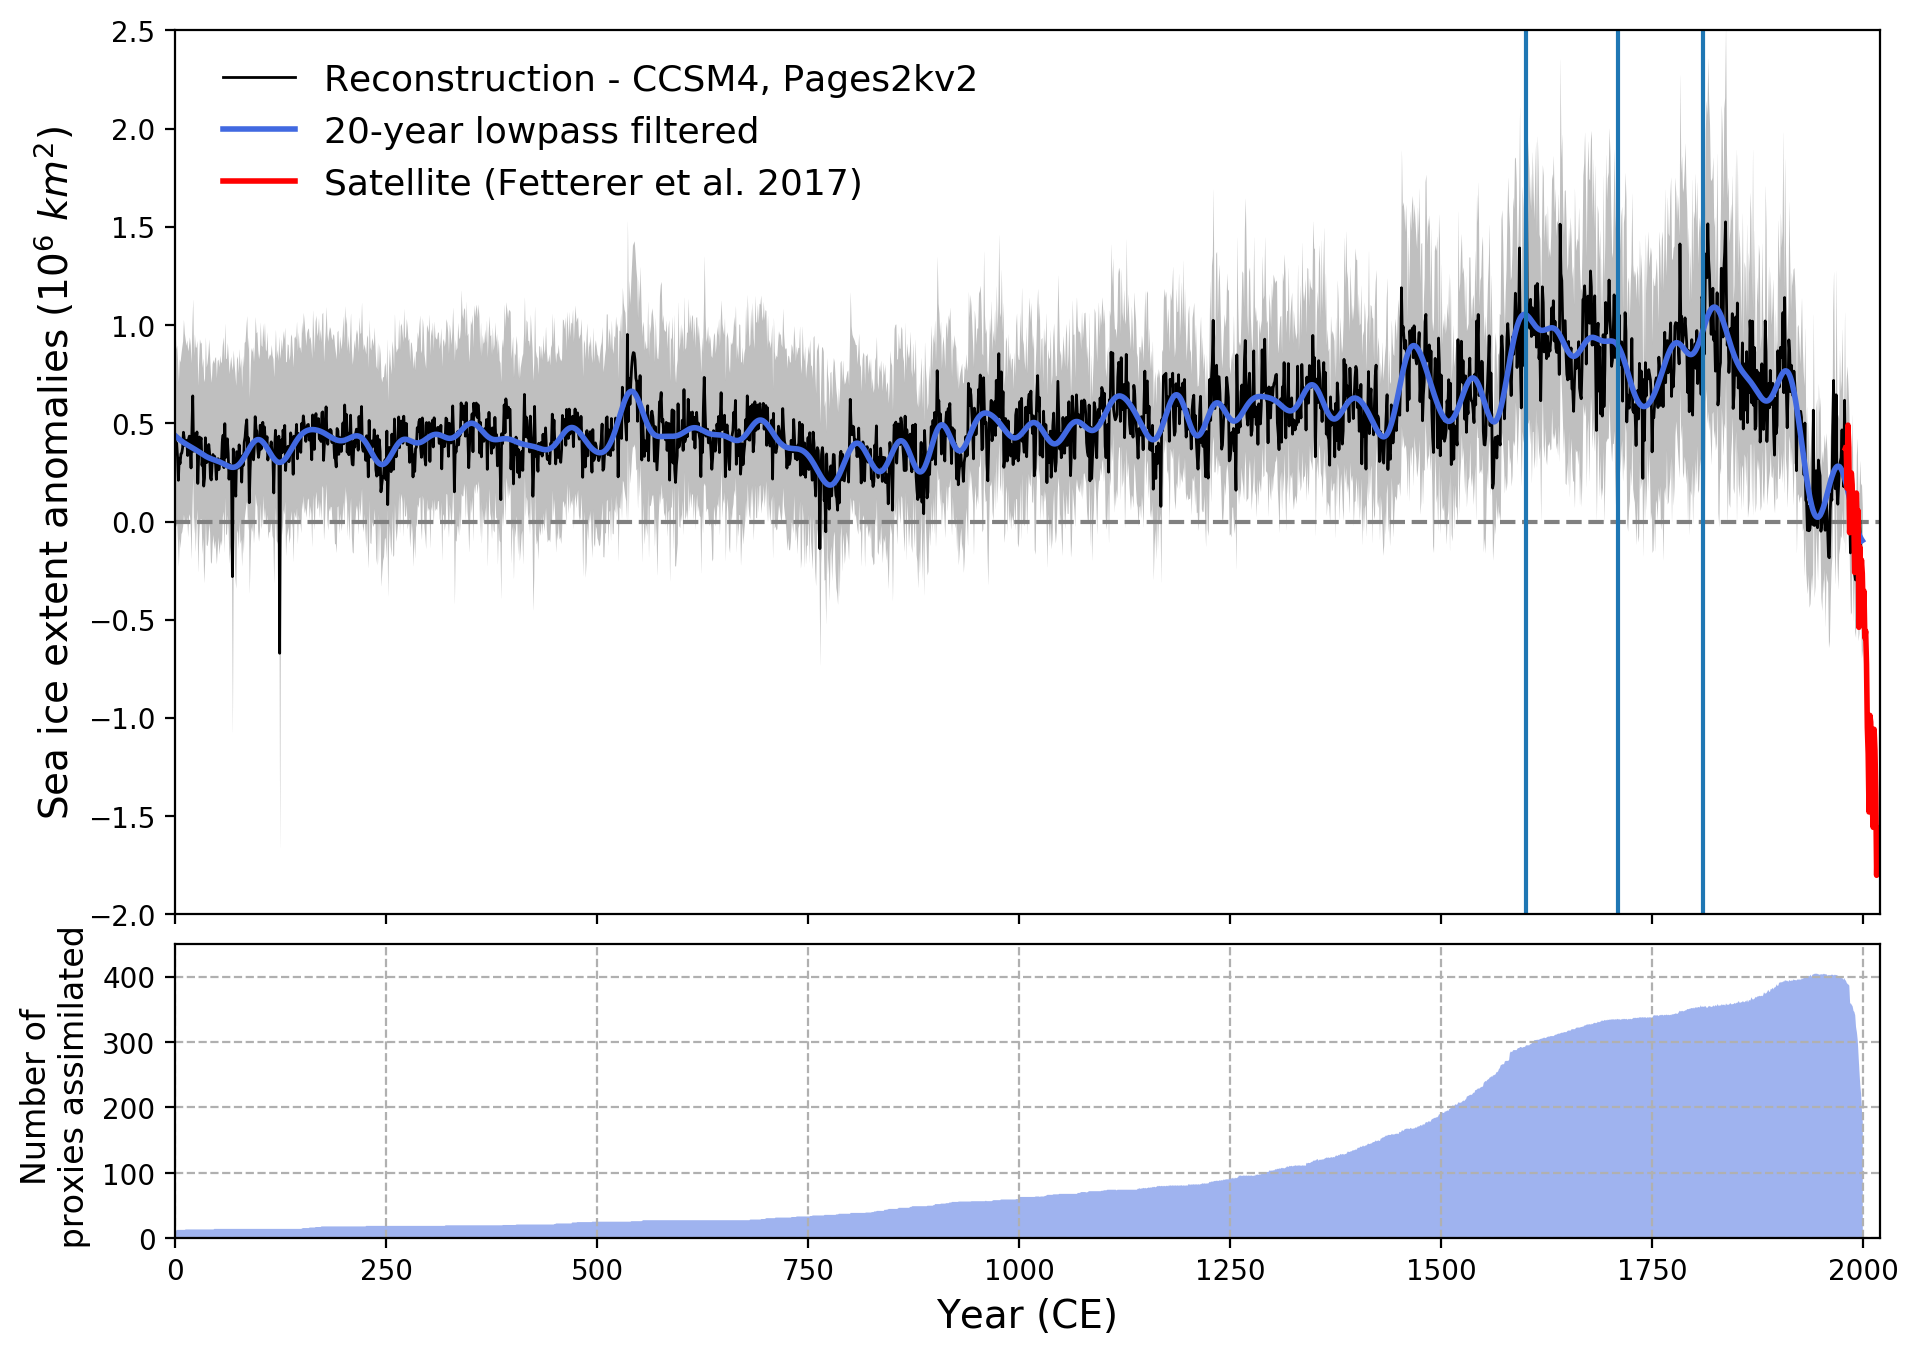

In [21]:
fig, (ax_recon,ax_prox) = plt.subplots(2, figsize=(11,8),sharex=True,
                                       gridspec_kw={"height_ratios": (.75,.25)})

ax_recon.axhline(0,linestyle='--',color='grey')

# plt.fill_between(recon_years,sie_2_5_allit_mpi,sie_97_5_allit_mpi,alpha=0.15, color='purple')
ax_recon.fill_between(recon_years_ccsm4,sie_2_5_allit_ccsm4,sie_97_5_allit_ccsm4,color='gray',lw=0.01,alpha=0.5)
# ax_recon.fill_between(bren2020_time,sie_CCSM4_HadCRUT4_2_5_anom,
#                  sie_CCSM4_HadCRUT4_97_5_anom,color='k',alpha=0.15)

# ax_recon.axvline(1450)
# ax_recon.axvline(1850)

ax_recon.plot(recon_years_ccsm4,sie_ensmn_anom_allit_ccsm4,color='k',#'#107ab0',
         label='Reconstruction - CCSM4, Pages2kv2',linewidth=1)
ax_recon.plot(recon_years_ccsm4,sie_ccsm4_filt20,color='royalblue',#'#107ab0',
         label='20-year lowpass filtered',linewidth=2)
# ax_recon.plot(bren2020_time,sie_bren2020['sie_CCSM4_HadCRUT4_anom'],
#          label='Reconstruction - CCSM4, HadCRUT4 (Brennan et al. 2020)', color='k',linewidth=1.5)
# ax_recon.plot(walsh_time,walsh_sie_anom,
#          label='Reconstruction - Walsh et al 2017', color='#836539',linewidth=2)
ax_recon.plot(fet_time,fet_sie_anom,label='Satellite (Fetterer et al. 2017)', color='r',linewidth=2)

ax_recon.set_ylabel('Sea ice extent anomalies (10$^{6}$ $km^2$)',fontsize=14)
#ax_recon.set_xlabel('Year (CE)',fontsize=14)

ax_recon.legend(fontsize=13,bbox_to_anchor=(0.49, 1),frameon=False)
#plt.ylim(7,13.1,1)


#plt.gcf().text(0.14, 0.14, ce_corr_plt_ccsm4 , fontsize=13,color='k')

ax_recon.set_xlim(0,2020)
ax_recon.set_ylim(-2,2.5)

ax_prox.fill_between(recon_years_ccsm4,0,np.nanmean(nobs_allit_ccsm4,axis=1), linewidth=0.01,
                     color='royalblue',alpha=0.5)
ax_prox.set_xlabel('Year (CE)', fontsize=14)
ax_prox.set_ylabel('Number of \n proxies assimilated', fontsize=12)
ax_prox.grid(linestyle='--')

ax_prox.set_xlim(0,2020)
ax_prox.set_ylim(0,450)
ax_recon.axvline(1600)
ax_recon.axvline(1710)
ax_recon.axvline(1810)

plt.subplots_adjust(wspace=0, hspace=0.05)

savedir = ('/home/disk/p/mkb22/Documents/si_analysis_kb/common_era_experiments/'+
           'analysis/figures/Brennan_Hakim_2020/')
savename = 'tot_sie_ccsm4_v_sat_nobs_10it_0_2017.png'
#plt.savefig(savedir+savename)

In [29]:
nobs_allit_ccsm4.max()

405.0

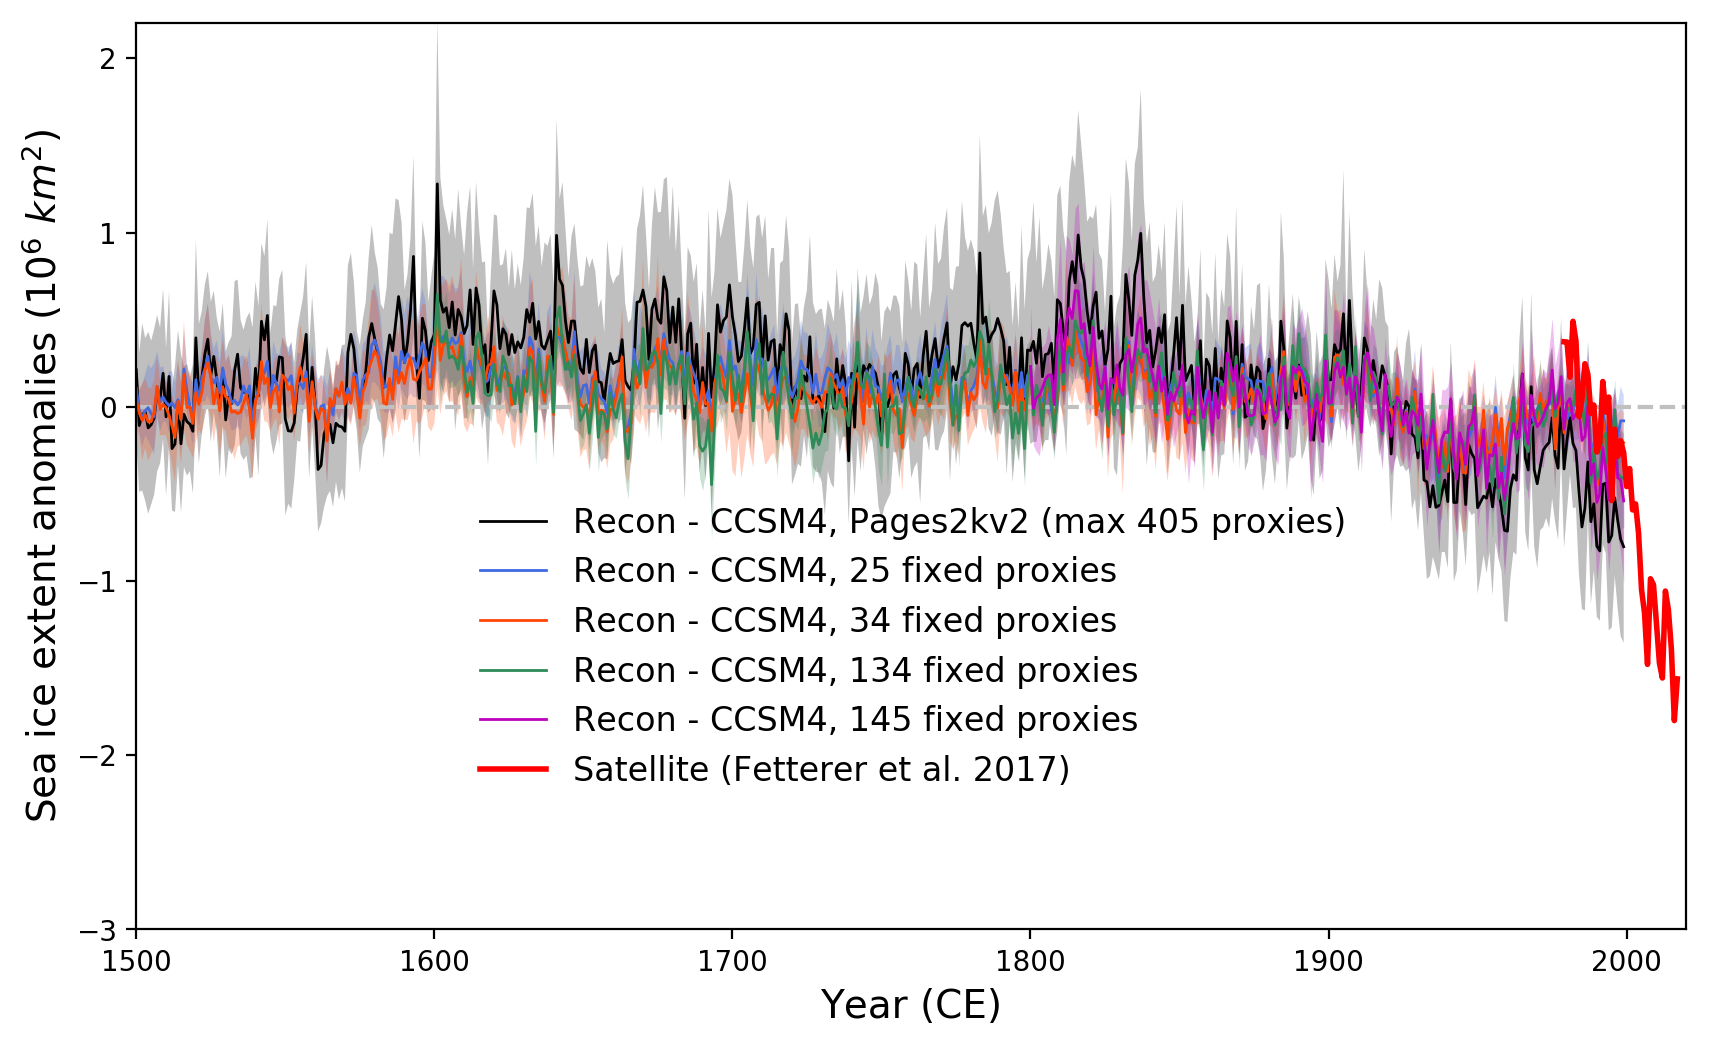

In [30]:
plt.figure(figsize=(10,6))
plt.axhline(0,linestyle='--',color='silver')

plt.fill_between(recon_years_ccsm4,sie_2_5_allit_ccsm4,sie_97_5_allit_ccsm4,
                 alpha=0.25, color='k',linewidth=0.01)
plt.fill_between(recon_years_f1000,sie_2_5_allit_f1000,sie_97_5_allit_f1000,
                 alpha=0.25, color='royalblue',linewidth=0.02)
plt.fill_between(recon_years_f800,sie_2_5_allit_f800,sie_97_5_allit_f800,
                 alpha=0.25, color='orangered',linewidth=0.02)
plt.fill_between(recon_years_f400,sie_2_5_allit_f400,sie_97_5_allit_f400,
                 alpha=0.25, color='seagreen',linewidth=0.02)
plt.fill_between(recon_years_f200,sie_2_5_allit_f200,sie_97_5_allit_f200,
                 alpha=0.25, color='m',linewidth=0.02)

plt.plot(recon_years_ccsm4,sie_ensmn_anom_allit_ccsm4,color='k',#'#8756e4',
         label=('Recon - CCSM4, Pages2kv2 (max 405 proxies)'),linewidth=1)#:    R$^2$ = '+
#                 str(np.round(corr_sie_ccsm4_sat**2,2))+', CE = '+
#                 str(np.round(ce_sie_ccsm4_sat,2))+
#                 '\n             (max 405 proxies)'),linewidth=1)
plt.plot(recon_years_f1000,sie_ensmn_anom_allit_f1000,color='royalblue',#'#8756e4',
         label=('Recon - CCSM4, 25 fixed proxies'),linewidth=1)#:  R$^2$ = '+
#                 str(np.round(corr_sie_f1000_sat**2,2))+', CE = '+
#                 str(np.round(ce_sie_f1000_sat,2))),linewidth=1)
plt.plot(recon_years_f800,sie_ensmn_anom_allit_f800,color='orangered',#'#8756e4',
         label=('Recon - CCSM4, 34 fixed proxies'),linewidth=1)#:  R$^2$ = '+
#                 str(np.round(corr_sie_f800_sat**2,2))+', CE = '+
#                 str(np.round(ce_sie_f800_sat,2))),linewidth=1)
plt.plot(recon_years_f400,sie_ensmn_anom_allit_f400,color='seagreen',#'#8756e4',
         label=('Recon - CCSM4, 134 fixed proxies'),linewidth=1) #: R$^2$ = '+
#                 str(np.round(corr_sie_f400_sat**2,2))+', CE = '+
#                 str(np.round(ce_sie_f400_sat,2))),linewidth=1)
plt.plot(recon_years_f200,sie_ensmn_anom_allit_f200,color='m',#'#8756e4',
         label=('Recon - CCSM4, 145 fixed proxies'),linewidth=1)#: R$^2$ = '+
#                 str(np.round(corr_sie_f200_sat**2,2))+', CE = '+
#                 str(np.round(ce_sie_f200_sat,2))),linewidth=1)

plt.plot(fet_time,fet_sie_anom,label='Satellite (Fetterer et al. 2017)', color='r',linewidth=2)

plt.ylabel('Sea ice extent anomalies (10$^{6}$ $km^2$)',fontsize=14)
plt.xlabel('Year (CE)',fontsize=14)
#plt.title('Total Arctic Sea Ice Extent', fontsize=14)

plt.legend(fontsize=12,bbox_to_anchor=(0.8, 0.5),frameon=False)
#plt.ylim(7,13.1,1)

plt.xlim(1500,2020)
plt.ylim(-3,2.2)

savedir = ('/home/disk/p/mkb22/Documents/si_analysis_kb/common_era_experiments/'+
           'analysis/figures/Brennan_Hakim_2020/')
savename = 'tot_sie_ccsm4_v_sat_walsh_brennan_mpi_10it_1850_2017.png'
#plt.savefig(savedir+savename)

### Inflating fixed proxy experiments: 

In [31]:
inflate = 1.8

xb_mn = np.mean(sie_ens_anom_allit_f200,axis=1)
xb_p = sie_ens_anom_allit_f200 - xb_mn[:,np.newaxis]

sie_new_f200 = np.add(inflate*xb_p,xb_mn[:,None])

In [35]:
seginf = np.ones(sie_ensmn_anom_allit_f200.shape[0])
seginf = np.where((np.array(recon_years_f200)>=1800)&(np.array(recon_years_f200)<=1927),inflate,seginf)
sie_f200_seginf = sie_ensmn_anom_allit_f200*seginf

In [36]:
anom_start,anom_end-1,recon_years_f200[0]

(1900, 1939, 1800)

In [37]:
[ce_sie_f200_recon,corr_sie_f200_recon,
 var_sie_recon,var_sie_f200] = rrutils.find_ce_corr(sie_ensmn_anom_allit_f200, 
                                                    sie_ensmn_anom_allit_ccsm4,
                                                    np.array(recon_years_ccsm4),
                                                    np.array(recon_years_f200),
                                                    recon_years_f200[0],anom_end-1)

[ce_sie_f200_recon_inf,corr_sie_f200_recon_inf,
 var_sie_recon_inf,var_sie_f200_inf] = rrutils.find_ce_corr(sie_ensmn_anom_allit_f200*inflate, 
                                                            sie_ensmn_anom_allit_ccsm4,
                                                            np.array(recon_years_ccsm4),
                                                            np.array(recon_years_f200),
                                                            recon_years_f200[0],anom_end-1)

[ce_sie_f200_recon_seginf,corr_sie_f200_recon_seginf,
 var_sie_recon_seginf,var_sie_f200_seginf] = rrutils.find_ce_corr(sie_f200_seginf, 
                                                                  sie_ensmn_anom_allit_ccsm4,
                                                                  np.array(recon_years_ccsm4),
                                                                  np.array(recon_years_f200),
                                                                  recon_years_f200[0],anom_end-1)

print('CE f200              = '+str(ce_sie_f200_recon))
print('CE f200 inflated     = '+str(ce_sie_f200_recon_inf))
print('CE f200 seg inflated = '+str(ce_sie_f200_recon_seginf))
print('R^2 f200          = '+str(corr_sie_f200_recon**2))
print('R^2 f200 inflated = '+str(corr_sie_f200_recon_inf**2))

CE f200              = 0.5275678313927357
CE f200 inflated     = 0.6160669120404476
CE f200 seg inflated = 0.5857943641995099
R^2 f200          = 0.6993509907528002
R^2 f200 inflated = 0.6993509907527996


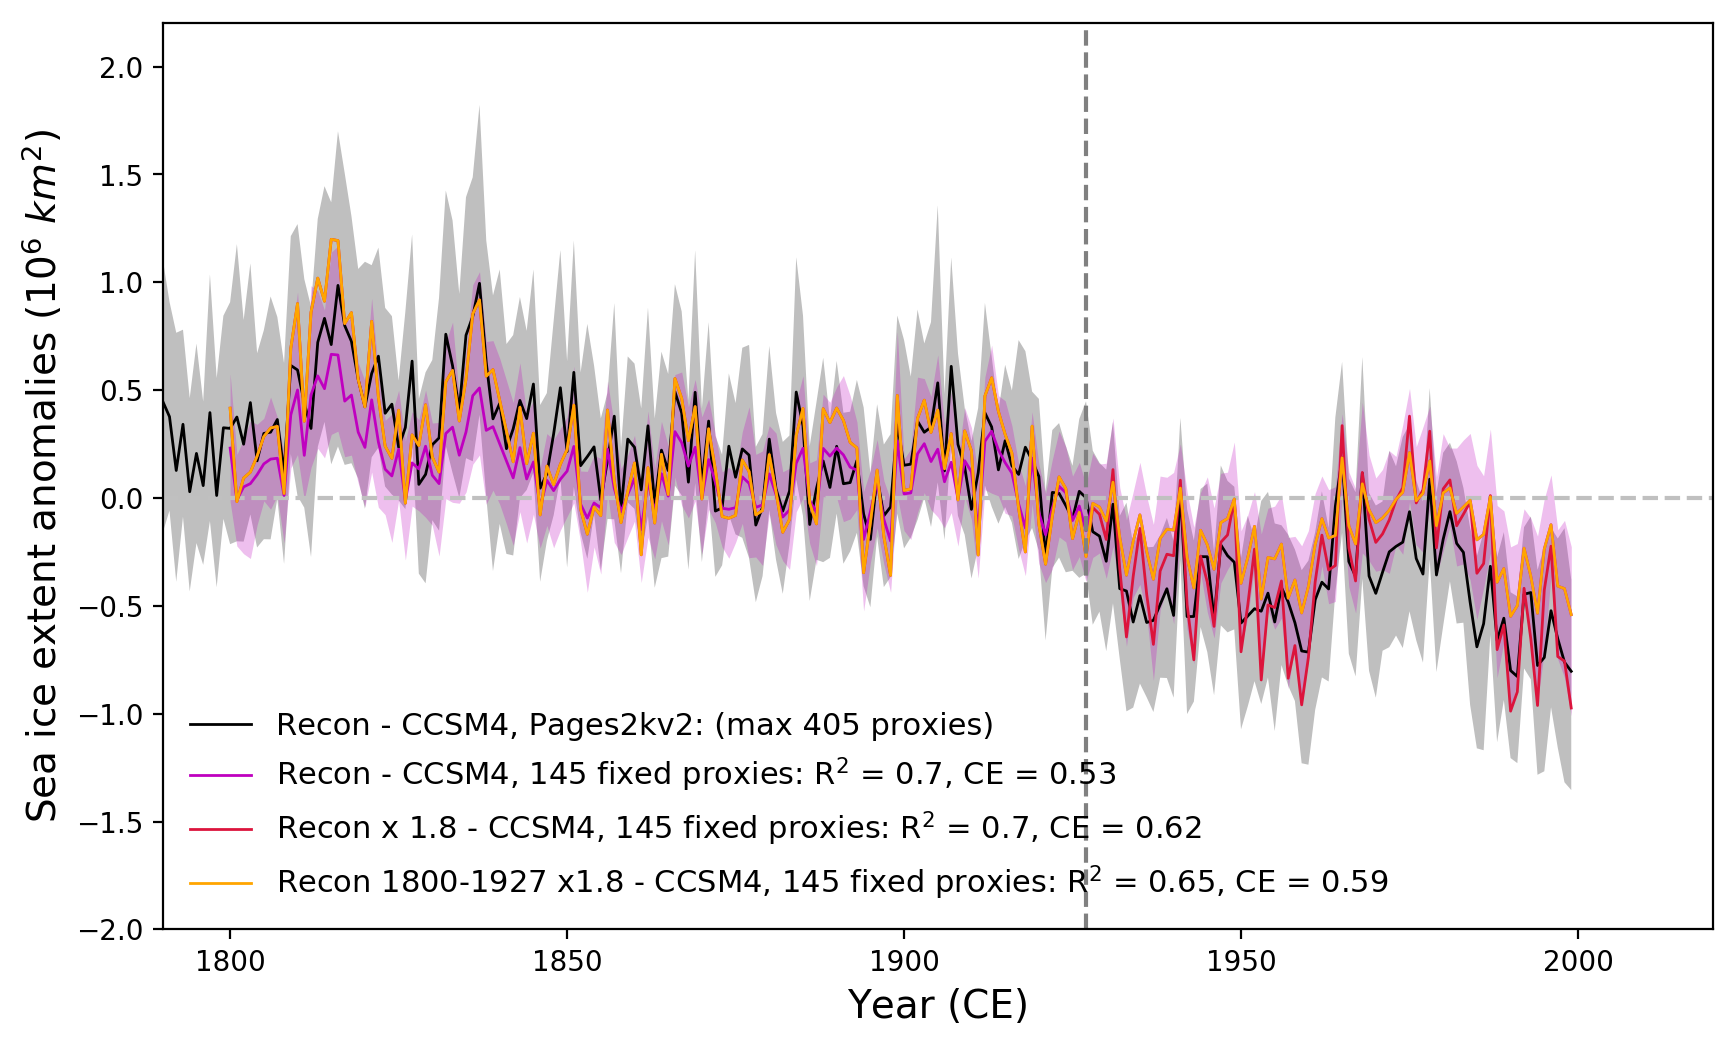

In [38]:
plt.figure(figsize=(10,6))
plt.axhline(0,linestyle='--',color='silver')

plt.fill_between(recon_years_ccsm4,sie_2_5_allit_ccsm4,sie_97_5_allit_ccsm4,
                 alpha=0.25, color='k',linewidth=0.01)
# plt.fill_between(recon_years_f1000,sie_2_5_allit_f1000,sie_97_5_allit_f1000,
#                  alpha=0.25, color='royalblue',linewidth=0.02)
# plt.fill_between(recon_years_f800,sie_2_5_allit_f800,sie_97_5_allit_f800,
#                  alpha=0.25, color='orangered',linewidth=0.02)
# plt.fill_between(recon_years_f400,sie_2_5_allit_f400,sie_97_5_allit_f400,
#                  alpha=0.25, color='seagreen',linewidth=0.02)
plt.fill_between(recon_years_f200,sie_2_5_allit_f200,sie_97_5_allit_f200,
                 alpha=0.25, color='m',linewidth=0.02)

plt.plot(recon_years_ccsm4,sie_ensmn_anom_allit_ccsm4,color='k',#'#8756e4',
         label=('Recon - CCSM4, Pages2kv2: (max 405 proxies)'),linewidth=1)
# plt.plot(recon_years_f1000,sie_ensmn_anom_allit_f1000,color='royalblue',#'#8756e4',
#          label=('Recon - CCSM4, 25 fixed proxies:  R$^2$ = '+
#                 str(np.round(corr_sie_f1000_sat**2,2))+', CE = '+
#                 str(np.round(ce_sie_f1000_sat,2))),linewidth=1)
# plt.plot(recon_years_f800,sie_ensmn_anom_allit_f800,color='orangered',#'#8756e4',
#          label=('Recon - CCSM4, 34 fixed proxies:  R$^2$ = '+
#                 str(np.round(corr_sie_f800_sat**2,2))+', CE = '+
#                 str(np.round(ce_sie_f800_sat,2))),linewidth=1)
# plt.plot(recon_years_f400,sie_ensmn_anom_allit_f400,color='seagreen',#'#8756e4',
#          label=('Recon - CCSM4, 134 fixed proxies: R$^2$ = '+
#                 str(np.round(corr_sie_f400_sat**2,2))+', CE = '+
#                 str(np.round(ce_sie_f400_sat,2))),linewidth=1)
plt.plot(recon_years_f200,sie_ensmn_anom_allit_f200,color='m',#'#8756e4',
         label=('Recon - CCSM4, 145 fixed proxies: R$^2$ = '+
                str(np.round(corr_sie_f200_recon**2,2))+', CE = '+
                str(np.round(ce_sie_f200_recon,2))),linewidth=1)
plt.plot(recon_years_f200,sie_ensmn_anom_allit_f200*inflate,color='crimson',#'#8756e4',
         label=('Recon x '+str(inflate)+' - CCSM4, 145 fixed proxies: R$^2$ = '+
                str(np.round(corr_sie_f200_recon_inf**2,2))+', CE = '+
                str(np.round(ce_sie_f200_recon_inf,2))),linewidth=1)
plt.plot(recon_years_f200,sie_f200_seginf,color='orange',#'#8756e4',
         label=('Recon 1800-1927 x'+str(inflate)+' - CCSM4, 145 fixed proxies: R$^2$ = '+
                str(np.round(corr_sie_f200_recon_seginf**2,2))+', CE = '+
                str(np.round(ce_sie_f200_recon_seginf,2))),linewidth=1)

#plt.plot(fet_time,fet_sie_anom,label='Satellite (Fetterer et al. 2017)', color='r',linewidth=2)

#plt.axvline(1911, color='grey',linestyle='--')
plt.axvline(1927, color='grey',linestyle='--')

plt.ylabel('Sea ice extent anomalies (10$^{6}$ $km^2$)',fontsize=14)
plt.xlabel('Year (CE)',fontsize=14)
#plt.title('Total Arctic Sea Ice Extent', fontsize=14)

plt.legend(fontsize=11,loc='lower left',frameon=False)
#plt.ylim(7,13.1,1)

plt.xlim(1790,2020)
plt.ylim(-2,2.2)

savedir = ('/home/disk/p/mkb22/Documents/si_analysis_kb/common_era_experiments/'+
           'analysis/figures/Brennan_Hakim_2020/')
savename = 'tot_sie_ccsm4_v_sat_walsh_brennan_mpi_10it_1850_2017.png'
#plt.savefig(savedir+savename)

### Millenial scale trend (1000-1900) visible in fixed proxy experiments?

In [32]:
seg_length = 200
start_year = 1200
end_year = 1970
trend_chunked = []
trend_f1000 = []
trend_f800 = []
trend_f780 = []

for seg in np.arange(start_year,end_year-seg_length,1):
    hold = rrutils.find_trend(sie_ensmn_anom_allit_ccsm4,np.array(recon_years_ccsm4),
                              seg,seg+seg_length)
    hold_f1000 = rrutils.find_trend(sie_ensmn_anom_allit_f1000,np.array(recon_years_f1000),
                                    seg,seg+seg_length)
    hold_f800 = rrutils.find_trend(sie_ensmn_anom_allit_f800,np.array(recon_years_f800),
                                   seg,seg+seg_length)
    hold_f780 = rrutils.find_trend(sie_ensmn_anom_allit_f780,np.array(recon_years_f780),
                                   seg,seg+seg_length)
    
    trend_chunked.append(hold)
    trend_f1000.append(hold_f1000)
    trend_f800.append(hold_f800)
    trend_f780.append(hold_f780)

In [33]:
var_chunked = []
var_f1000 = []
var_f800 = []
var_f780 = []

for seg in np.arange(start_year,end_year-seg_length,1):
    ind = np.where((np.array(recon_years_ccsm4)>=seg)&(np.array(recon_years_ccsm4)<=seg+seg_length))
    ind_f1000 = np.where((np.array(recon_years_f1000)>=seg)&(np.array(recon_years_f1000)<=seg+seg_length))
    ind_f800 = np.where((np.array(recon_years_f800)>=seg)&(np.array(recon_years_f800)<=seg+seg_length))
    ind_f780 = np.where((np.array(recon_years_f780)>=seg)&(np.array(recon_years_f780)<=seg+seg_length))
    
    hold = np.var(sie_ensmn_anom_allit_ccsm4[ind])
    hold_f1000 = np.var(sie_ensmn_anom_allit_f1000[ind_f1000])
    hold_f800 = np.var(sie_ensmn_anom_allit_f800[ind_f800])
    hold_f780 = np.var(sie_ensmn_anom_allit_f780[ind_f780])
    
    var_chunked.append(hold)
    var_f1000.append(hold_f1000)
    var_f800.append(hold_f800)
    var_f780.append(hold_f780)

Text(0.5,1,'Trends: 200 year chunks')

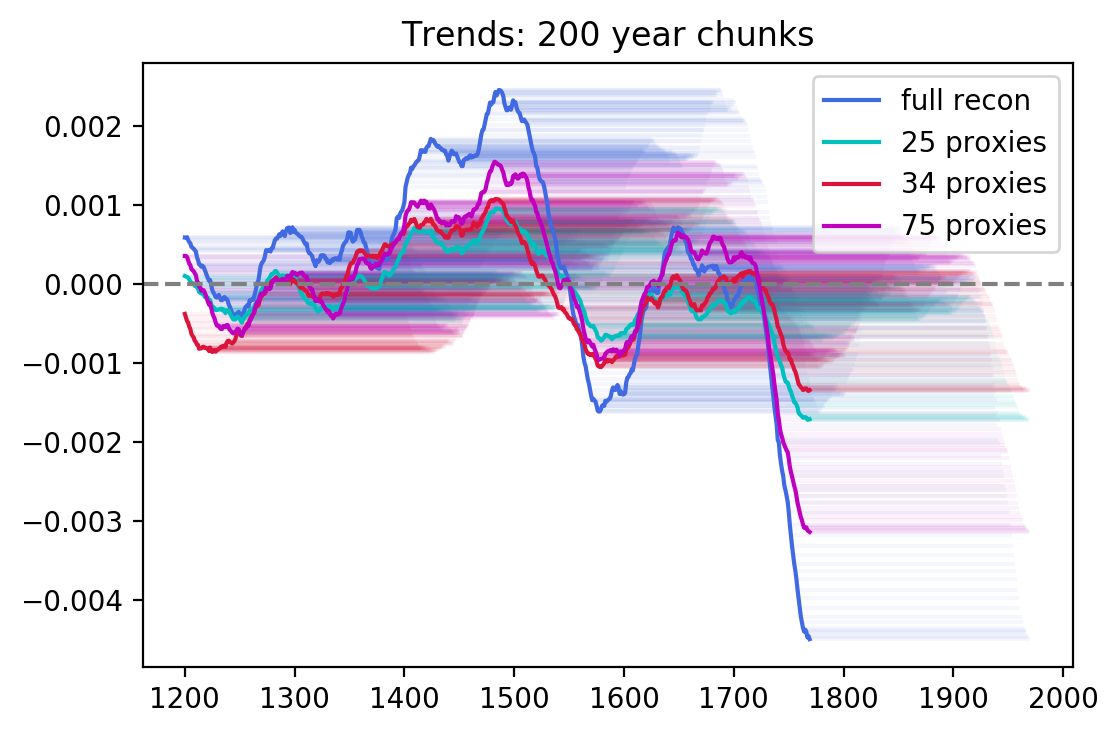

In [41]:
for i,ti in enumerate(np.arange(start_year,end_year-seg_length,1)): 
    plt.hlines(trend_chunked[i],ti,ti+seg_length+1,alpha=0.05, color='royalblue')
    plt.hlines(trend_f1000[i],ti,ti+seg_length+1,alpha=0.05, color='c')
    plt.hlines(trend_f800[i],ti,ti+seg_length+1,alpha=0.05,color='crimson')
    plt.hlines(trend_f780[i],ti,ti+seg_length+1,alpha=0.05,color='m')

plt.plot(np.arange(start_year,end_year-seg_length,1),trend_chunked, label='full recon',color='royalblue')
plt.plot(np.arange(start_year,end_year-seg_length,1),trend_f1000, label='25 proxies',color='c')
plt.plot(np.arange(start_year,end_year-seg_length,1),trend_f800, label='34 proxies',color='crimson')
plt.plot(np.arange(start_year,end_year-seg_length,1),trend_f780, label='75 proxies',color='m')
plt.axhline(0,color='grey',linestyle='--')
plt.legend()
plt.title('Trends: '+str(seg_length)+' year chunks')

Text(0.5,1,'Variability: 200 year chunks')

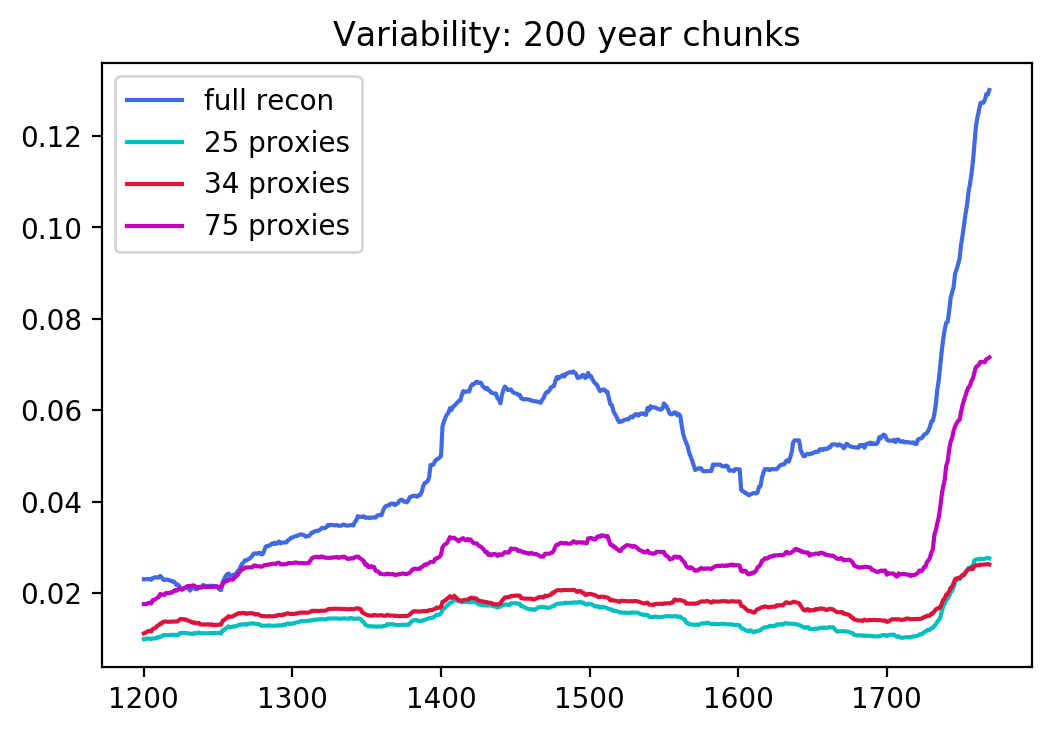

In [42]:
# for i,ti in enumerate(np.arange(start_year,end_year-seg_length,1)): 
#     plt.hlines(var_chunked[i],ti,ti+seg_length+1,alpha=0.02, color='royalblue')
#     plt.hlines(var_f1000[i],ti,ti+seg_length+1,alpha=0.02, color='c')
#     plt.hlines(var_f800[i],ti,ti+seg_length+1,alpha=0.02,color='crimson')
#     plt.hlines(var_f780[i],ti,ti+seg_length+1,alpha=0.02,color='m')

plt.plot(np.arange(start_year,end_year-seg_length,1),var_chunked, label='full recon',color='royalblue')
plt.plot(np.arange(start_year,end_year-seg_length,1),var_f1000, label='25 proxies',color='c')
plt.plot(np.arange(start_year,end_year-seg_length,1),var_f800, label='34 proxies',color='crimson')
plt.plot(np.arange(start_year,end_year-seg_length,1),var_f780, label='75 proxies',color='m')
plt.legend()
plt.title('Variability: '+str(seg_length)+' year chunks')

### Interannual variaibility changes: 

In [13]:
import scipy.signal as spy

def calc_var_runwindow(var, recon_years, seg_len, detrend=False):
    intan_var_chunked = []
    start_year = recon_years[0]
    end_year = recon_years[-1]
    
    for seg in np.arange(start_year,end_year-seg_len,1):
        ind = np.where((recon_years>=seg)&(recon_years<=seg+seg_len))
        
        if detrend is True: 
            var_dt = spy.detrend(var[ind])
        else: 
            var_dt = var[ind]

        hold = np.var(var_dt)
        intan_var_chunked.append(hold)
    
    return intan_var_chunked

In [14]:
np.arange(recon_years_ccsm4[0],recon_years_ccsm4[-1]-seg_len,1)

NameError: name 'seg_len' is not defined

In [45]:
seg_len = 40

intan_var_full = calc_var_runwindow(sie_ensmn_anom_allit_ccsm4, np.array(recon_years_ccsm4), seg_len)
intan_var_f770 = calc_var_runwindow(sie_ensmn_anom_allit_f770, np.array(recon_years_f770), seg_len)
intan_var_f780 = calc_var_runwindow(sie_ensmn_anom_allit_f780, np.array(recon_years_f780), seg_len)

intan_var_full_dt = calc_var_runwindow(sie_ensmn_anom_allit_ccsm4, np.array(recon_years_ccsm4), 
                                    seg_len, detrend=True)
intan_var_f770_dt = calc_var_runwindow(sie_ensmn_anom_allit_f770, np.array(recon_years_f770), 
                                    seg_len, detrend=True)
intan_var_f780_dt = calc_var_runwindow(sie_ensmn_anom_allit_f780, np.array(recon_years_f780), 
                                    seg_len, detrend=True)

Text(0.5,1,'40 year chunks - no detrending')

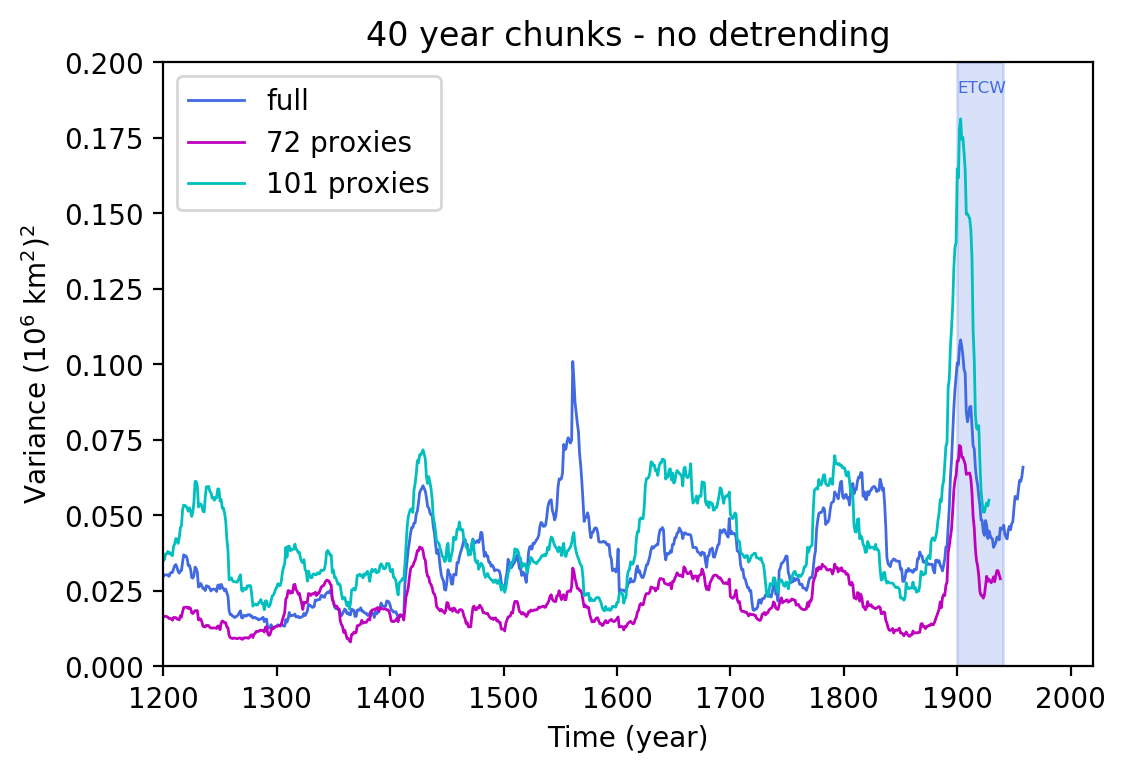

In [53]:
plt.plot(np.arange(recon_years_ccsm4[0],recon_years_ccsm4[-1]-seg_len,1),intan_var_full,
         color='royalblue', label='full', linewidth=1)
plt.plot(np.arange(recon_years_f780[0],recon_years_f780[-1]-seg_len,1),intan_var_f780,
        color='m', label='72 proxies',linewidth=1)
plt.plot(np.arange(recon_years_f770[0],recon_years_f770[-1]-seg_len,1),intan_var_f770,
        color='c', label='101 proxies',linewidth=1)

plt.axvspan(1900, 1940, alpha=0.2, color='royalblue',edgecolor=None)
plt.xlim(1200,2020)
plt.text(1900,0.19,'ETCW',color='royalblue', fontsize=6)
plt.ylim(0,0.2)

plt.legend()
plt.ylabel('Variance (10$^6$ km$^2$)$^2$')
plt.xlabel('Time (year)')
plt.title(str(seg_len)+' year chunks - no detrending')

Text(0.5,1,'40 year chunks - detrended')

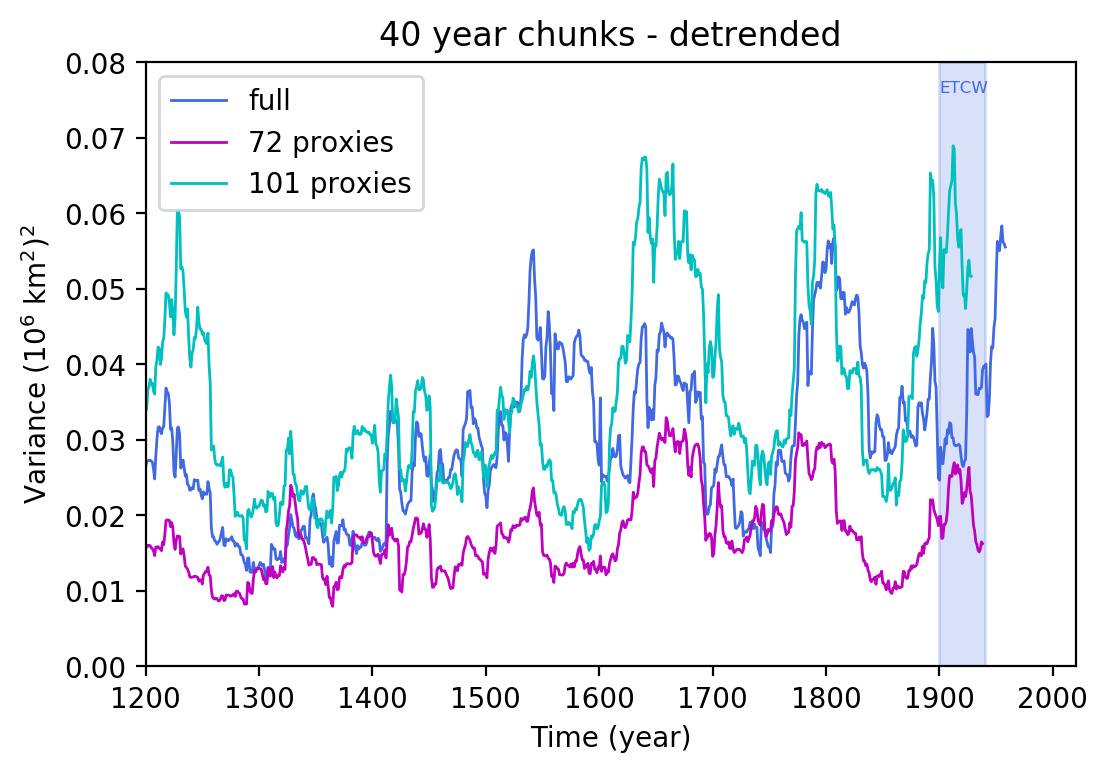

In [54]:
plt.plot(np.arange(recon_years_ccsm4[0],recon_years_ccsm4[-1]-seg_len,1),intan_var_full_dt,
         color='royalblue', label='full', linewidth=1)
plt.plot(np.arange(recon_years_f780[0],recon_years_f780[-1]-seg_len,1),intan_var_f780_dt,
        color='m', label='72 proxies',linewidth=1)
plt.plot(np.arange(recon_years_f770[0],recon_years_f770[-1]-seg_len,1),intan_var_f770_dt,
        color='c', label='101 proxies',linewidth=1)

plt.axvspan(1900, 1940, alpha=0.2, color='royalblue',edgecolor=None)
plt.xlim(1200,2020)
plt.ylim(0,0.08)
plt.text(1900,0.076,'ETCW',color='royalblue', fontsize=6)

plt.legend()
plt.ylabel('Variance (10$^6$ km$^2$)$^2$')
plt.xlabel('Time (year)')
plt.title(str(seg_len)+' year chunks - detrended')

## Wavelet Analysis: 

In [21]:
import pywt 
import matplotlib as mpl

def get_lanczos_filter_envelope(window, cutoff):
    """Calculate weights for a low pass Lanczos filter.

    Args:

    window: int
        The length of the filter window.

    cutoff: float
        The cutoff frequency in inverse time steps.

    """
    order = ((window - 1) // 2 ) + 1
    nwts = 2 * order + 1
    w = np.zeros([nwts])
    n = nwts // 2
    w[n] = 2 * cutoff
    k = np.arange(1., n)
    sigma = np.sin(np.pi * k / n) * n / (np.pi * k)
    firstfactor = np.sin(2. * np.pi * cutoff * k) / (np.pi * k)
    w[n-1:0:-1] = firstfactor * sigma
    w[n+1:-1] = firstfactor * sigma
    return w[1:-1]

def lanczos_filter_data(data, window, cutoff, time_axis=0):
    kernel = get_lanczos_filter_envelope(window, cutoff)
    
    filt_data = np.apply_along_axis(lambda m: np.convolve(kernel, m, mode='same'), 
                                    time_axis, data)
    return filt_data

def lanczos_filter_data_multiwindow(data, windows, cutoffs, time_axis=0):
    # Useful for smothing attempt with CWT Plots
    assert data.ndim == 2
    
    if time_axis != 0:
        data = data.T
        
    niters = data.shape[1]
    
    smooth_data = np.zeros_like(data)
    for i in range(niters):
        window = int(windows[i])
        cutoff = cutoffs[i]
        tseries = data[:, i]
        
        kernel = get_lanczos_filter_envelope(window, cutoff)
        smoothed = np.convolve(kernel, tseries, mode='same')
        smooth_data[:, i] = smoothed
    
    if time_axis != 0:
        smooth_data = smooth_data.T

    return smooth_data

def get_complex_morl(B, C):
    wave_name = 'cmor{:1.1f}-{:1.1f}'.format(B, C)
    wavelet = pywt.ContinuousWavelet(wave_name)
    
    return wavelet

def plot_complex_wave(wavelet):
    psi, x = wavelet.wavefun()

    plt.plot(x, psi.real,label='real')
    plt.plot(x, psi.imag, color='C0', linestyle='dashed',label='imaginary')
    plt.title('Wavelet')
    plt.legend()
    plt.show()
    
def cwt_power(data, scales, wavelet, time_smooth=None):
    
    cwt, cwt_f = pywt.cwt(data, scales, wavelet)
    cwt_P = np.abs(cwt) ** 2
    
    if time_smooth:
        windows = 2*(1/cwt_f).astype(np.int) + 1
        cwt_P_smoothed = lanczos_filter_data_multiwindow(cwt_P, 
                                                         windows, 
                                                         cwt_f, 
                                                         time_axis=1)
        cwt_P = cwt_P_smoothed
        
#     if freq_smooth:
#         windows = 2*(1/cwt_f).astype(np.int) + 1
#         cwt_P_smoothed = lanczos_filter_data_multiwindow(cwt_P, 
#                                                          windows, 
#                                                          cwt_f, 
#                                                          time_axis=1)
#         cwt_P = cwt_P_smoothed
    
    cwt_Pnorm = cwt_P / data.var(ddof=1)
    
    return cwt_f, cwt_Pnorm

def get_cwt_cone_influence(ntimes, scales, wavelet):
    
    orig_edge_dist = np.arange(ntimes //2, dtype=np.float)
    
    if ntimes % 2 != 0:
        edge_dist = np.append(orig_edge_dist, ntimes // 2)
    else:
        edge_dist = orig_edge_dist
        
    edge_dist = np.append(edge_dist, orig_edge_dist[::-1])
    edge_dist[0] = 0.1
    edge_dist[-1] = 0.1
    
    coi_scales = edge_dist / np.sqrt(2)
    coi_f = pywt.scale2frequency(wavelet, coi_scales)
    
    return coi_f

def get_red_noise_spec_power_conf_MC(data, scales, wavelet, level=95):
    """
    Uses a very long red-noise timeseries to estimate the bounds of power
    """
    rho, sigma2 = red_noise_fit(data)
    red_noise_long_int = red_noise_mc(100000, 1, rho, sigma2)
    f, cwt_Pnorm = cwt_power(red_noise_long_int, scales, wavelet)
#    f, cwt_Pnorm = cwt_power(data, scales, wavelet)
    conf_bnd = np.percentile(cwt_Pnorm, level, axis=-1)
    
    return f, cwt_Pnorm, conf_bnd

def red_noise_mc(length, nens, rho, sigma_sq):
    """
    Gives a random red noise timeseries, with auto correlation of rho 
    and error scaled by sigma_sq of length and nens number of ensemble 
    members. 
    """
    
    output = np.zeros((length, nens))
    noise_scale = np.sqrt(sigma_sq)
    
    if rho.shape:
        choice_idx_len = rho.shape[0]
        
        ens_noise_param_idx = np.random.choice(range(choice_idx_len), 
                                               size=nens, replace=True)
        ens_rho = rho[ens_noise_param_idx]
        ens_noise_scale = noise_scale[ens_noise_param_idx]    
    else:
        ens_rho = rho
        ens_noise_scale = noise_scale   
    
    init = np.random.randn(nens)
    
    for i in range(length):
        
        step = init * ens_rho + ens_noise_scale * np.random.randn(nens)
        output[i] = step
        init = step
        
    return output

def red_noise_fit(data):
    """
    Finds auto correlation and unexplained variance of data. 
    
    Returns 
    -------
    lag1_autocorr: lag 1 correlation 
    white_noise_var : unexplained variance 
    """
    
    lag1_autocorr = calc_lac(data[:-1], data[1:])
    
    white_noise_var = (1 - lag1_autocorr**2) * data.var(ddof=1, axis=0)
    
    return lag1_autocorr, white_noise_var

def calc_lac(fcast, obs):
    """
    Method to calculate the Local Anomaly Correlation (LAC).  Uses numexpr
    for speed over larger datasets.

    Note: If necessary (memory concerns) in the future, the numexpr statements
    can be extended to use pytable arrays.  Would need to provide means to
    function, as summing over the dataset is still very slow it seems.

    Parameters
    ----------
    fcast: ndarray
        Time series of forecast data. M x N where M is the temporal dimension.
    obs: ndarray
        Time series of observations. M x N

    Returns
    -------
    lac: ndarray
        Local anomaly corellations for all locations over the time range.
    """
    # Calculate means of data
    f_mean = fcast.mean(axis=0)
    o_mean = obs.mean(axis=0)
    f_anom = fcast - f_mean
    o_anom = obs - o_mean
    
    # Calculate covariance between time series at each gridpoint
    cov = (f_anom * o_anom).sum(axis=0)

    # Calculate standardization terms
    f_std = (f_anom**2).sum(axis=0)
    o_std = (o_anom**2).sum(axis=0)
#     if is_dask_array(f_std):
#         f_std = da.sqrt(f_std)
#     else:
#         f_std = np.sqrt(f_std)

#     if is_dask_array(o_std):
#         o_std = da.sqrt(o_std)
#     else:
#         o_std = np.sqrt(o_std)
    f_std = np.sqrt(f_std)
    o_std = np.sqrt(o_std)
    
    std = f_std * o_std
    lac = cov / std

    return lac


In [31]:
def plot_cwt_power(fig, ax, yrs,cwt_f,cwt_Pnorm,cmap='inferno',
                   vmin=None,vmax=None,cwt_coi=None, cwt_conf=None):
    
    cmap = plt.cm.get_cmap(cmap)

    c1 = cmap(0)
    c2 = cmap(0.25)
    c3 = cmap(0.5)
    c4 = cmap(0.75)
    c5 = cmap(0.9)
    
    levels = [0,0.01,0.1,1,10,100]
    pmesh = plt.contourf(yrs,cwt_f,(cwt_Pnorm), len(levels))  #*** or use 'contour'
    im = plt.contourf(pmesh, levels=levels, colors=[c1,c2,c3,c4,c5])
    
#     pmesh = ax.pcolormesh(yrs,cwt_f,np.log2(cwt_Pnorm), cmap=cmap,
#                           rasterized=True, vmin = vmin , vmax = vmax)

    if not cwt_coi is None: 
        ax.fill_between(yrs, cwt_coi, y2=0, color='black', alpha=0.5, zorder=3)

    if not cwt_conf is None: 
        if np.any(cwt_conf > 1):
                ax.contour(yrs, cwt_f, cwt_conf, levels=[1], colors='white', zorder=2)

    ticks = 1/np.array([2,3,5,7,10, 20, 50, 100, 200, 500, 1000])
    tick_labels = ['2','3','5','7','10', '20', '50', '100', '200', '500', '1000'][::-1]
    ticks = ticks[::-1]

    ax.set_yscale('log')
    ax.set_yticks(ticks)
    ax.set_yticklabels(tick_labels)
    ax.get_yaxis().set_minor_locator(mpl.ticker.NullLocator())

    ax.set_ylim(cwt_f.min(), cwt_f.max())
    ax.set_title('Sea ice extent', fontsize=18)
    ax.set_ylabel('Period', fontsize=14)
    ax.set_xlabel('Year', fontsize=14)
    #ax.set_xlim(1600,2000)

    ax.tick_params(axis = 'both', which = 'major', labelsize = 13)

    cbar = plt.colorbar(im, ax=ax)
#     cbar.set_label('Power', fontsize=14, rotation=270, labelpad=10)
#     cbar_labels = cbar.ax.get_yticklabels()
#     new_cbar_labels = ['$2^{{ {} }}$'.format(label.get_text()) 
#                        for label in cbar_labels]
#     cbar.ax.set_yticklabels(new_cbar_labels)

In [32]:
def get_red_noise_spec_power_conf_MC_kb(data, nens, nyrs, scales, wavelet, level=95):
    rho, sigma2 = red_noise_fit(data)
    red_noise_long_int = red_noise_mc(nyrs, nens, rho, sigma2)
    f_conf = np.zeros((nens,len(scales)))
    cwt_Pnorm_conf = np.zeros((nens,len(scales),nyrs))

    for i in range(nens): 
        f_conf[i,:], cwt_Pnorm_conf[i,:,:] = cwt_power(red_noise_long_int[:,i], scales, wavelet)

    mid = int(np.floor(nyrs/2))
    conf_bnd = np.percentile(cwt_Pnorm_conf[:,:,mid], level, axis=0)
    
    return conf_bnd, f_conf, cwt_Pnorm_conf

In [24]:
[conf_bnd_a, f_conf_a, 
 cwt_Pnorm_conf_a] = get_red_noise_spec_power_conf_MC_kb(data, 100000, 10, scales, wavelet, level=95)

NameError: name 'data' is not defined

In [25]:
[conf_bnd_b, f_conf_b, 
 cwt_Pnorm_conf_b] = get_red_noise_spec_power_conf_MC_kb(data, 100000, 400, scales, wavelet, level=95)

NameError: name 'data' is not defined

In [581]:
[conf_bnd_c, f_conf_c, 
 cwt_Pnorm_conf_c] = get_red_noise_spec_power_conf_MC_kb(data, 100000, 2, scales, wavelet, level=95)

In [583]:
[conf_bnd_d, f_conf_d, 
 cwt_Pnorm_conf_d] = get_red_noise_spec_power_conf_MC_kb(data, 100000, 600, scales, wavelet, level=95)

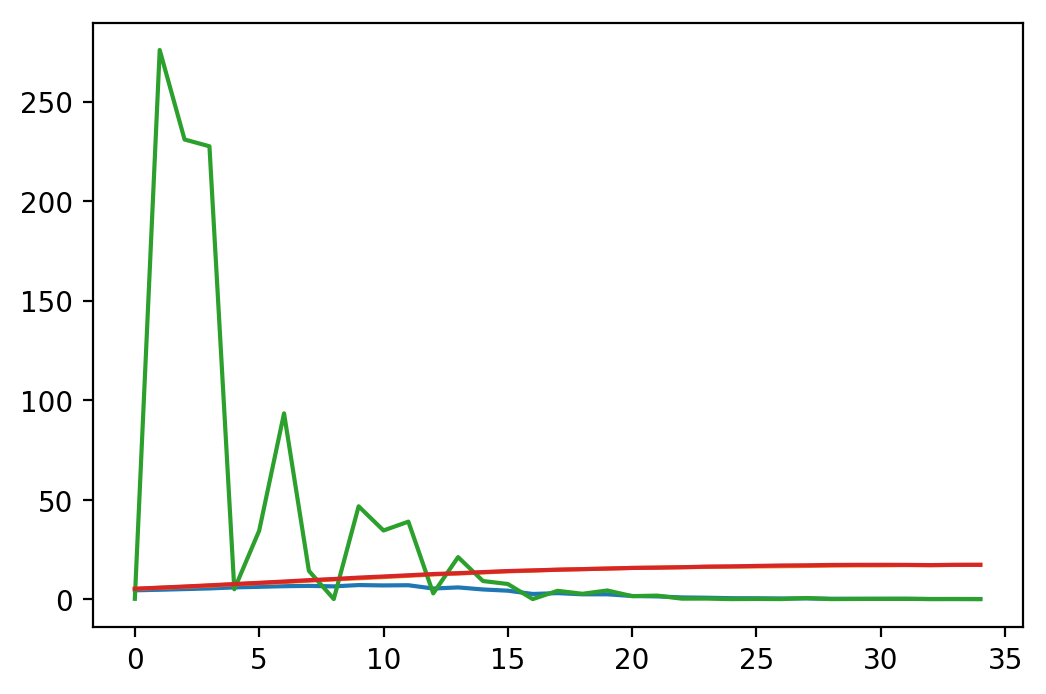

In [584]:
plt.plot(conf_bnd_a)
plt.plot(conf_bnd_b)
plt.plot(conf_bnd_c)
plt.plot(conf_bnd_d)

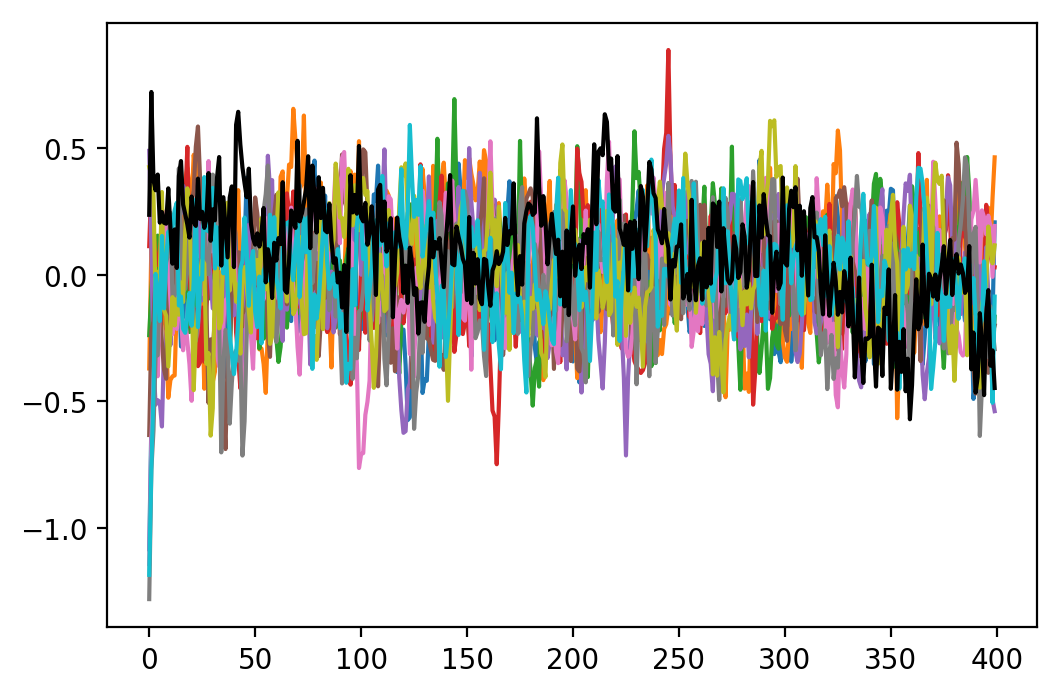

In [533]:
plt.plot(red_noise_long_int[:,0:10])
plt.plot(data, color='k')

In [531]:
cwt_Pnorm[1000,:,:]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

NameError: name 'f' is not defined

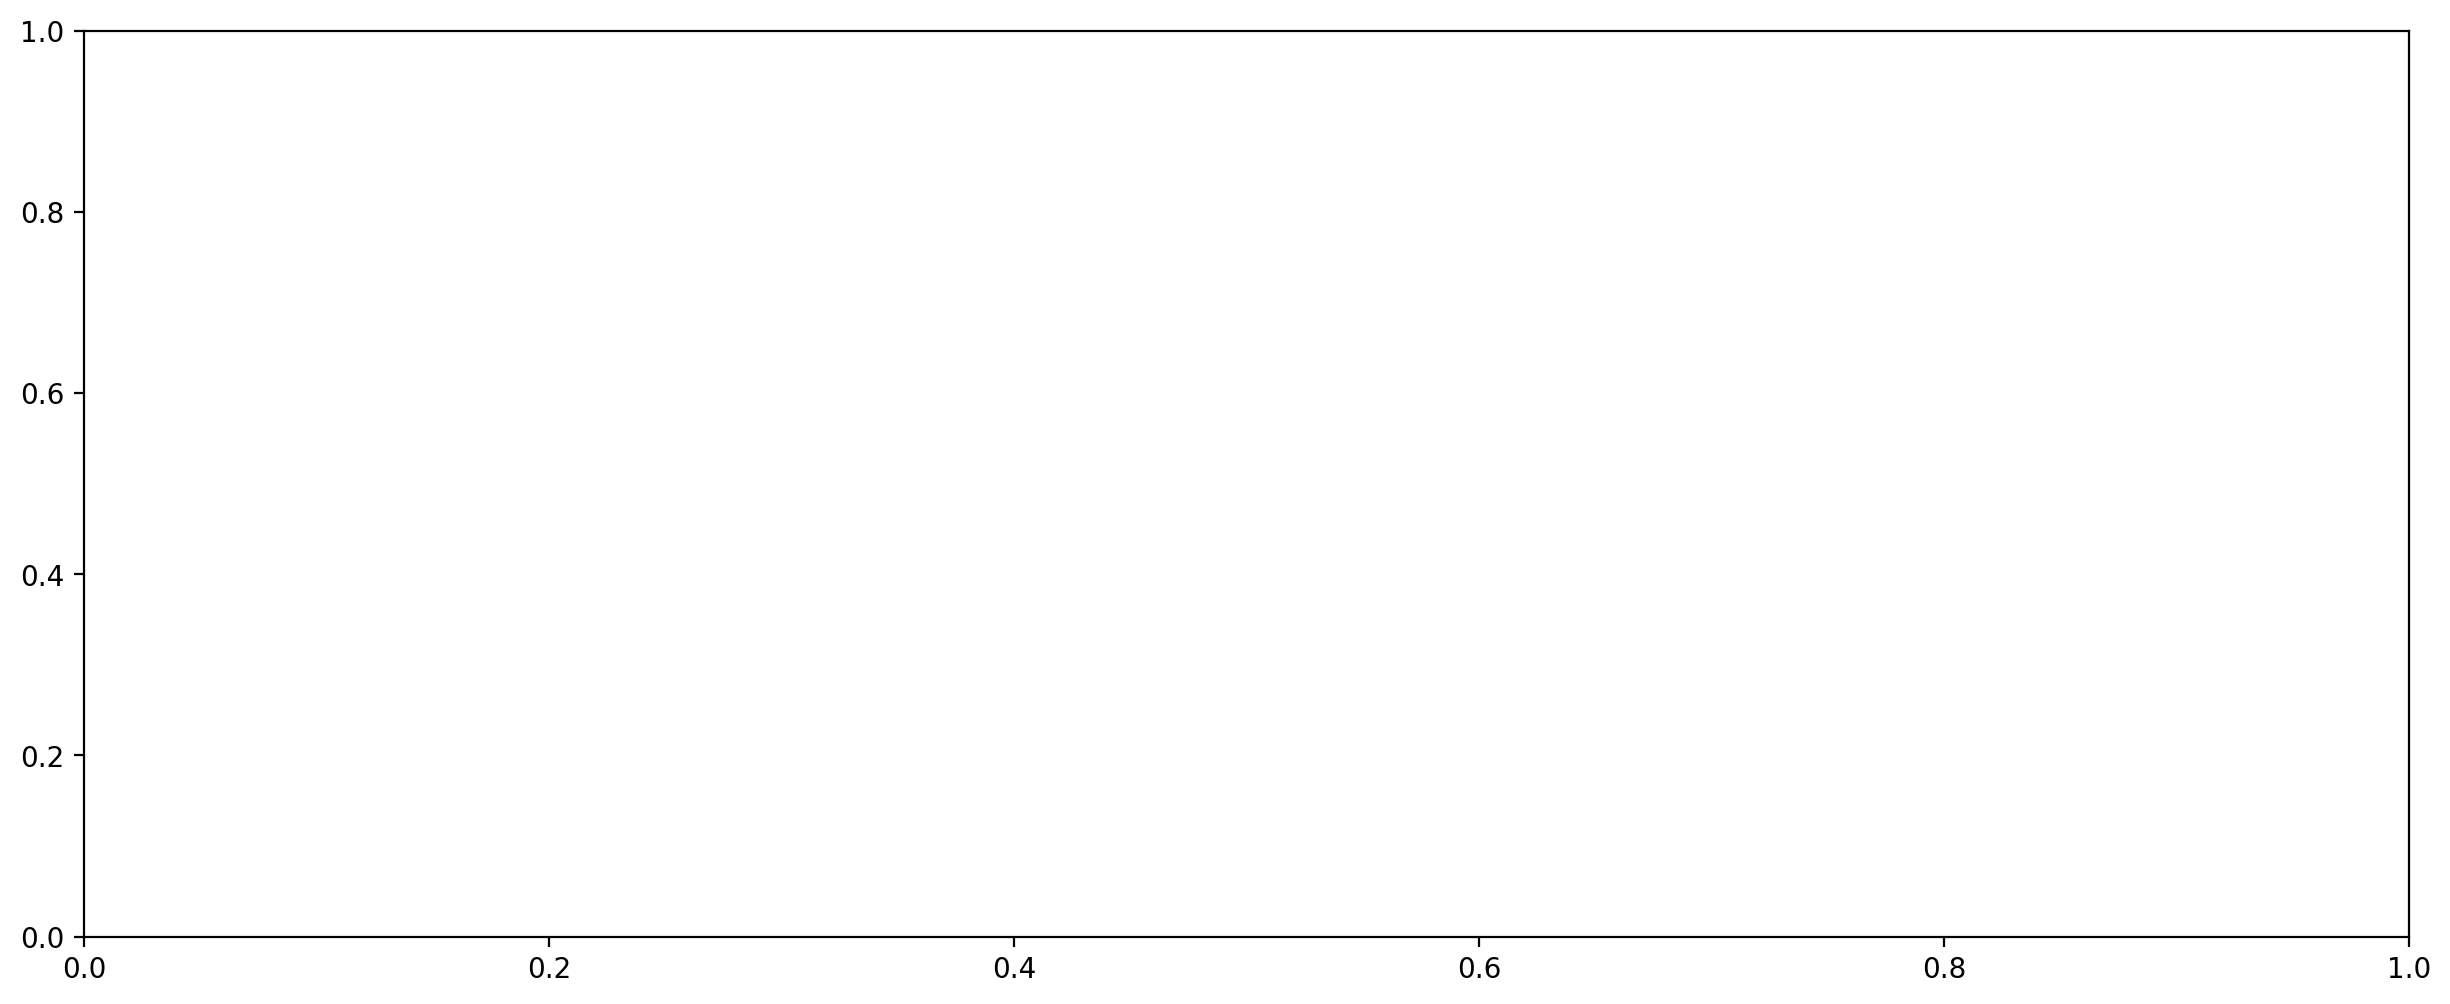

In [27]:
fig, ax = plt.subplots(figsize=(15,6))

plot_cwt_power(fig, ax, yrs,f[1000,:],cwt_Pnorm[1000,:,:],cmap='inferno',
               vmin=-6,vmax=None)

In [41]:
calc_lac(data[0:-1], data[1:])

0.5909689898794328

In [441]:
wave_name = 'cmor{:1.1f}-{:1.1f}'.format(band_width,wave_freq)
wavelet = pywt.ContinuousWavelet(wave_name)
wave_name

'cmor1.5-0.5'

In [118]:
yr_start = 1200
yr_end = 2000

ind = (np.array(recon_years_ccsm4)>=yr_start)&(np.array(recon_years_ccsm4)<=yr_end)

# data = sie_ensmn_anom_allit_f770
# yrs = np.array(recon_years_f770)
data = sie_ensmn_anom_allit_f400
yrs = np.array(recon_years_f400)
# data = sie_ensmn_anom_allit_ccsm4[ind]
# yrs = np.array(recon_years_ccsm4)[ind]

ntimes = yrs.shape[0]
del_t = 1.0
del_j = 0.125
max_period = ntimes/2
band_width=1.5
wave_freq= 0.5

#wavelet = get_complex_morl(band_width,wave_freq)
#wavelet = pywt.ContinuousWavelet('morl',fbsp_order=2)
wavelet = pywt.ContinuousWavelet('gaus2')#,fbsp_order=6)
#wavelet = pywt.ContinuousWavelet('cmor1.5-0.5')

s0 = del_t*2
J = 1/del_j * np.log2(ntimes * del_t / s0)
scales = s0 * 2 ** (del_j * np.arange(0, np.ceil(J)))

# remove scales > 500 years
freqs = pywt.scale2frequency(wavelet, scales)
scales = scales[freqs >= 1/max_period]

cwt_f, cwt_Pnorm = cwt_power(data, scales, wavelet, time_smooth=None)

f_conf, cwt_Pnorm_conf, cwt_conf = get_red_noise_spec_power_conf_MC(data, scales, wavelet, level=95)
#cwt_conf = cwt_Pnorm / cwt_conf[:, None,0]
cwt_conf = cwt_Pnorm / cwt_conf[:, None,0]

cwt_coi = get_cwt_cone_influence(ntimes, scales, wavelet) 
#coi_grid, fgrid = np.meshgrid(cwt_coi, cwt_f)

In [119]:
cwt_Pnorm.shape, cwt_conf1[:,None,0].shape

((40, 400), (51, 1))

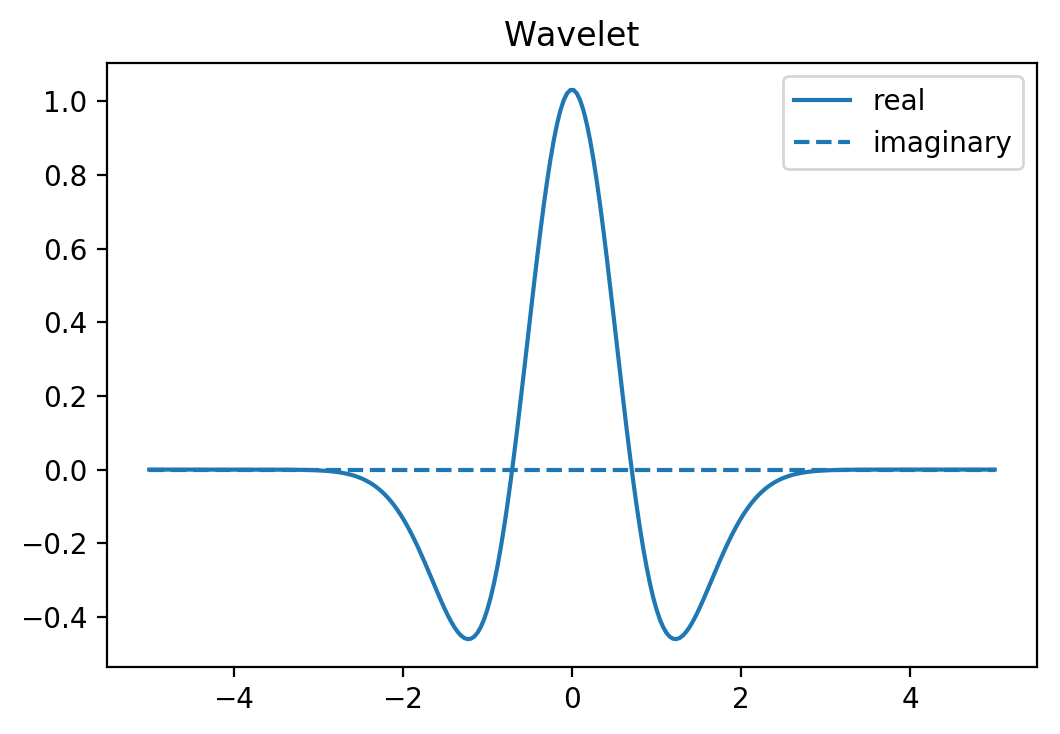

In [120]:
plot_complex_wave(wavelet)

In [116]:
cwt_Pnorm.max()

72.87148557178432

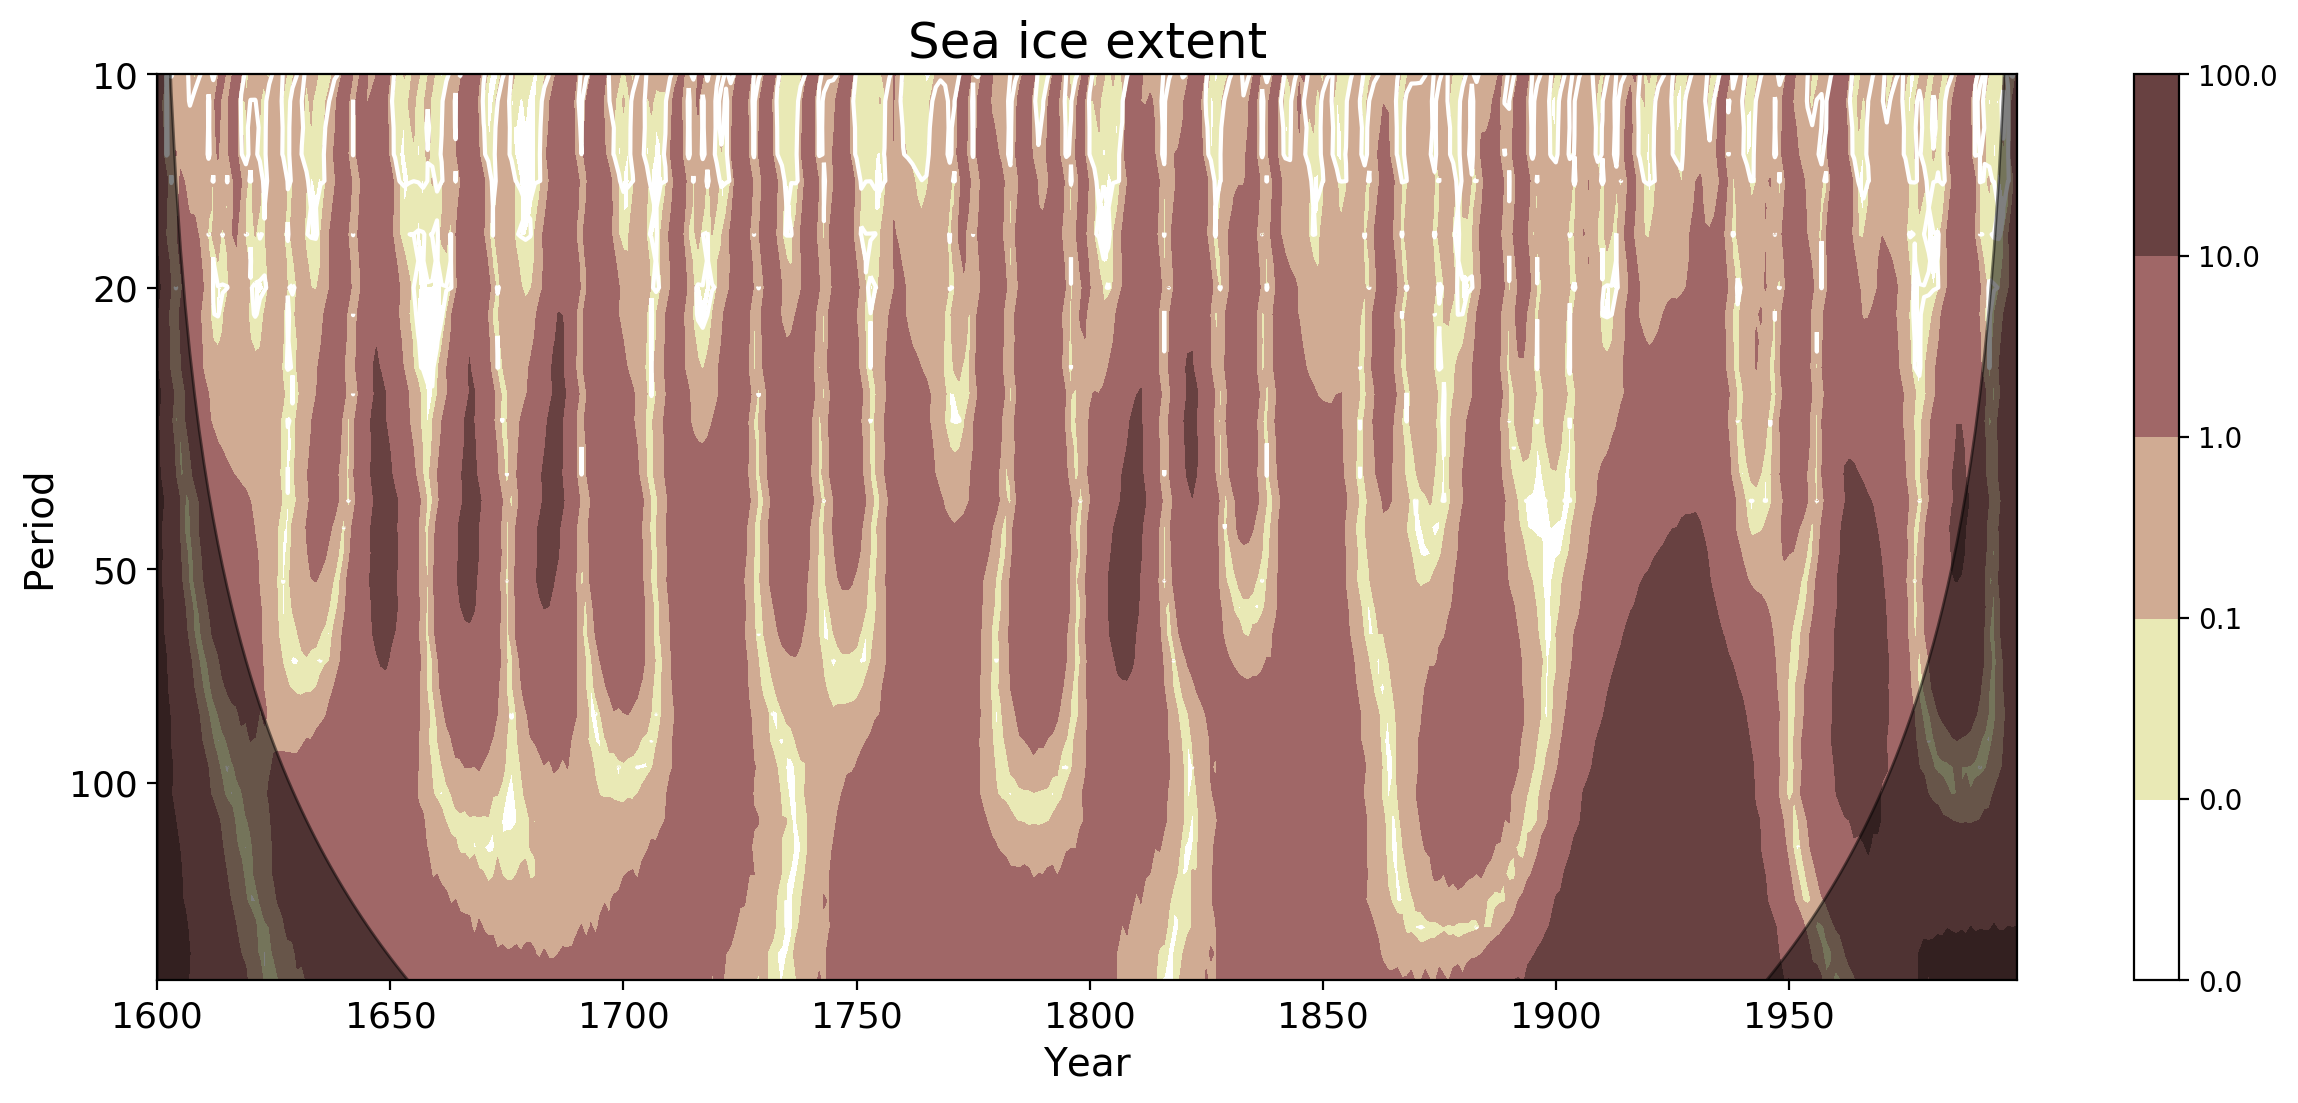

In [117]:
fig, ax = plt.subplots(figsize=(15,6))

plot_cwt_power(fig, ax, yrs,cwt_f,cwt_Pnorm,cmap='pink_r',
               vmin=0,vmax=None,cwt_coi=cwt_coi, cwt_conf=cwt_conf)

# ax.axvline(1900, color='gray', linestyle='--')
# ax.axvline(1945, color='gray', linestyle='--')

#ax.axvline(1970)

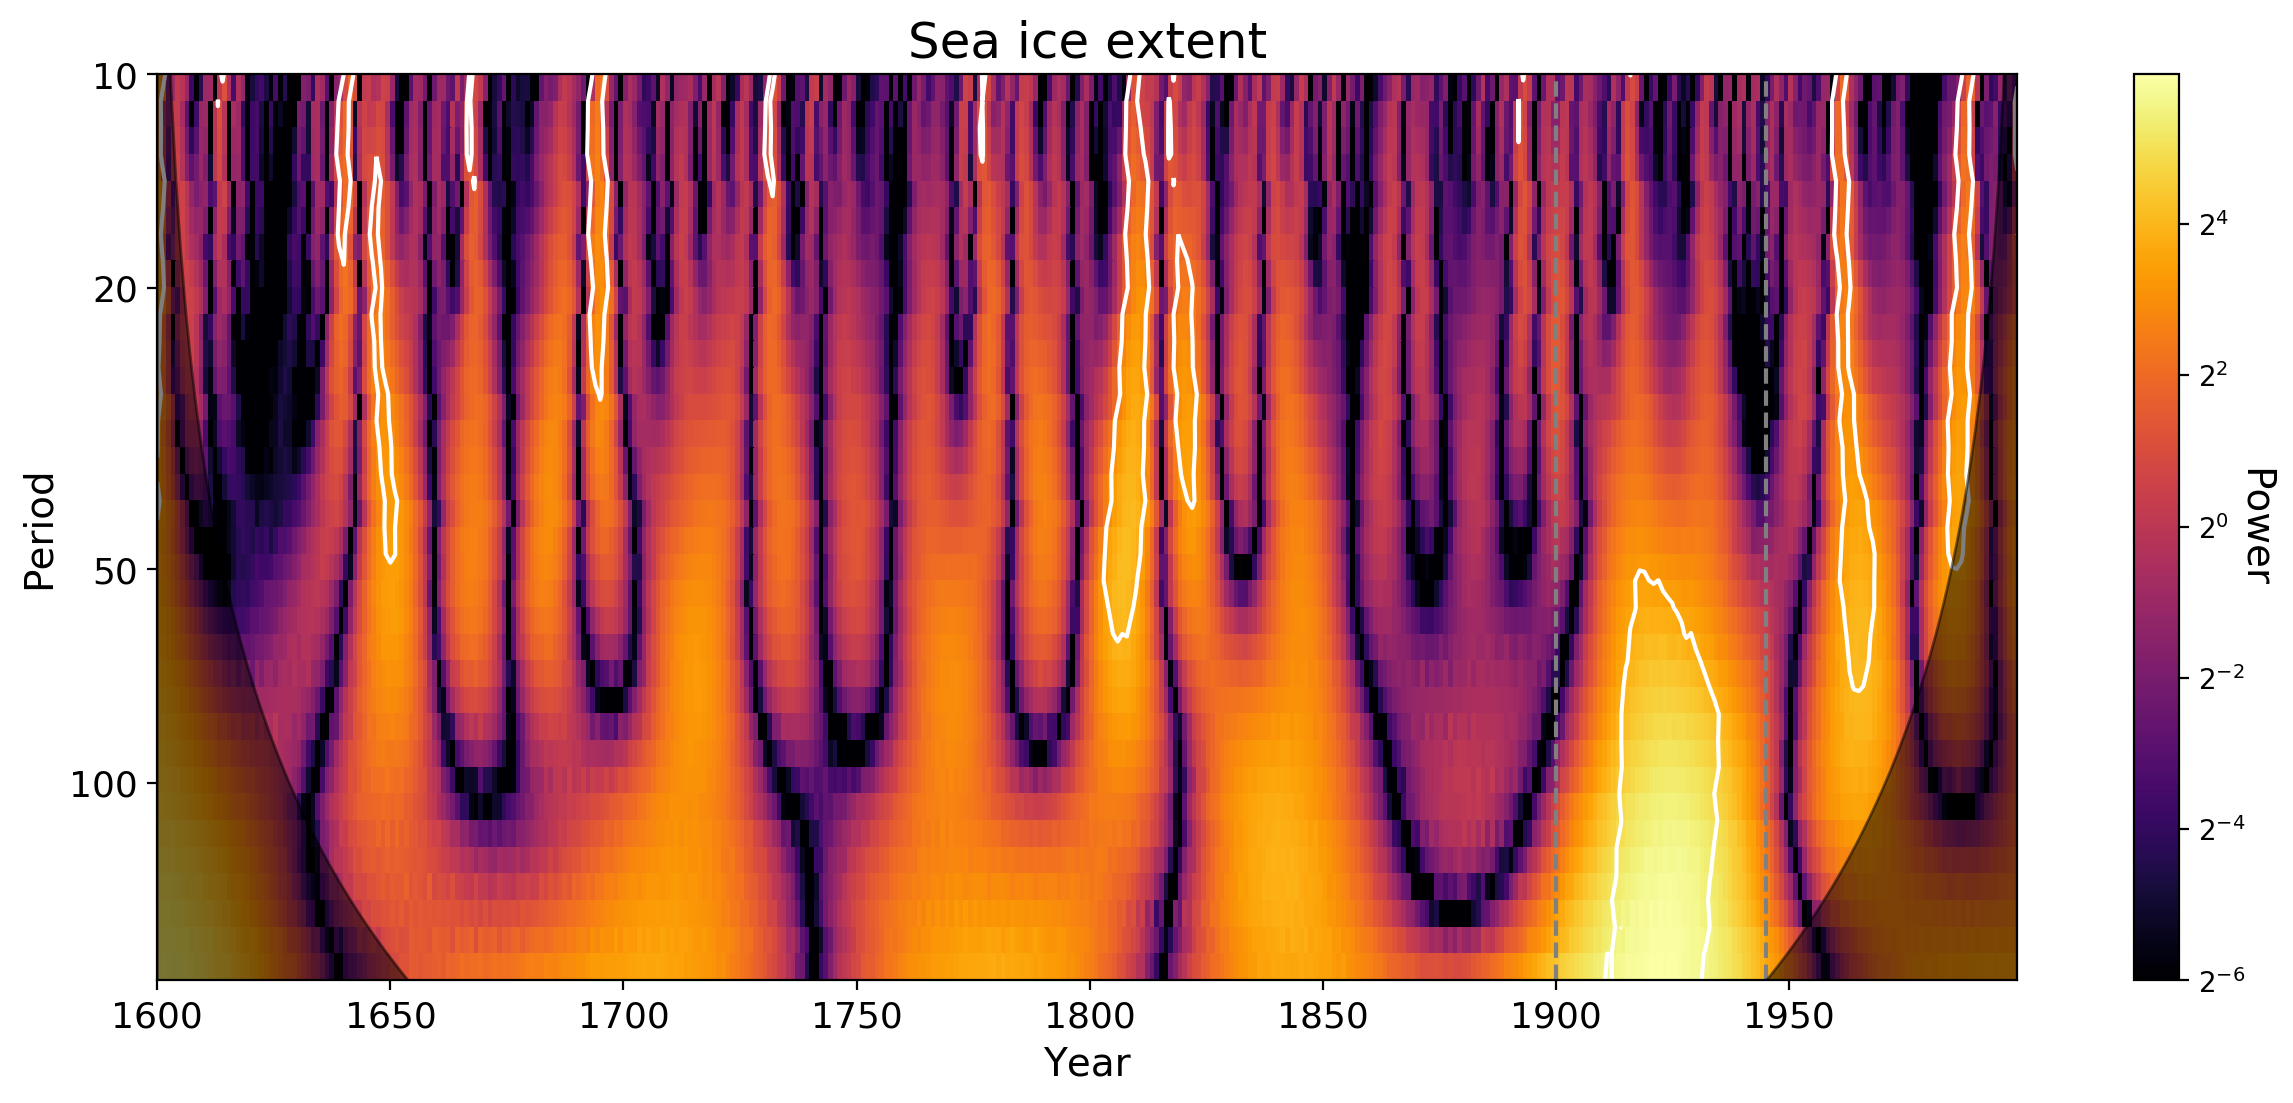

In [457]:
fig, ax = plt.subplots(figsize=(15,6))

pmesh = ax.pcolormesh(yrs,cwt_f,np.log2(cwt_Pnorm), cmap='inferno',
                      rasterized=True, vmin = -6 , vmax = None)

ax.fill_between(yrs, cwt_coi, y2=0, color='black', alpha=0.5, zorder=3)

if np.any(cwt_conf > 1):
        ax.contour(yrs, cwt_f, cwt_conf, levels=[1], colors='white', zorder=2)

ticks = 1/np.array([2,3,5,7,10, 20, 50, 100, 200, 500, 1000])
tick_labels = ['2','3','5','7','10', '20', '50', '100', '200', '500', '1000'][::-1]
ticks = ticks[::-1]

ax.set_yscale('log')
ax.set_yticks(ticks)
ax.set_yticklabels(tick_labels)
ax.get_yaxis().set_minor_locator(mpl.ticker.NullLocator())

ax.set_ylim(cwt_f.min(), cwt_f.max())
ax.set_title('Sea ice extent', fontsize=18)
ax.set_ylabel('Period', fontsize=14)
ax.set_xlabel('Year', fontsize=14)
#ax.set_xlim(1600,2000)

ax.tick_params(axis = 'both', which = 'major', labelsize = 13)

cbar = plt.colorbar(pmesh, ax=ax)
cbar.set_label('Power', fontsize=14, rotation=270, labelpad=10)
cbar_labels = cbar.ax.get_yticklabels()
new_cbar_labels = ['$2^{{ {} }}$'.format(label.get_text()) 
                   for label in cbar_labels]
cbar.ax.set_yticklabels(new_cbar_labels)

ax.axvline(1900, color='gray', linestyle='--')
ax.axvline(1945, color='gray', linestyle='--')

#ax.axvline(1970)

array([[101.],
       [101.],
       [101.],
       [101.],
       [101.],
       [101.],
       [101.],
       [101.],
       [101.],
       [101.],
       [101.],
       [101.],
       [101.],
       [101.],
       [101.],
       [101.],
       [101.],
       [101.],
       [101.],
       [101.],
       [101.],
       [101.],
       [101.],
       [101.],
       [101.],
       [101.],
       [101.],
       [101.],
       [101.],
       [101.],
       [101.],
       [101.],
       [101.],
       [101.],
       [101.],
       [101.],
       [101.],
       [101.],
       [101.],
       [101.],
       [101.],
       [101.],
       [101.],
       [101.],
       [101.],
       [101.],
       [101.],
       [101.],
       [101.],
       [101.],
       [101.],
       [101.],
       [101.],
       [101.],
       [101.],
       [101.],
       [101.],
       [101.],
       [101.],
       [101.],
       [101.],
       [101.],
       [101.],
       [101.],
       [101.],
       [101.],
       [10

In [385]:
if ax is None:
        fig, ax = plt.subplots()
        fig.set_size_inches(8, 5)
    
ax.set_facecolor('k')
color_norm = mpl.colors.LogNorm(vmin=1e-2)
pmesh = ax.pcolormesh(yrs, cwt_f, np.log2(cwt_Pnorm), cmap=cmap, 
                       vmin=vmin, vmax=vmax, zorder=1, rasterized=True)

if np.any(cwt_conf > 1):
    ax.contour(yrs, cwt_f, cwt_conf, levels=[1], colors='white', zorder=2)

ax.fill_between(yrs, cwt_coi, y2=0, color='black', alpha=0.5, zorder=3)

ticks = 1/np.array([2,3,5,7,10, 20, 50, 100, 200, 500, 1000])
tick_labels = ['2','3','5','7','10', '20', '50', '100', '200', '500', '1000'][::-1]
ticks = ticks[::-1]

ax.set_yscale('log')
ax.set_yticks(ticks)
ax.set_yticklabels(tick_labels)
ax.get_yaxis().set_minor_locator(mpl.ticker.NullLocator())

ax.set_ylim(cwt_f.min(), cwt_f.max())
ax.set_title(title, fontsize=18)
ax.set_ylabel('Period', fontsize=14)
ax.set_xlabel('Year', fontsize=14)

ax.tick_params(axis = 'both', which = 'major', labelsize = 13)

cbar = plt.colorbar(pmesh, ax=ax)
cbar.set_label('Power', fontsize=14, rotation=270, labelpad=10)
cbar_labels = cbar.ax.get_yticklabels()
new_cbar_labels = ['$2^{{ {} }}$'.format(label.get_text()) 
                   for label in cbar_labels]
cbar.ax.set_yticklabels(new_cbar_labels)

NameError: name 'cmap' is not defined

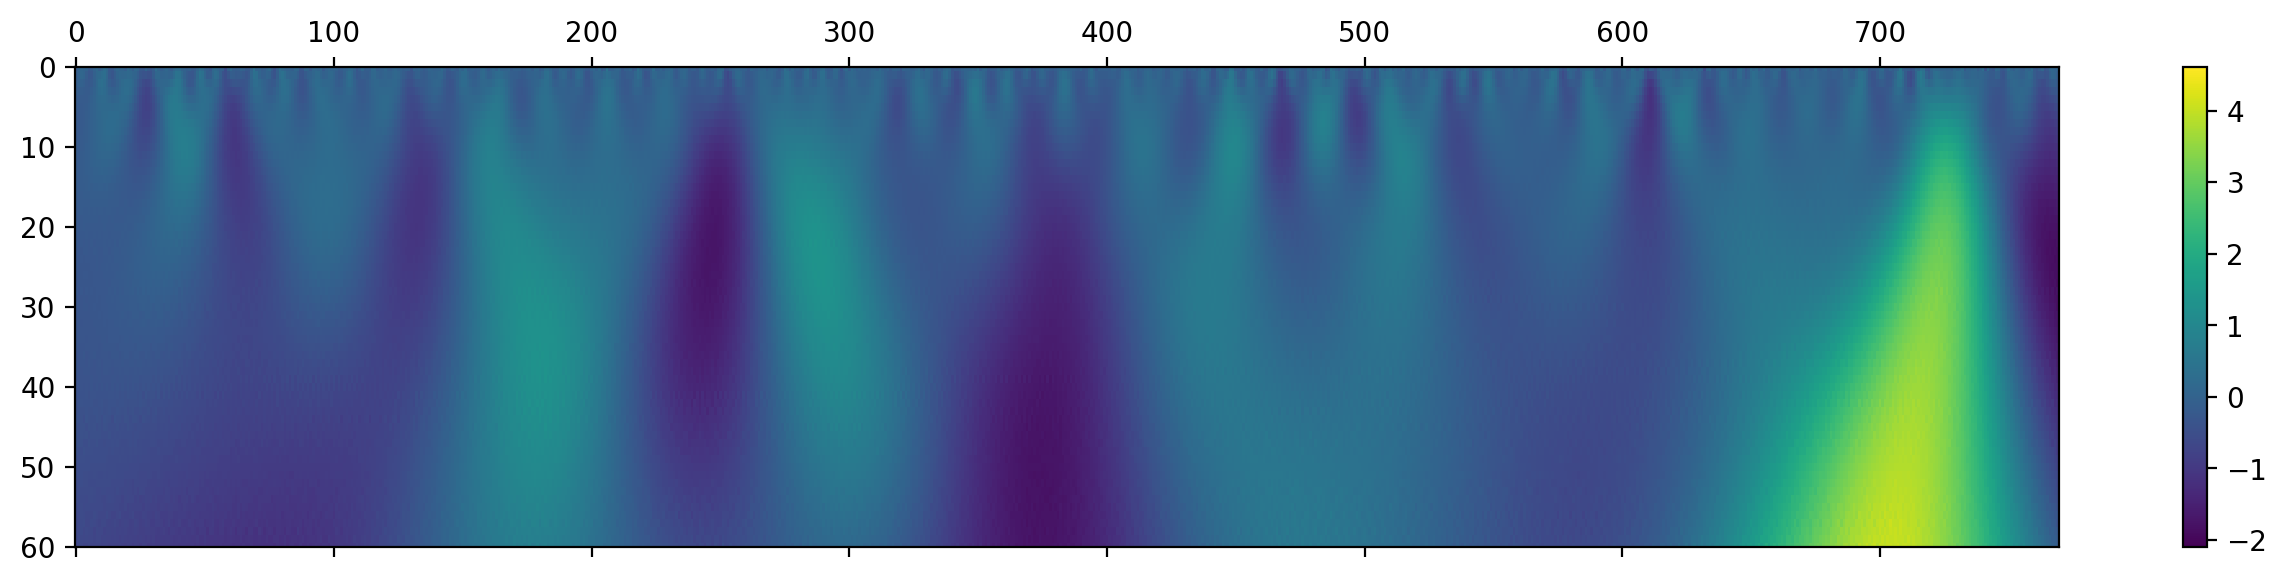

In [193]:
coef, freqs=pywt.cwt(sie_ensmn_anom_allit_f770,np.arange(1,150),'gaus1')

plt.matshow(coef, aspect='auto')
plt.ylim(60,0)
plt.colorbar()

In [122]:
770/2

385.0

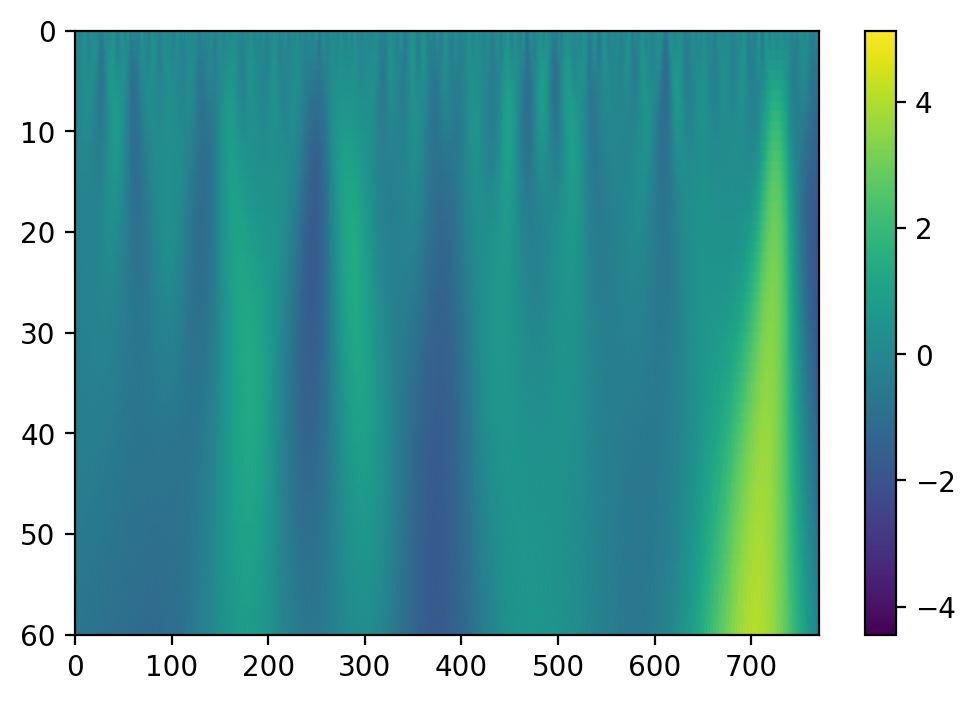

In [123]:
coef, freqs=pywt.cwt(sie_ensmn_anom_allit_f770,np.arange(2,385),'gaus1')

#plt.matshow(coef, aspect='auto')
plt.pcolormesh(coef)
plt.ylim(60,0)
plt.colorbar()

In [71]:
nobs_allit_ccsm4.max()

405.0

In [63]:
recon_lat, recon_lon = ce_utils.load_recon_grid()

prox_type = list(proxy_assim_loc_allit_ccsm4['iter 0'].keys())

In [64]:
proj = dict(projection=ccrs.Stereographic(central_latitude=90,
                                          central_longitude=-45,
                                          true_scale_latitude=0.1))

/home/disk/chaos/mkb22/anaconda2/envs/lmr_py3_xarray_test/lib/python3.6/site-packages/cartopy/util.py:102: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_data = ma.concatenate((data, data[slicer]), axis=axis)


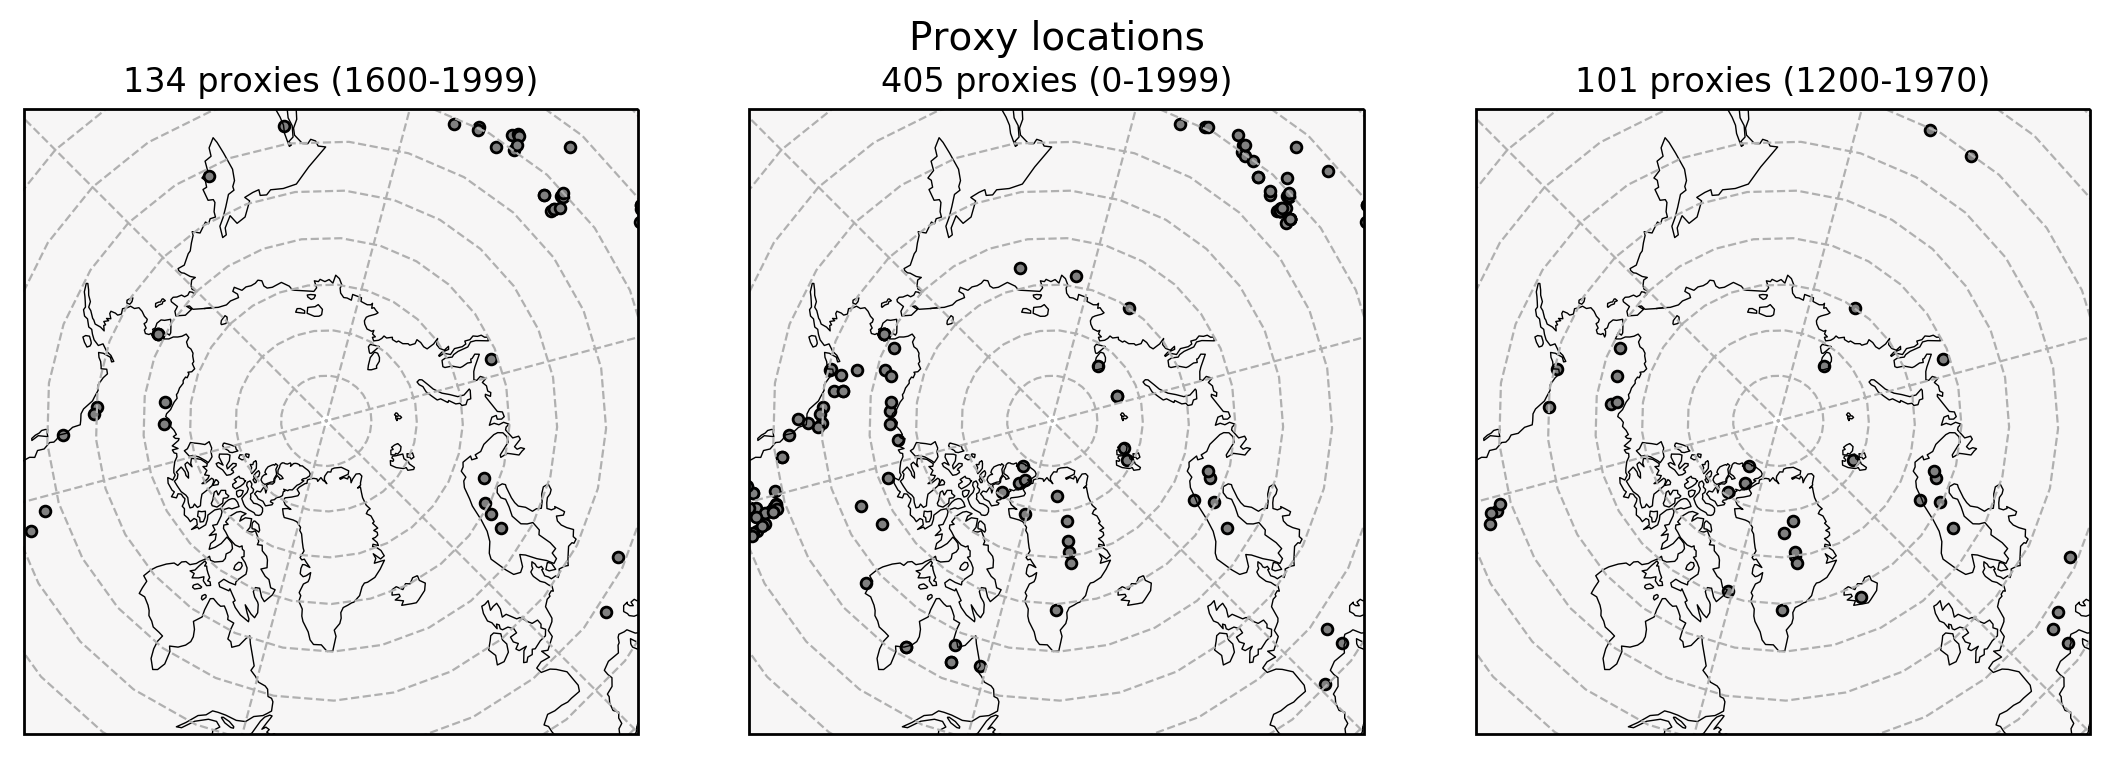

In [82]:
fig,ax = plt.subplots(1,3, figsize=(12, 4), subplot_kw = proj)

cs = ce_utils.sub_arctic_plot(fig,ax[0],np.zeros((91,180)),recon_lat,
                     recon_lon,'134 proxies (1600-1999)',1, colorbar=False)
cs = ce_utils.sub_arctic_plot(fig,ax[1],np.zeros((91,180)),recon_lat,
                     recon_lon,'405 proxies (0-1999)',1, colorbar=False)
cs = ce_utils.sub_arctic_plot(fig,ax[2],np.zeros((91,180)),recon_lat,
                     recon_lon,'101 proxies (1200-1970)',1, colorbar=False)

for ptype in prox_type: 
    if ptype in proxy_assim_loc_allit_f400['iter 0'].keys():
        ax[0].scatter([proxy_assim_loc_allit_f400['iter 0'][ptype]['lon']],
                   [proxy_assim_loc_allit_f400['iter 0'][ptype]['lat']],
                   color='grey',transform=ccrs.PlateCarree(), 
                   marker='o',edgecolors='k',s=15)
    if ptype in proxy_assim_loc_allit_ccsm4['iter 0'].keys():
        ax[1].scatter([proxy_assim_loc_allit_ccsm4['iter 0'][ptype]['lon']],
                   [proxy_assim_loc_allit_ccsm4['iter 0'][ptype]['lat']],
                   color='grey',transform=ccrs.PlateCarree(), 
                   marker='o',edgecolors='k',s=15)
    if ptype in proxy_assim_loc_allit_f770['iter 0'].keys():
        ax[2].scatter([proxy_assim_loc_allit_f770['iter 0'][ptype]['lon']],
                   [proxy_assim_loc_allit_f770['iter 0'][ptype]['lat']],
                   color='grey',transform=ccrs.PlateCarree(), 
                   marker='o',edgecolors='k',s=15)
#     ax[1].scatter([prox_loc_info[ptype]['lon']],[prox_loc_info[ptype]['lat']],
#                    color='grey',transform=ccrs.PlateCarree(), 
#                    label=prox_loc_info[ptype]['label'], marker='o',
#                   edgecolors='k',s=15)

#plt.colorbar(cs,ax=ax[1])
fig.suptitle('Proxy locations',fontsize=14,x=0.46)

plt.tight_layout(rect=(0,0.05,0.92,0.93))

savedir = ('/home/disk/p/mkb22/Documents/si_analysis_kb/common_era_experiments/'+
           'analysis/figures/Brennan_Hakim_2020/')
savename = 'proxy_locations_3.png'
#plt.savefig(savedir+savename)

In [17]:
trend_start_yr = 1200
trend_end_yr = 1800

[trend_recon_full,_,r_recon_full, 
 p_recon_full, se_recon_full] = rrutils.find_trend(sie_ensmn_anom_allit_ccsm4,np.array(recon_years_ccsm4),
                                                   trend_start_yr,trend_end_yr,all_output=True)
[trend_recon_f1000,_,r_recon_f1000, 
 p_recon_f1000, se_recon_f1000] = rrutils.find_trend(sie_ensmn_anom_allit_f1000,np.array(recon_years_f1000),
                                                     trend_start_yr,trend_end_yr,all_output=True)
[trend_recon_f800,_,r_recon_f800, 
 p_recon_f800, se_recon_f800] = rrutils.find_trend(sie_ensmn_anom_allit_f800,np.array(recon_years_f800),
                                                   trend_start_yr,trend_end_yr,all_output=True)
[trend_recon_f780,_,r_recon_f780, 
 p_recon_f780, se_recon_f780] = rrutils.find_trend(sie_ensmn_anom_allit_f780,np.array(recon_years_f780),
                                                   trend_start_yr,trend_end_yr,all_output=True)
[trend_recon_f770,_,r_recon_f770, 
 p_recon_f770, se_recon_f770] = rrutils.find_trend(sie_ensmn_anom_allit_f770,np.array(recon_years_f770),
                                                   trend_start_yr,trend_end_yr,all_output=True)

trend_etcw_full = rrutils.find_trend(sie_ensmn_anom_allit_ccsm4,np.array(recon_years_ccsm4),
                                      1905,1940)
trend_etcw_f1000 = rrutils.find_trend(sie_ensmn_anom_allit_f1000,np.array(recon_years_f1000),
                                      1905,1940)
trend_etcw_f800 = rrutils.find_trend(sie_ensmn_anom_allit_f800,np.array(recon_years_f800),
                                      1905,1940)
trend_etcw_f780 = rrutils.find_trend(sie_ensmn_anom_allit_f780,np.array(recon_years_f780),
                                      1905,1940)

trend_sat_full = rrutils.find_trend(sie_ensmn_anom_allit_ccsm4,np.array(recon_years_ccsm4),
                                      1979,2000)
trend_sat_f1000 = rrutils.find_trend(sie_ensmn_anom_allit_f1000,np.array(recon_years_f1000),
                                      1979,2000)
trend_sat_f800 = rrutils.find_trend(sie_ensmn_anom_allit_f800,np.array(recon_years_f800),
                                      1979,2000)
# trend_sat_f780 = rrutils.find_trend(sie_ensmn_anom_allit_f780,np.array(recon_years_f780),
#                                       1905,1940)

print(str(trend_start_yr)+'-'+str(trend_end_yr)+':')
print('Full:')
print('   trend   = '+str(trend_recon_full))
print('   r-value = '+str(r_recon_full))
print('   p-value = '+str(p_recon_full))
print('f780:')
print('   trend = '+str(trend_recon_f780))
print('   r-value = '+str(r_recon_f780))
print('   p-value = '+str(p_recon_f780))
print('f770:')
print('   trend   = '+str(trend_recon_f770))
print('   r-value = '+str(r_recon_f770))
print('   p-value = '+str(p_recon_f770)+'\n')
print('trend(f800) = '+str(trend_recon_f800))
print('trend(f1000) = '+str(trend_recon_f1000)+'\n')

print('sat trend(full) = '+str(trend_sat_full))
print('sat trend(f800) = '+str(trend_sat_f800))
print('sat trend(f1000) = '+str(trend_sat_f1000)+'\n')

print('etcw trend(full) = '+str(trend_etcw_full))
print('etcw trend(f800) = '+str(trend_etcw_f800))
print('etcw trend(f1000) = '+str(trend_etcw_f1000))
print('etcw trend(f780) = '+str(trend_etcw_f780))

NameError: name 'sie_ensmn_anom_allit_f800' is not defined

In [ ]:
recon_years_f770

In [ ]:
print('Ratio: etcw/full = '+str(np.abs(trend_etcw_f1000)/trend_recon_f1000))
print('Ratio: etcw/f1000 = '+str(np.abs(trend_etcw_full)/trend_recon_full))
print('Ratio: etcw/f800 = '+str(np.abs(trend_etcw_f800)/trend_recon_f800))
print('Ratio: etcw/f780 = '+str(np.abs(trend_etcw_f780)/trend_recon_f780))

In [ ]:
print('Ratio: sat/full = '+str(np.abs(trend_sat_f1000)/trend_recon_f1000))
print('Ratio: sat/f1000 = '+str(np.abs(trend_sat_full)/trend_recon_full))
print('Ratio: sat/f800 = '+str(np.abs(trend_sat_f800)/trend_recon_f800))

In [31]:
Wn2 = 1.0/20
nf2 = 7
b2,a2 = signal.butter(nf2,Wn2,btype='lowpass')
w2, h2 = signal.freqs(b2, a2)
sie_ccsm4_filt20 = signal.filtfilt(b2,a2,sie_ensmn_anom_allit_ccsm4)
sie_f1000_filt20 = signal.filtfilt(b2,a2,sie_ensmn_anom_allit_f1000)
# sie_f780_filt20 = signal.filtfilt(b2,a2,sie_ensmn_anom_allit_f780)
# sie_f800_filt20 = signal.filtfilt(b2,a2,sie_ensmn_anom_allit_f800)
sie_f770_filt20 = signal.filtfilt(b2,a2,sie_ensmn_anom_allit_f770)

/home/disk/chaos/mkb22/anaconda2/envs/lmr_py3_xarray_test/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [43]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

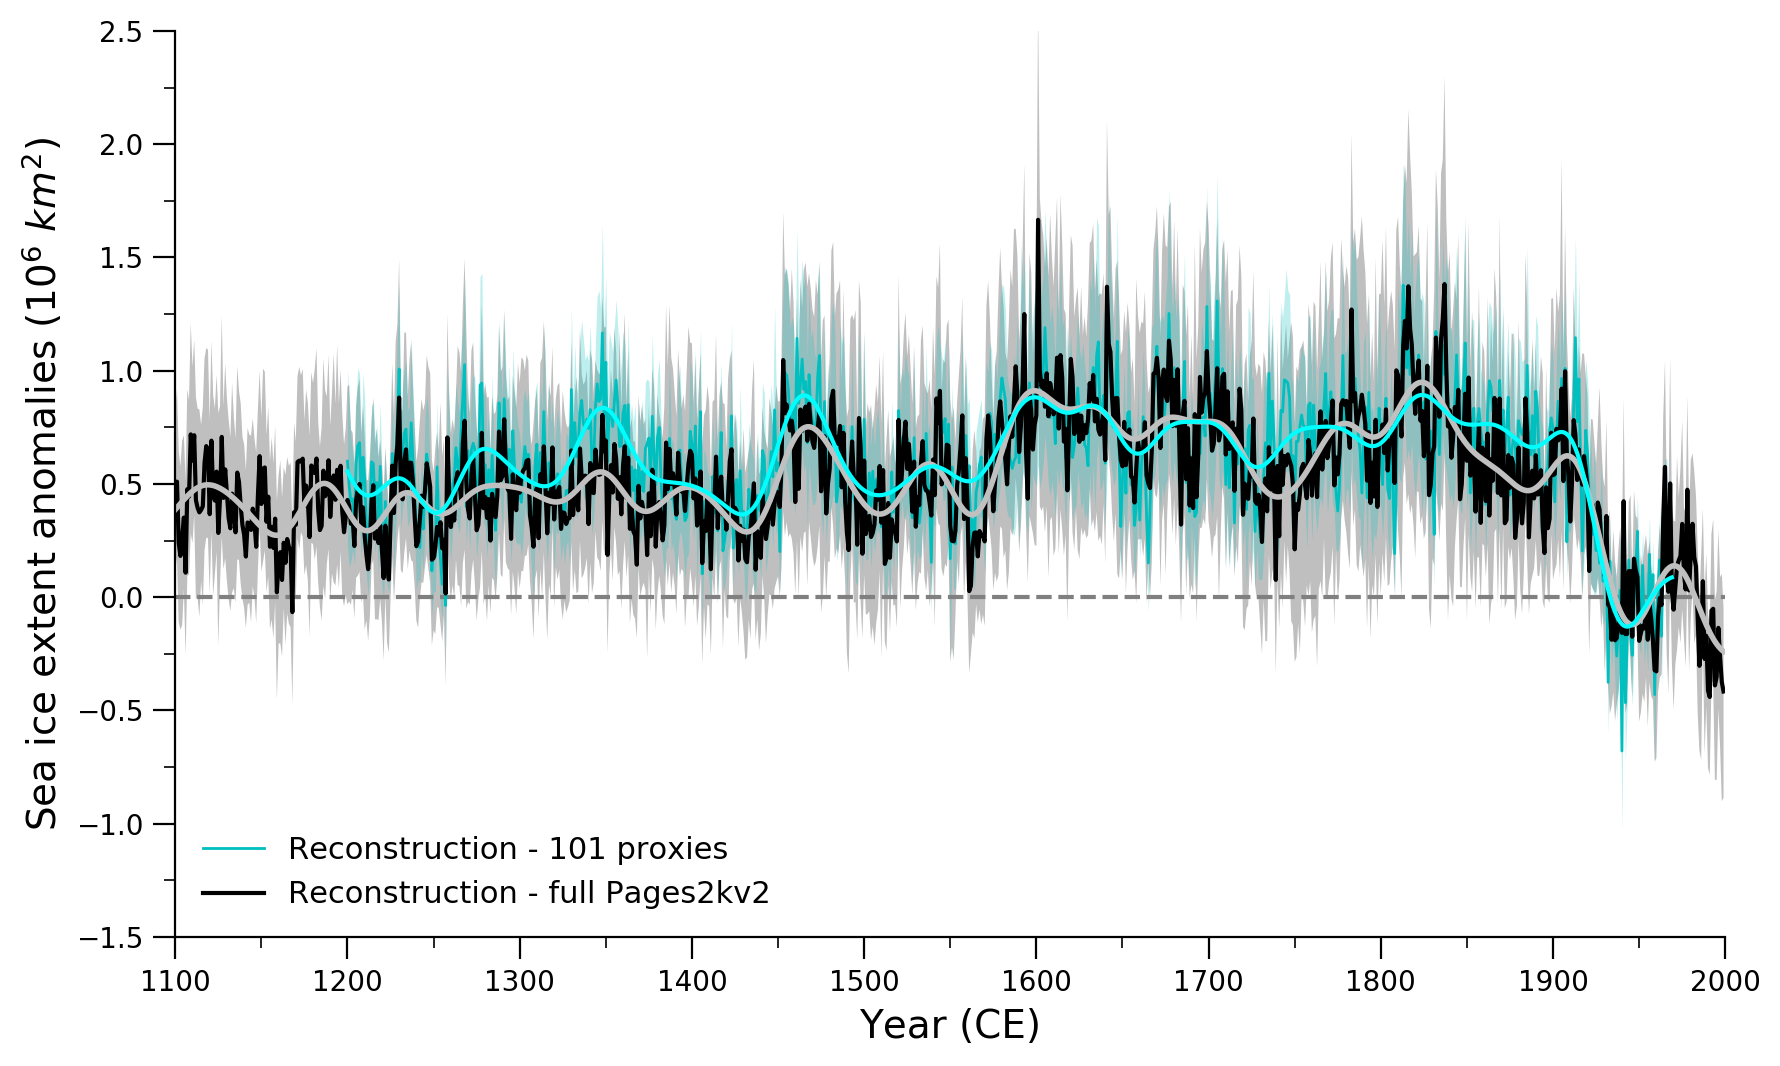

In [54]:
fig,ax = plt.subplots(1,figsize=(10,6))
plt.axhline(0,linestyle='--',color='grey')

plt.fill_between(recon_years_ccsm4,sie_2_5_allit_ccsm4,sie_97_5_allit_ccsm4,
                 alpha=0.25, color='k',linewidth=0.01)
plt.fill_between(recon_years_f770,sie_2_5_allit_f770,sie_97_5_allit_f770,
                 alpha=0.25, color='c',linewidth=0.02)

# plt.plot(recon_years_f800,sie_ensmn_anom_allit_f800,color='m',#'#8756e4',
#          label=('Recon - CCSM4, 34 fixed proxies'),linewidth=1)
# plt.plot(recon_years_f780,sie_ensmn_anom_allit_f780,color='royalblue',#'#8756e4',
#          label=('Recon - CCSM4, 72 fixed proxies'),linewidth=1)
plt.plot(recon_years_f770,sie_ensmn_anom_allit_f770,color='c',#'#8756e4',
         label=('Reconstruction - 101 proxies'),linewidth=1)
# plt.plot(recon_years_f1000,sie_ensmn_anom_allit_f1000,color='orange',#'#8756e4',
#          label=('Recon - CCSM4, 25 fixed proxies'),linewidth=1)
plt.plot(recon_years_ccsm4,sie_ensmn_anom_allit_ccsm4,color='k',#'#8756e4',
         label=('Reconstruction - full Pages2kv2'),linewidth=1.5)

plt.plot(recon_years_ccsm4,sie_ccsm4_filt20,color='silver',linewidth=2)
#plt.plot(recon_years_f400,sie_f800_filt20,color='m',linewidth=1.5)
#plt.plot(recon_years_f780,sie_f780_filt20,color='royalblue',linewidth=1.5)
# plt.plot(recon_years_f1000,sie_f1000_filt20,color='orange',linewidth=1.5)
plt.plot(recon_years_f770,sie_f770_filt20,color='cyan',linewidth=1.5)


# plt.text(1050,2.0,'Trend ('+str(trend_start_yr)+'-'+str(trend_end_yr)+') = {:e}'.format(trend_recon_full))
# plt.text(1050,1.8,'Trend ('+str(trend_start_yr)+'-'+str(trend_end_yr)+') = {:e}'.format(trend_recon_f770),color='c')

#plt.axvline(1911, color='grey',linestyle='--')
#plt.axvline(1927, color='grey',linestyle='--')

plt.ylabel('Sea ice extent anomalies (10$^{6}$ $km^2$)',fontsize=14)
plt.xlabel('Year (CE)',fontsize=14)
#plt.title('Total Arctic Sea Ice Extent', fontsize=14)

plt.legend(fontsize=11,loc='lower left',frameon=False)
#plt.ylim(7,13.1,1)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.yaxis.set_minor_locator(MultipleLocator(0.25))
ax.xaxis.set_minor_locator(MultipleLocator(50))
ax.tick_params(which='major', length=8)
ax.tick_params(which='minor', length=4)

plt.xlim(1100,2000)
plt.ylim(-1.5,2.5)

savedir = ('/home/disk/p/mkb22/Documents/si_analysis_kb/common_era_experiments/'+
           'analysis/figures/Brennan_Hakim_2020/')
savename = 'Fixed_proxy_full_timeseries_1100_2000.png'
plt.savefig(savedir+savename)

In [98]:
trend_recon_full_filt = rrutils.find_trend(sie_ccsm4_filt20,np.array(recon_years_ccsm4),
                                      trend_start_yr,trend_end_yr)
trend_recon_f1000_filt = rrutils.find_trend(sie_f1000_filt20,np.array(recon_years_f1000),
                                      trend_start_yr,trend_end_yr)
trend_recon_f800_filt = rrutils.find_trend(sie_f800_filt20,np.array(recon_years_f800),
                                      trend_start_yr,trend_end_yr)
trend_recon_f780_filt = rrutils.find_trend(sie_f780_filt20,np.array(recon_years_f780),
                                      trend_start_yr,trend_end_yr)
trend_recon_f770_filt = rrutils.find_trend(sie_ensmn_anom_allit_f770,np.array(recon_years_f770),
                                      trend_start_yr,trend_end_yr)

print('trend(full) = '+str(trend_recon_full_filt))
print('trend(f780) = '+str(trend_recon_f780_filt))
print('trend(f770) = '+str(trend_recon_f770_filt))
print('trend(f800) = '+str(trend_recon_f800_filt))
print('trend(f1000) = '+str(trend_recon_f1000_filt))

trend(full) = 0.0006320412569988074
trend(f780) = 0.0002734530321259338
trend(f770) = 0.00042794126615769976
trend(f800) = 6.222536199064892e-05
trend(f1000) = 0.00010833731962596844


In [99]:
recon_years_f770

range(1200, 1970)

In [100]:
[ce_sie_full_f770,corr_sie_full_f770,
 var_sie_full,var_sie_f770] = rrutils.find_ce_corr(sie_ensmn_anom_allit_f770, 
                                                   sie_ensmn_anom_allit_ccsm4,
                                                   np.array(recon_years_ccsm4),
                                                   np.array(recon_years_f770),
                                                   recon_years_f770[0],recon_years_f770[-1])

print('CE       = '+str(ce_sie_full_f770))
print('Corr     = '+str(corr_sie_full_f770))
print('Var(var) = '+str(var_sie_f770))
print('Var(ref) = '+str(var_sie_full))

CE       = 0.6002319629219564
Corr     = 0.8177149927989201
Var(var) = 0.07614153877174243
Var(ref) = 0.07352124999814329


In [532]:
ind = np.where((np.array(recon_years_ccsm4)>=recon_years_f770[0])&(np.array(recon_years_ccsm4)<recon_years_f770[-1]+1))

np.corrcoef(sie_ensmn_anom_allit_ccsm4[ind],sie_ensmn_anom_allit_f770)[0,1]

0.8177149927989201

In [424]:
var_ratio = np.var(sie_ensmn_anom_allit_ccsm4)/np.var(sie_ensmn_anom_allit_f780)

In [459]:
np.var(sie_ensmn_anom_allit_ccsm4), np.var(sie_ensmn_anom_allit_f780), np.var(sie_ensmn_anom_allit_f780*1.25)

(0.060271704367122675, 0.0395517878442416, 0.061799668506627485)

In [331]:
recon_years_f780

range(1200, 1980)

In [71]:
sie_ens_allit_ccsm4_2d = np.reshape(sie_ens_allit_ccsm4,(sie_ens_allit_ccsm4.shape[0],
                                    sie_ens_allit_ccsm4.shape[1]*sie_ens_allit_ccsm4.shape[2]))
sie_ens_allit_f1000_2d = np.reshape(sie_ens_allit_f1000,(sie_ens_allit_f1000.shape[0],
                                    sie_ens_allit_f1000.shape[1]*sie_ens_allit_f1000.shape[2]))
# sie_ens_allit_f800_2d = np.reshape(sie_ens_allit_f800,(sie_ens_allit_f800.shape[0],
#                                    sie_ens_allit_f800.shape[1]*sie_ens_allit_f800.shape[2]))
sie_ens_allit_f400_2d = np.reshape(sie_ens_allit_f400,(sie_ens_allit_f400.shape[0],
                                   sie_ens_allit_f400.shape[1]*sie_ens_allit_f400.shape[2]))
# sie_ens_allit_f200_2d = np.reshape(sie_ens_allit_f200,(sie_ens_allit_f200.shape[0],
#                                    sie_ens_allit_f200.shape[1]*sie_ens_allit_f200.shape[2]))

# Total SIE value analysis: 

In [33]:
def plot_hist_vals_experiments(pre_industrial_vals, post_industrial_vals, 
                               sat_vals, title, start_year, percentile_low, percentile_high):
    fig, (ax_hist) = plt.subplots(1,figsize=(7,6))
    binwidth=0.02

    hist_kwargs = dict(histtype='step',linewidth=1.5)

    ax_hist.axvspan(np.percentile(pre_industrial_vals,percentile_low),
                    np.percentile(pre_industrial_vals,percentile_high),
                    color='royalblue',alpha=0.2,edgecolor=None)
#     ax_hist.axvspan(np.percentile(post_industrial_trends,percentile_low),
#                     np.percentile(post_industrial_trends,percentile_high),
#                     color='navy',alpha=0.2,edgecolor=None)

    ax_hist.axvline(np.mean(sat_vals),linestyle='--',color='royalblue')
    ax_hist.axvline(np.nanmean(post_industrial_vals),linestyle='--',color='navy')
    
#     ax_hist.hist(fet_sie_anom[:-21],facecolor='salmon',edgecolor='white',
#                  fill=True,density=True,alpha=0.6,label='satellite values 1979-2000',
#                  bins=np.arange(min(fet_sie_anom[:-21]),max(fet_sie_anom[:-21]) + binwidth, binwidth),
#                  histtype='step',linewidth=1)
#     ax_hist.hist(fet_sie_anom,edgecolor='firebrick',density=True,
#                  alpha=0.9,label='Satellite values (1979-2017)',
#                  bins=np.arange(min(fet_sie_anom),max(fet_sie_anom) + binwidth, binwidth),
#                  **hist_kwargs) 

    ax_hist.hist(pre_industrial_vals,facecolor='royalblue',edgecolor='white',
                 fill=True,density=True,alpha=0.6,label='Values ('+str(start_year)+'-1850)',
                 bins=np.arange(min(pre_industrial_vals),max(pre_industrial_vals) + binwidth, binwidth),
                 histtype='step',linewidth=1)

    ax_hist.hist(post_industrial_vals,edgecolor='navy',density=True,
                 alpha=0.9,label='Values (1850-1979)',
                 bins=np.arange(min(post_industrial_vals),max(post_industrial_vals) + binwidth, binwidth),
                 **hist_kwargs)
    ax_hist.hist(sat_vals,edgecolor='royalblue',density=True,
                 facecolor='royalblue',alpha=0.9,label='Values (1979-2000)',
                 bins=np.arange(min(sat_vals),max(sat_vals) + binwidth, binwidth),
                 **hist_kwargs)

    plt.yticks(fontsize=14)

    ax_hist.set_xticks(np.arange(-2,3,0.5))
    ax_hist.set_ylabel('Probablility Density',fontsize=14)
    ax_hist.tick_params(axis='both', which='major', labelsize=14)
    ax_hist.set_xlim(-1.5,3)

    plt.legend()
    #plt.ylim(0,90)

    plt.subplots_adjust(wspace=0, hspace=0.015)
    ax_hist.set_title(title, fontsize=16)

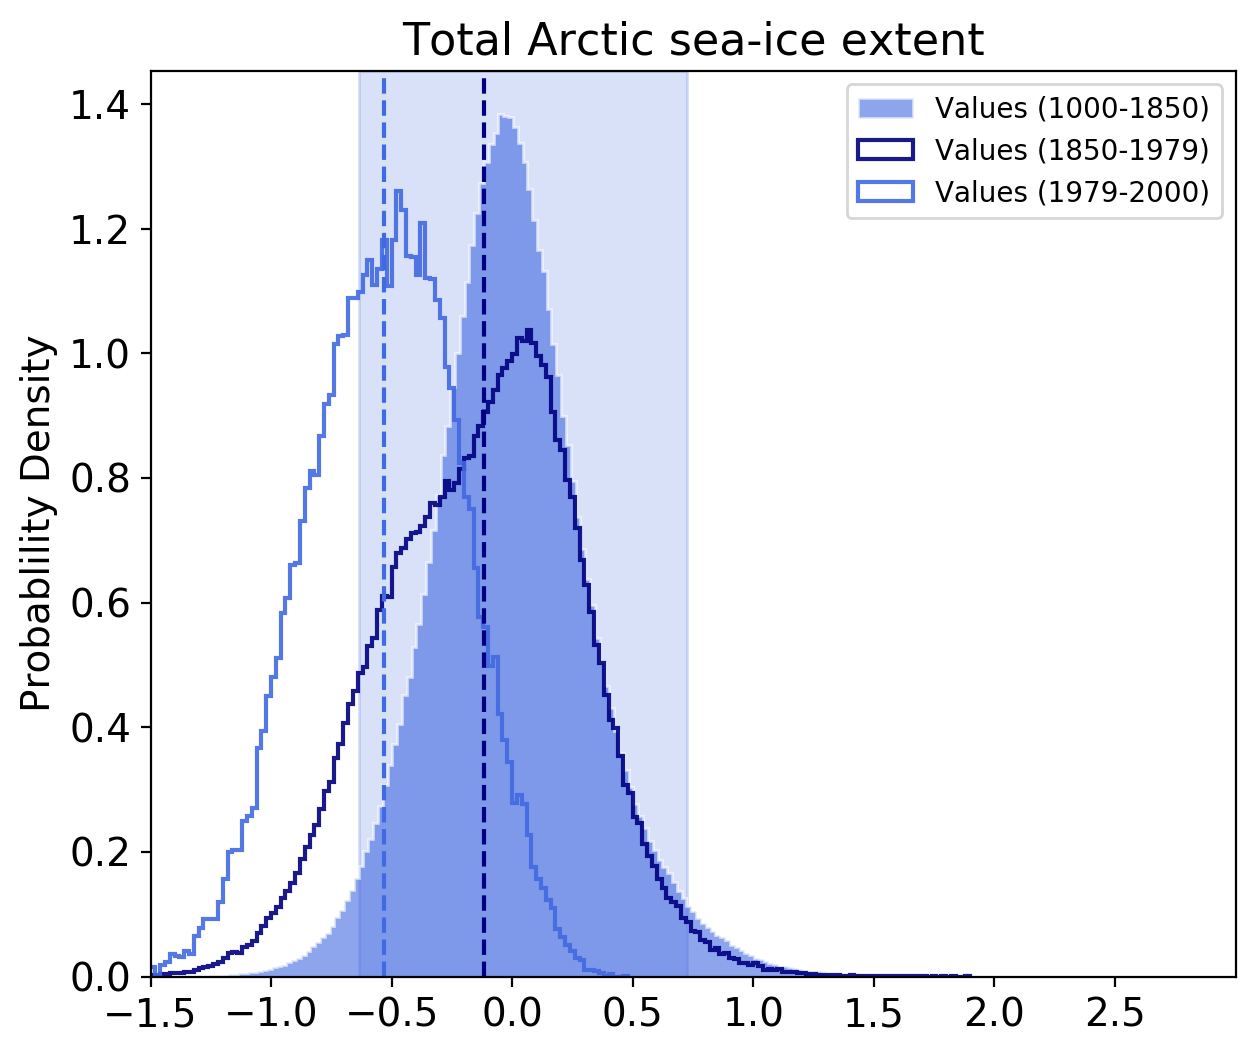

In [34]:
title = 'Total Arctic sea-ice extent'

plot_hist_vals_experiments((sie_ens_anom_allit_ccsm4[0:1850,:]).flatten(), 
                          (sie_ens_anom_allit_ccsm4[1850:,:]).flatten(), 
                          (sie_ens_anom_allit_ccsm4[1979:,:]).flatten(), 
                          title, 1000, 2.5, 97.5)

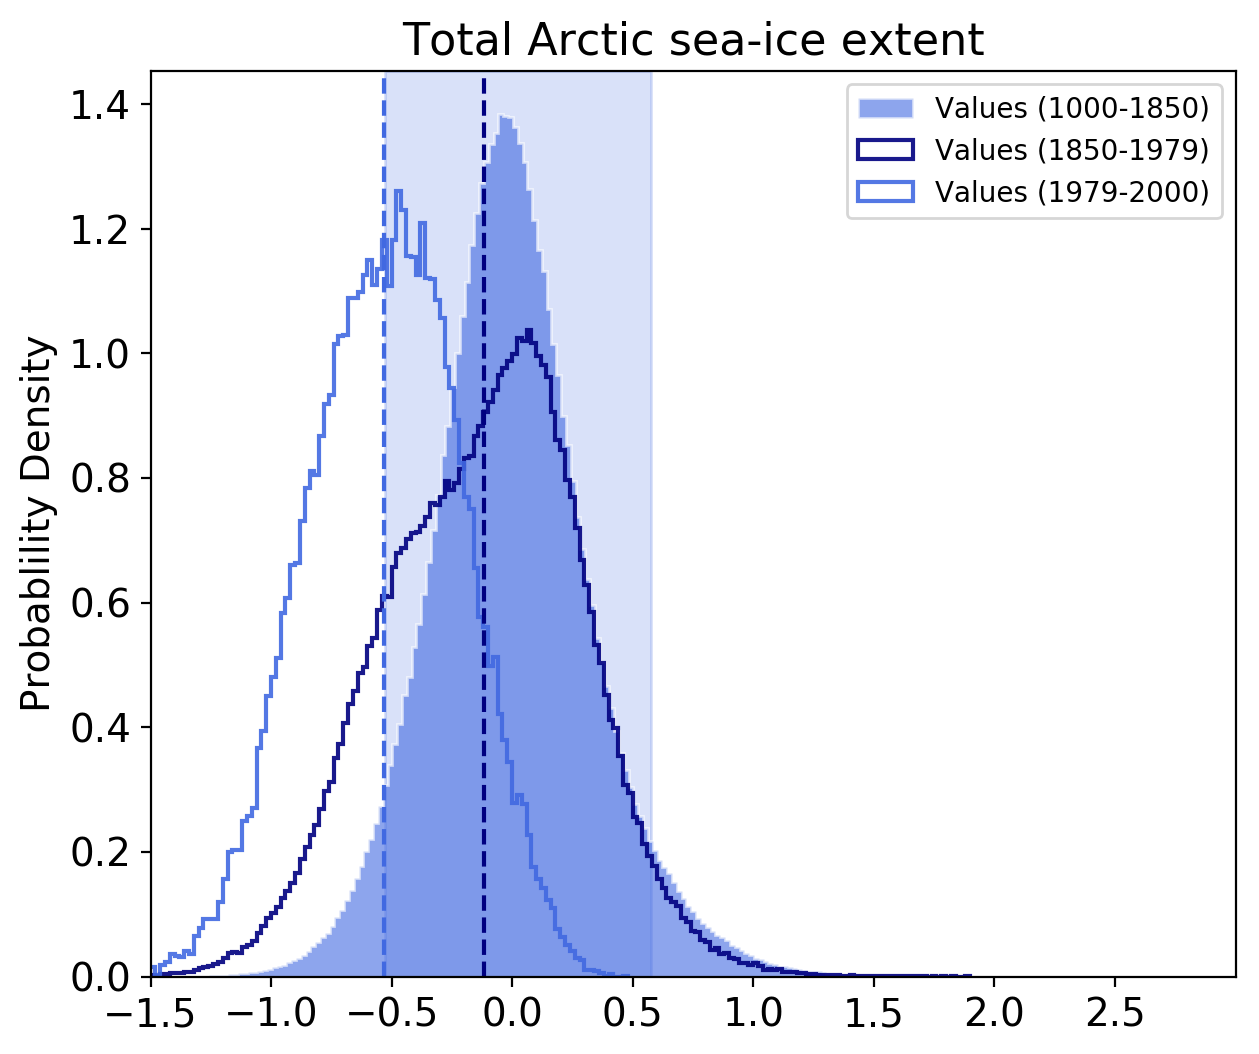

In [35]:
title = 'Total Arctic sea-ice extent'

plot_hist_vals_experiments((sie_ens_anom_allit_ccsm4[0:1850,:]).flatten(), 
                          (sie_ens_anom_allit_ccsm4[1850:,:]).flatten(), 
                          (sie_ens_anom_allit_ccsm4[1979:,:]).flatten(), 
                          title, 1000, 5, 95)

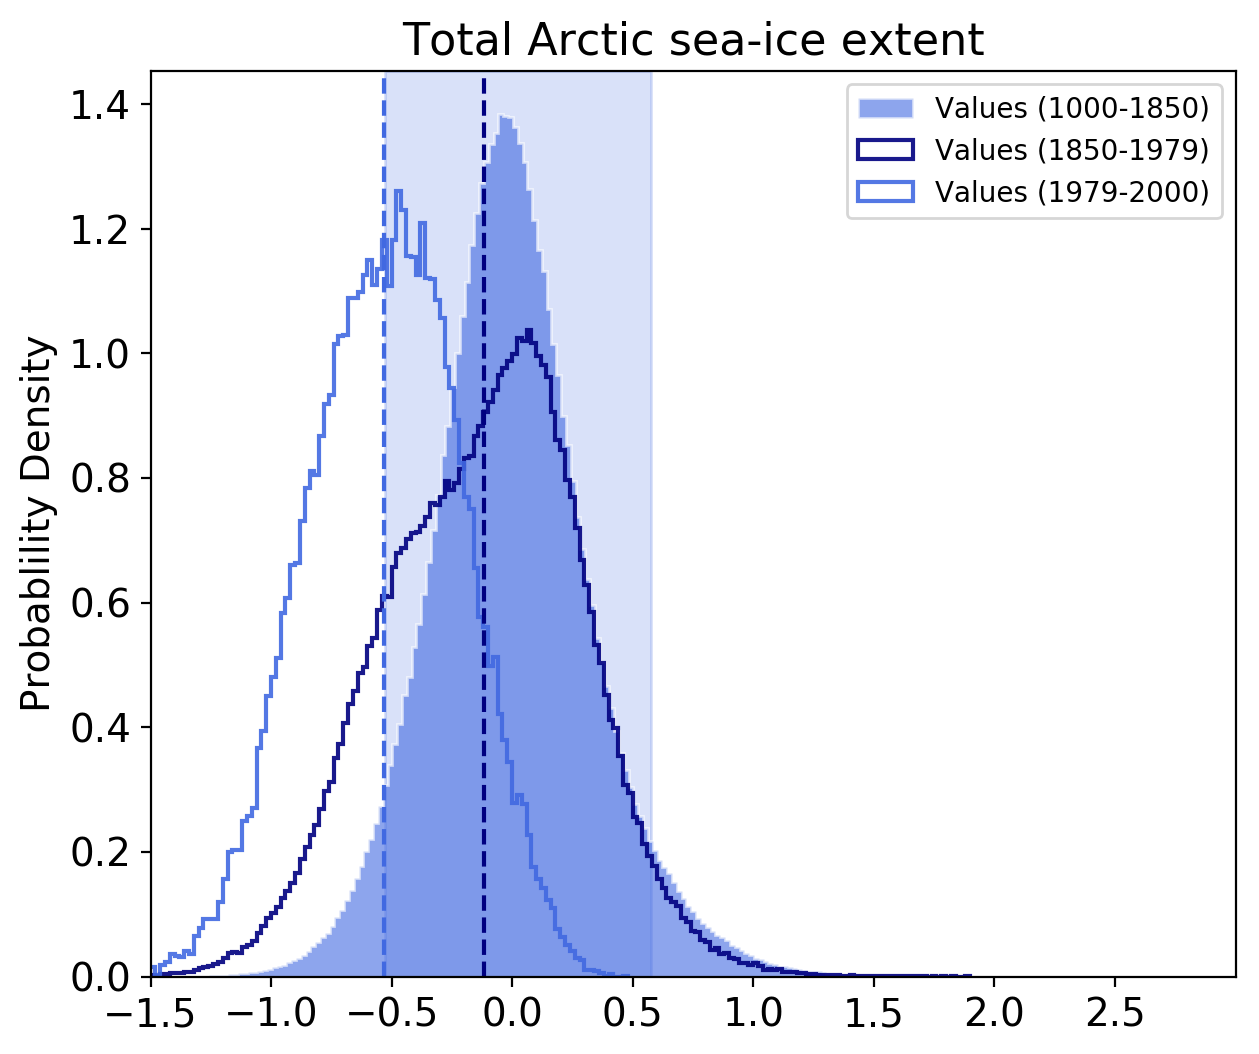

In [36]:
title = 'Total Arctic sea-ice extent'

plot_hist_vals_experiments((sie_ens_anom_allit_ccsm4[0:1850,:]).flatten(), 
                          (sie_ens_anom_allit_ccsm4[1850:,:]).flatten(), 
                          (sie_ens_anom_allit_ccsm4[1979:,:]).flatten(), 
                          title, 1000, 5, 95)

# Trend analysis: 

In [30]:
window = np.arange(10,100,5)

sat_slope_mean = np.zeros(window.shape[0])
sat_slope_max = np.zeros(window.shape[0])
sat_slope_min = np.zeros(window.shape[0])
sat_slope_p95 = np.zeros(window.shape[0])
sat_slope_p5 = np.zeros(window.shape[0])

pre_slope_mean = np.zeros(window.shape[0])
pre_slope_max = np.zeros(window.shape[0])
pre_slope_min = np.zeros(window.shape[0])
pre_slope_p95 = np.zeros(window.shape[0])
pre_slope_p5 = np.zeros(window.shape[0])

post_slope_mean = np.zeros(window.shape[0])
post_slope_max = np.zeros(window.shape[0])
post_slope_min = np.zeros(window.shape[0])
post_slope_p95 = np.zeros(window.shape[0])
post_slope_p5 = np.zeros(window.shape[0])

In [253]:
2017-1979

38

In [31]:
window = np.arange(10,38,1)

sat_slope_mean = np.zeros(window.shape[0])
sat_slope_max = np.zeros(window.shape[0])
sat_slope_min = np.zeros(window.shape[0])
sat_slope_p95 = np.zeros(window.shape[0])
sat_slope_p5 = np.zeros(window.shape[0])
sat_slope_p97_5 = np.zeros(window.shape[0])
sat_slope_p2_5 = np.zeros(window.shape[0])

for w,win in enumerate(window): 
    print(str(w)+', '+str(win))
    # Satellite range: 
    sat_range_start = np.arange(1979,2017-win,1)
    sat_range_end = np.arange(1979+win,2017,1)

    # Calc possible trends satellite era: -----------------------------
    sat_slope_all_endpts = np.zeros(len(sat_range_start))

    for t,time in enumerate(sat_range_start):
        sat_slope_all_endpts[t] = rrutils.find_trend(fet_sie_anom,fet_time,
                                                     sat_range_start[t],sat_range_end[t])

    sat_slope_mean[w] = np.nanmean(sat_slope_all_endpts)
    sat_slope_max[w] = sat_slope_all_endpts.max()
    sat_slope_min[w] = sat_slope_all_endpts.min()
    sat_slope_p95[w] = np.percentile(sat_slope_all_endpts,95)
    sat_slope_p5[w] = np.percentile(sat_slope_all_endpts,5)
    sat_slope_p97_5[w] = np.percentile(sat_slope_all_endpts,97.5)
    sat_slope_p2_5[w] = np.percentile(sat_slope_all_endpts,2.5)

0, 10


TypeError: 'numpy.int64' object is not callable

In [32]:
window_pre = np.arange(10,40,1)

pre_slope_mean = np.zeros(window_pre.shape[0])
pre_slope_max = np.zeros(window_pre.shape[0])
pre_slope_min = np.zeros(window_pre.shape[0])
pre_slope_p95 = np.zeros(window_pre.shape[0])
pre_slope_p5 = np.zeros(window_pre.shape[0])
pre_slope_p97_5 = np.zeros(window_pre.shape[0])
pre_slope_p2_5 = np.zeros(window_pre.shape[0])

for w,win in enumerate(window_pre): 
    print(str(w)+', '+str(win))
    # Pre-industrial 
    start_full_range = np.arange(1000,1850-win,1)
    end_full_range = np.arange(1000+win,1850,1)
    
    # Calc possible trends pre-industrial: ----------------------------
    slope_all_recon = []
    slope_f1000_recon = []

    for it in range(sie_ens_allit_ccsm4_2d.shape[1]):
        hold = np.zeros((len(start_full_range)))
#        if np.remainder(it,100) == 0:  
 #           print(str(it)+' of '+str(sie_ens_allit_ccsm4_2d.shape[1]))
        for t in range(len(start_full_range)):
            hold[t] = rrutils.find_trend(sie_ens_allit_ccsm4_2d[:,it],
                                         np.array(recon_years_ccsm4),
                                         start_full_range[t],end_full_range[t])
        slope_all_recon.append(hold)
    slope_all_endpts_full_ccsm4 = np.array(slope_all_recon).flatten()   

    pre_slope_mean[w] = np.nanmean(slope_all_endpts_full_ccsm4)
    pre_slope_max[w] = slope_all_endpts_full_ccsm4.max()
    pre_slope_min[w] = slope_all_endpts_full_ccsm4.min()
    pre_slope_p95[w] = np.percentile(slope_all_endpts_full_ccsm4,95)
    pre_slope_p97_5[w] = np.percentile(slope_all_endpts_full_ccsm4,97.5)
    pre_slope_p2_5[w] = np.percentile(slope_all_endpts_full_ccsm4,2.5)
    pre_slope_p5[w] = np.percentile(slope_all_endpts_full_ccsm4,5)

0, 10


NameError: name 'sie_ens_allit_ccsm4_2d' is not defined

In [ ]:
window_post = np.arange(10,40,1)

post_slope_mean = np.zeros(window_post.shape[0])
post_slope_max = np.zeros(window_post.shape[0])
post_slope_min = np.zeros(window_post.shape[0])
post_slope_p95 = np.zeros(window_post.shape[0])
post_slope_p5 = np.zeros(window_post.shape[0])
post_slope_p97_5 = np.zeros(window_post.shape[0])
post_slope_p2_5 = np.zeros(window_post.shape[0])

for w,win in enumerate(window):    
    print(str(w)+', '+str(win))
    # Post-industrial range: 
    start_post_range = np.arange(1850,1979-win,1)
    end_post_range = np.arange(1850+win,1979,1)
    
    # Calc possible trends post-industrial: ------------------------------------------
    slope_post_recon = []

    for it in range(sie_ens_allit_ccsm4_2d.shape[1]):
        hold = np.zeros((len(start_post_range)))
        hold_f1000 = np.zeros((len(start_post_range)))
#        if np.remainder(it,100) == 0:  
 #           print(str(it)+' of '+str(sie_ens_allit_f400_2d.shape[1]))
        for t in range(len(start_post_range)):
            hold[t] = rrutils.find_trend(sie_ens_allit_ccsm4_2d[:,it],
                                         np.array(recon_years_ccsm4),
                                         start_post_range[t],end_post_range[t])
        slope_all_recon.append(hold)

    slope_all_endpts_post_ccsm4 = np.array(slope_post_recon).flatten() 

    post_slope_mean[w] = np.nanmean(slope_all_endpts_post_ccsm4)
    post_slope_max[w] = slope_all_endpts_post_ccsm4.max()
    post_slope_min[w] = slope_all_endpts_post_ccsm4.min()
    post_slope_p95[w] = np.percentile(slope_all_endpts_post_ccsm4,95)
    post_slope_p97_5[w] = np.percentile(slope_all_endpts_post_ccsm4,97.5)
    post_slope_p2_5[w] = np.percentile(slope_all_endpts_post_ccsm4,2.5)
    post_slope_p5[w] = np.percentile(slope_all_endpts_post_ccsm4,5)

In [270]:
window_sat_recon = np.arange(10,21,1)

sat_recon_slope_mean = np.zeros(window_sat_recon.shape[0])
sat_recon_slope_max = np.zeros(window_sat_recon.shape[0])
sat_recon_slope_min = np.zeros(window_sat_recon.shape[0])
sat_recon_slope_p95 = np.zeros(window_sat_recon.shape[0])
sat_recon_slope_p5 = np.zeros(window_sat_recon.shape[0])
sat_recon_slope_p97_5 = np.zeros(window_sat_recon.shape[0])
sat_recon_slope_p2_5 = np.zeros(window_sat_recon.shape[0])

for w,win in enumerate(window_sat_recon):
    print(str(w)+', '+str(win))
    # Satellite range: 
    sat_range_start = np.arange(1979,2000-win,1)
    sat_range_end = np.arange(1979+win,2000,1)

    slope_sat_recon_ccsm4 = np.zeros((sie_ens_allit_ccsm4_2d.shape[1]))

    for it in range(2000):
        slope_sat_recon_ccsm4[it] = rrutils.find_trend(sie_ens_allit_ccsm4_2d[:,it],
                                                       np.array(recon_years_ccsm4),
                                                       sat_range_start[t],sat_range_end[t])

    sat_recon_slope_mean[w] = np.nanmean(slope_sat_recon_ccsm4)
    sat_recon_slope_max[w] = slope_sat_recon_ccsm4.max()
    sat_recon_slope_min[w] = slope_sat_recon_ccsm4.min()
    sat_recon_slope_p95[w] = np.percentile(slope_sat_recon_ccsm4,95)
    sat_recon_slope_p5[w] = np.percentile(slope_sat_recon_ccsm4,5)
    sat_recon_slope_p97_5[w] = np.percentile(slope_sat_recon_ccsm4,97.5)
    sat_recon_slope_p2_5[w] = np.percentile(slope_sat_recon_ccsm4,2.5)

0, 10
1, 11
2, 12
3, 13
4, 14
5, 15
6, 16
7, 17
8, 18
9, 19
10, 20


In [250]:
slope_sat_recon_ccsm4.mean()

-0.026794122553270985

In [1]:
plt.figure(figsize=(10,6))

plt.plot(window_pre, pre_slope_mean*100,linewidth=2, color='royalblue', 
         label='Reconstructed pre-industrial \n(1000-1850) mean')
plt.plot(window_sat_recon, sat_recon_slope_mean*100,linewidth=2, color='c', 
         label='Reconstructed Satellite era \n(1979-2017) mean')
plt.plot(window, sat_slope_mean*100,linewidth=2, color='crimson', 
         label='Satellite \n(1979-2017) mean')

plt.fill_between(window_pre,pre_slope_min*100, pre_slope_max*100, color='royalblue', alpha=0.2)
#plt.fill_between(window_sat_recon,sat_recon_slope_min, sat_recon_slope_max, color='m', alpha=0.2)
#plt.fill_between(window,sat_slope_min, sat_slope_max, color='crimson', alpha=0.2)

plt.fill_between(window_pre,pre_slope_p5*100, pre_slope_p95*100, color='royalblue', alpha=0.4, 
                 label='5th and 95th \npercentiles')
plt.fill_between(window_sat_recon,sat_recon_slope_p2_5*100, sat_recon_slope_p97_5*100,
                 color='c', alpha=0.4, label='2.5th and 97.5th \npercentiles')
plt.fill_between(window,sat_slope_p2_5*100, sat_slope_p97_5*100, color='crimson', alpha=0.4, 
                 label='2.5th and 97.5th \npercentiles')

# plt.plot(window_pre,pre_slope_p5,color='royalblue', linestyle='--', linewidth=1.5)
# plt.plot(window_pre,pre_slope_p95,color='royalblue', linestyle='--', linewidth=1.5)
# plt.plot(window_sat_recon,sat_recon_slope_p5,color='salmon', linestyle='--', linewidth=1.5)
# plt.plot(window_sat_recon,sat_recon_slope_p95,color='salmon', linestyle='--', linewidth=1.5)
# plt.plot(window,sat_slope_p5,color='crimson', linestyle='--', linewidth=1.5)
# plt.plot(window,sat_slope_p95,color='crimson', linestyle='--', linewidth=1.5)

plt.xlabel('Trend window (years)', fontsize=14)
plt.ylabel('Trend (10$^8$ km$^2$/year)', fontsize=14)

plt.legend(fontsize=12)
plt.xticks(np.arange(10,40,5))
plt.tick_params(axis='both', which='major', labelsize=12)
plt.xlim(10, 38)
plt.ylim(-0.15,0.15)

savedir = ('/home/disk/p/mkb22/Documents/si_analysis_kb/common_era_experiments/'+
           'analysis/figures/Brennan_Hakim_2020/')
savename = 'Window_trends_15_38_ccsm4.png'
#plt.savefig(savedir+savename, bbox_inches='tight')

NameError: name 'plt' is not defined

In [81]:
seg_length = np.arange(10,501,10)
start_year = 1000
end_year = 2000

var_chunked_f1000 = np.ones((seg_length.shape[0],end_year-start_year-10))*np.nan
#var_chunked_full = np.ones((seg_length.shape[0],99))*np.nan

for ln,sln in enumerate(seg_length):
    for s,seg in enumerate(np.arange(start_year,end_year-sln,1)):
#         print(s)
        ind = np.where((np.array(recon_years_f1000)>=seg)&(np.array(recon_years_f1000)<=seg+sln-1))
        hold = np.var(sie_ensmn_anom_allit_f1000[ind])

        var_chunked_f1000[ln,s] = hold

/home/disk/chaos/mkb22/anaconda2/envs/lmr_py3_xarray_test/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


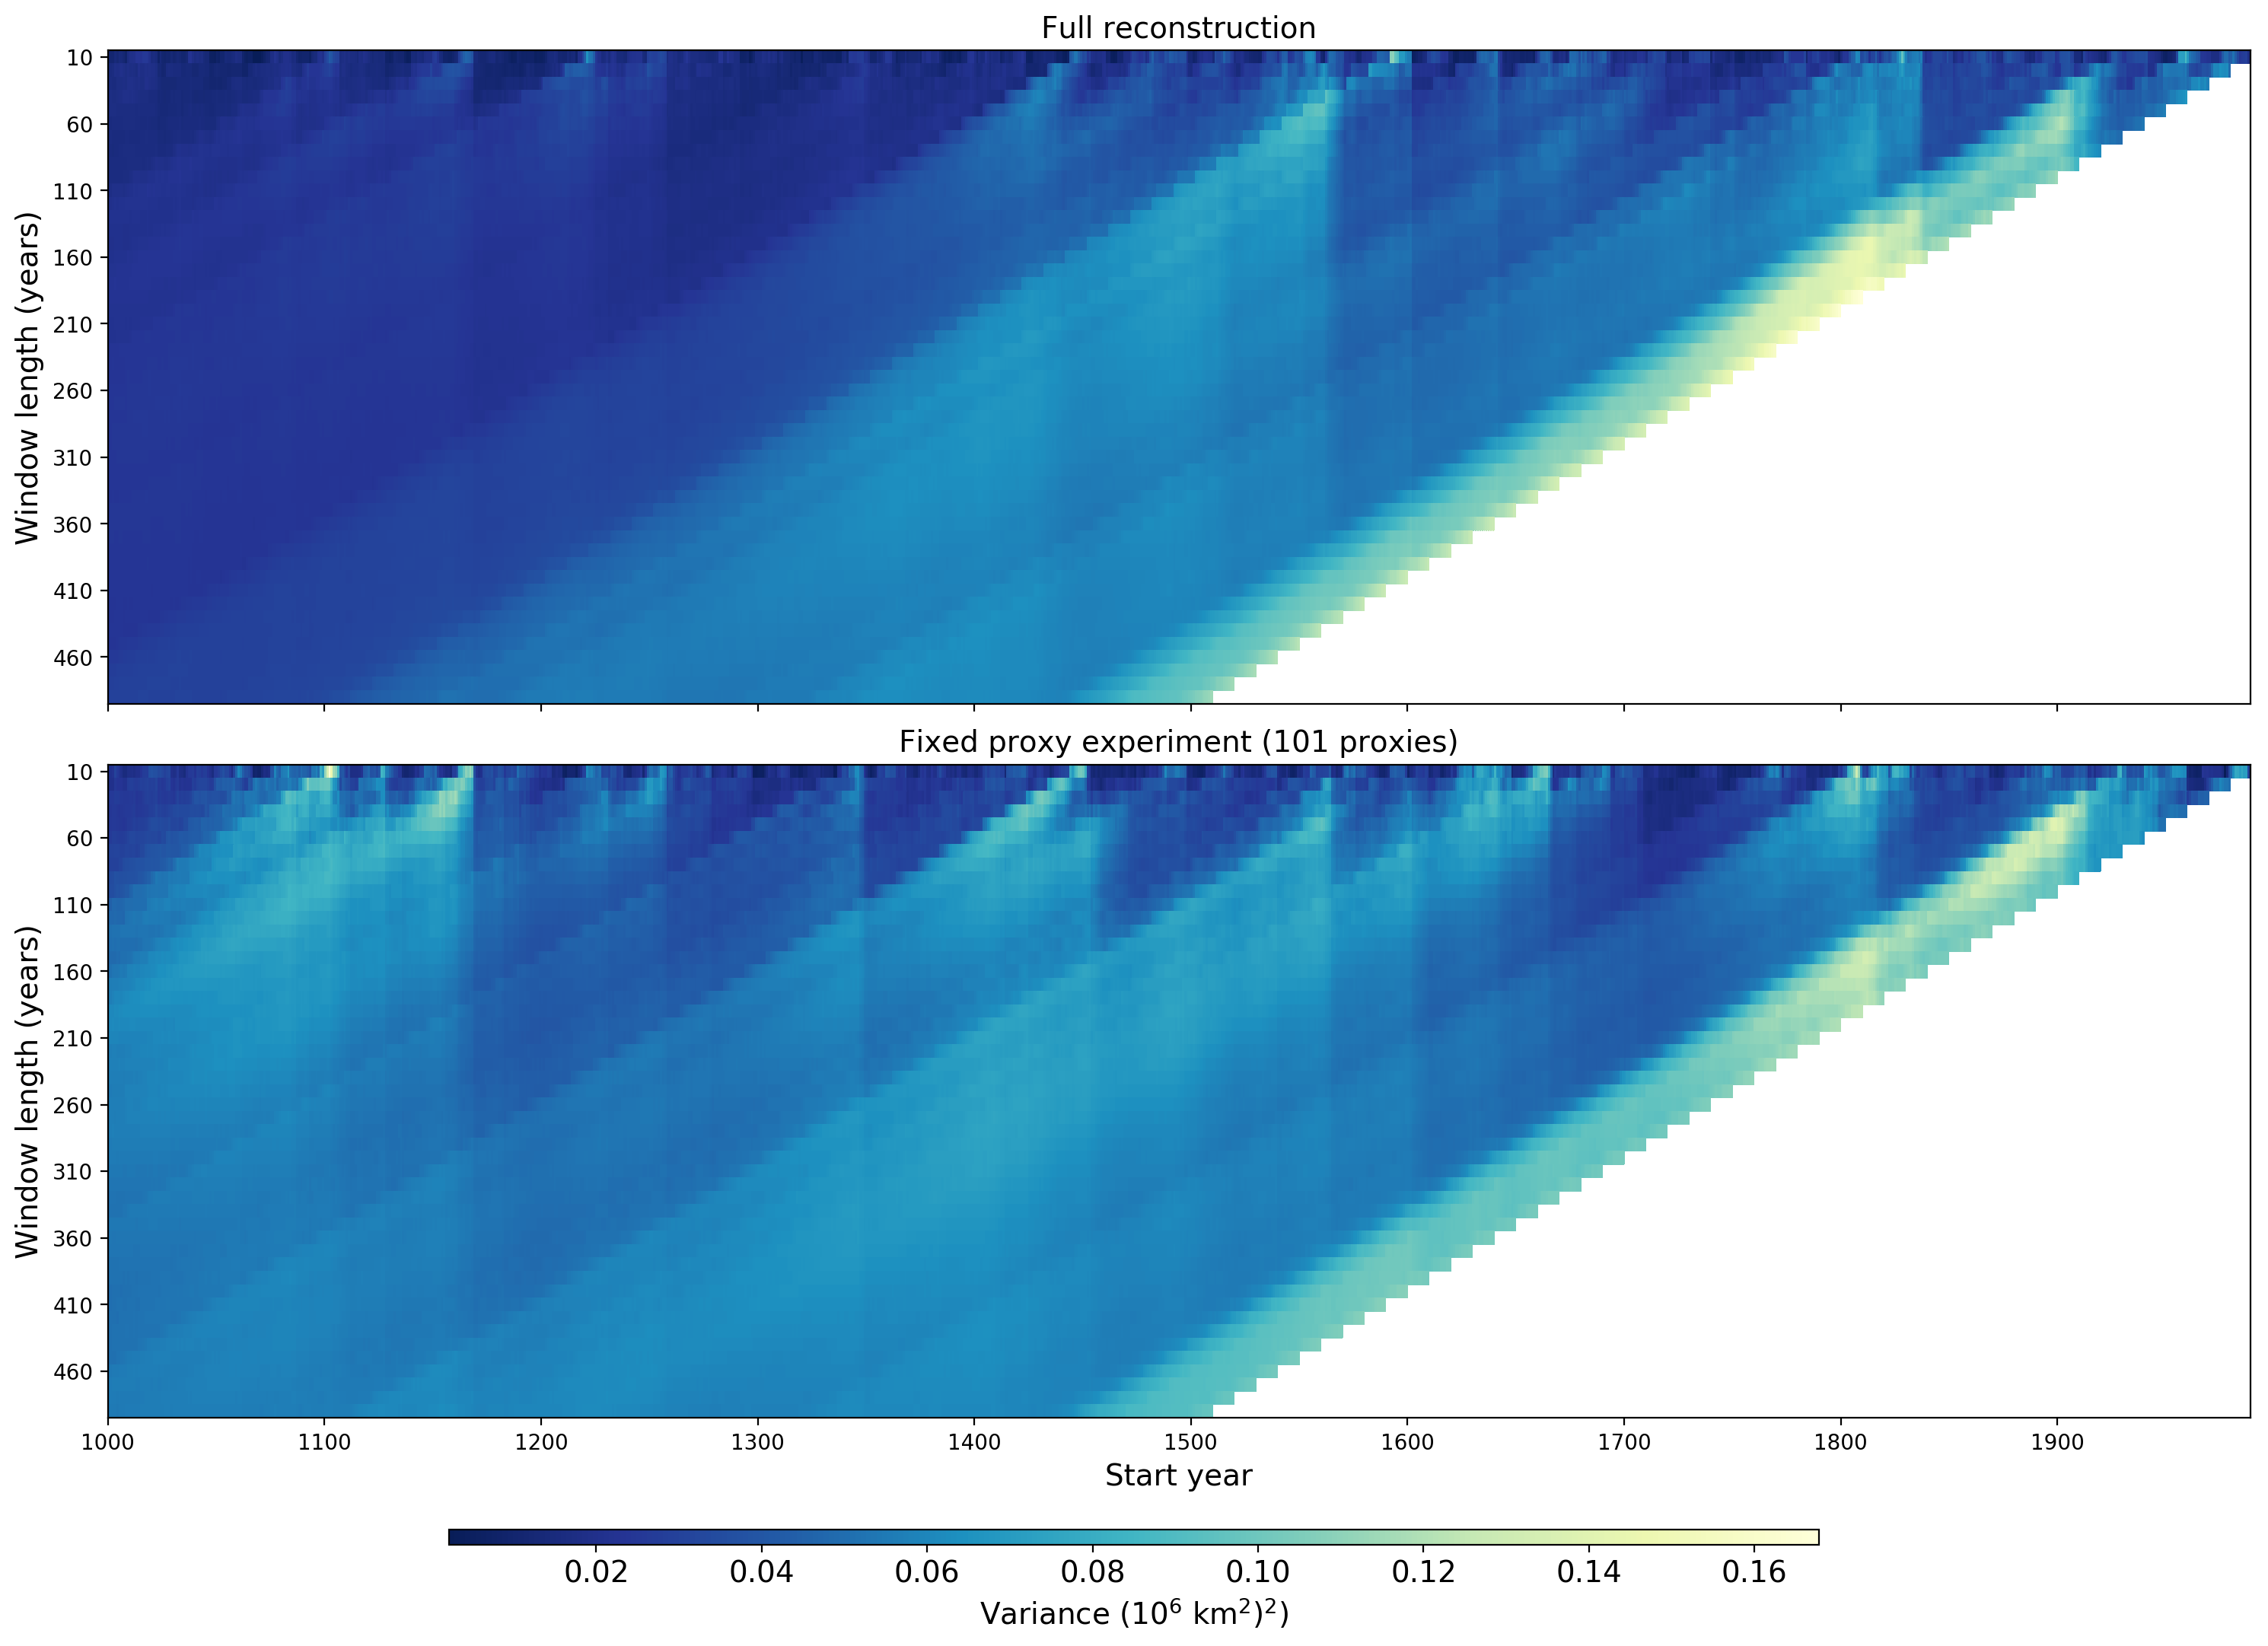

In [107]:
fig, (ax) = plt.subplots(2,1,figsize=(15,10),sharex=True)
ax = ax.flatten()

im = ax[0].pcolormesh(np.arange(var_chunked_full.shape[1]), np.arange(seg_length.shape[0]), 
                      var_chunked_full, cmap='YlGnBu_r')
im2 = ax[1].pcolormesh(np.arange(var_chunked_f1000.shape[1]), np.arange(seg_length.shape[0]), 
                       var_chunked_f1000, cmap='YlGnBu_r')

ax[1].set_yticks(np.arange(0.5,seg_length.shape[0],5))
ax[0].set_yticks(np.arange(0.5,seg_length.shape[0],5))
ax[1].set_yticklabels(np.arange(10,500,50))
ax[0].set_yticklabels(np.arange(10,500,50))

ax[1].set_xticks(np.arange(0,var_chunked_full.shape[1],100))
ax[0].set_xticks(np.arange(0,var_chunked_full.shape[1],100))
ax[1].set_xticklabels(np.arange(start_year,end_year-10,100))
ax[0].set_xticklabels(np.arange(start_year,end_year-10,100))

ax[1].invert_yaxis()
ax[0].invert_yaxis()

ax[1].set_xlabel('Start year',fontsize=14)
ax[0].set_ylabel('Window length (years)',fontsize=14)
ax[1].set_ylabel('Window length (years)',fontsize=14)
#plt.ylim(0,5)

ax[1].set_title('Fixed proxy experiment (101 proxies)',fontsize=14)
ax[0].set_title('Full reconstruction',fontsize=14)

position=fig.add_axes([0.2,-0.02,0.6,0.01])
cb = plt.colorbar(im, cax=position, orientation='horizontal') #, fraction=0.05, pad=0.5)
cb.ax.tick_params(labelsize=14)
cb.set_label('Variance (10$^6$ km$^2$)$^2$)', fontsize=14)

plt.tight_layout()

In [83]:
seg_length = np.arange(10,501,10)
start_year = 1000
end_year = 2000

var_chunked_full = np.ones((seg_length.shape[0],end_year-start_year-10))*np.nan
#var_chunked_full = np.ones((seg_length.shape[0],99))*np.nan

for ln,sln in enumerate(seg_length):
    for s,seg in enumerate(np.arange(start_year,end_year-sln,1)):
#         print(s)
        ind = np.where((np.array(recon_years_ccsm4)>=seg)&(np.array(recon_years_ccsm4)<=seg+sln-1))
        hold = np.var(sie_ensmn_anom_allit_ccsm4[ind])

        var_chunked_full[ln,s] = hold

No handles with labels found to put in legend.


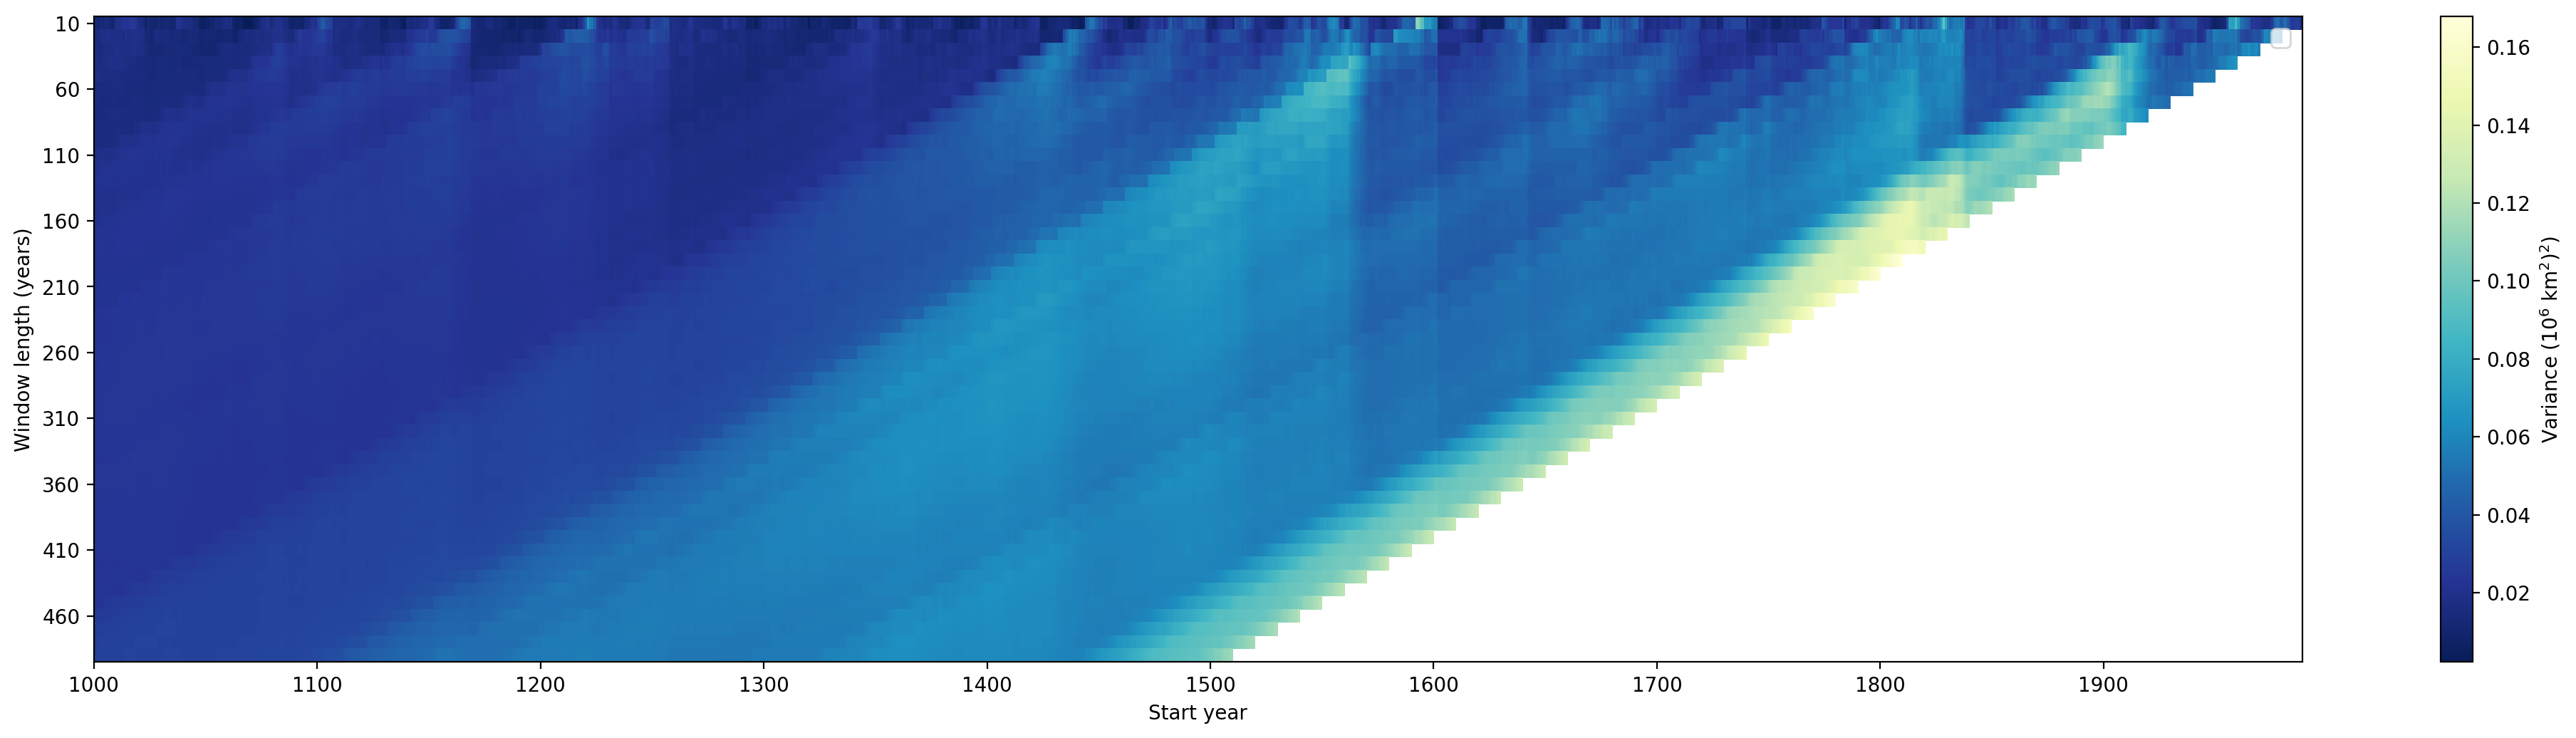

In [84]:
plt.figure(figsize=(25,6))

# plt.pcolormesh(np.arange(start_year,end_year-10,1), np.arange(seg_length.shape[0]), 
#                var_chunked_full, cmap='GnBu_r')
plt.pcolormesh(np.arange(var_chunked_full.shape[1]), np.arange(seg_length.shape[0]), 
               var_chunked_full, cmap='YlGnBu_r')

plt.yticks(np.arange(0.5,seg_length.shape[0],5),np.arange(10,500,50))
plt.xticks(np.arange(0,var_chunked_full.shape[1],100),np.arange(start_year,end_year-10,100))
plt.gca().invert_yaxis()

plt.xlabel('Start year')
plt.ylabel('Window length (years)')
#plt.ylim(0,5)

plt.legend(fontsize=12)
plt.colorbar(label = 'Variance (10$^6$ km$^2$)$^2$)')

## Calculate trends: generalized for x-years

In [14]:
def plot_hist_pre_post_sat(pre_industrial_trends, post_industrial_trends, sat_trends, 
                           percentile_low, percentile_high, start_year, binwidth, ax_hist,
                           strends=False): 
    hist_kwargs = dict(histtype='step',linewidth=1.5)

    ax_hist.axvspan(np.percentile(pre_industrial_trends,percentile_low),
                    np.percentile(pre_industrial_trends,percentile_high),
                    color='royalblue',alpha=0.2,edgecolor=None)

    # ax_hist.axvline(np.nanmean(post_industrial_trends),linestyle='--',color='navy')

    ax_hist.hist(pre_industrial_trends,facecolor='royalblue',edgecolor='royalblue',
                 fill=True,density=True,alpha=0.6,label='Reconstructed \ntrends ('+str(start_year)+'-1850)',
                 bins=np.arange(min(pre_industrial_trends),max(pre_industrial_trends) + binwidth, binwidth),
                 histtype='step',linewidth=1)
    ax_hist.hist(post_industrial_trends,edgecolor='navy',density=True,
                 alpha=0.9,label='Reconstructed \ntrends (1850-1979)',
                 bins=np.arange(min(post_industrial_trends),max(post_industrial_trends) + binwidth, binwidth),
                 **hist_kwargs)
    ax_hist.hist(sat_trends,edgecolor='c',density=True,
                 facecolor='c',alpha=0.9,label='Reconstructed \ntrends(1979-2000)',
                 bins=np.arange(min(sat_trends),max(sat_trends) + binwidth, binwidth),
                 **hist_kwargs)

    if strends is True: 
        ax_hist.axvline(np.mean(sat_trends),linestyle='--',color='c')

    return 

In [15]:
def calc_all_trends(length, start_time, end_time, timeseries, timeseries_time): 
    """
    inputs:
    -------------
    length = integer value
    start_time = integer, start year
    end_time = integer, end year
    timeseries = 2D array (time, nens)
    timeseries_time = array, years (time)
    """
    start_range = np.arange(start_time,end_time-length,1)
    end_range = np.arange(start_time+length,end_time,1)
    
    slope_all_recon = []

    for it in range(timeseries.shape[1]):
        hold = np.zeros((len(start_range)))
        if np.remainder(it,100) == 0:  
            print(str(it)+' of '+str(timeseries.shape[1]))
            
        for t in range(len(start_range)):
            hold[t] = rrutils.find_trend(timeseries[:,it],timeseries_time,
                                         start_range[t],end_range[t])
        slope_all_recon.append(hold)
        
    slope_all_endpts = np.array(slope_all_recon).flatten()   
    
    return slope_all_endpts
    

### 30-year trends: 

In [16]:
length = 30 

sat_range_start = np.arange(1979,2017-length,1)
sat_range_end = np.arange(1979+length,2017,1)

sat30_slope_all_endpts = np.zeros(len(sat_range_start))

for t,time in enumerate(sat_range_start):
    sat30_slope_all_endpts[t] = rrutils.find_trend(fet_sie_anom,fet_time,
                                                 sat_range_start[t],sat_range_end[t])
    
sat30_slope_79_00 = rrutils.find_trend(fet_sie_anom,fet_time,1979,2000)

In [17]:
pre30_slope_all_endpts_ccsm4 = calc_all_trends(30,1000,1850,sie_ens_allit_ccsm4_2d,
                                               np.array(recon_years_ccsm4))

0 of 2000
100 of 2000
200 of 2000
300 of 2000
400 of 2000
500 of 2000
600 of 2000
700 of 2000
800 of 2000
900 of 2000
1000 of 2000
1100 of 2000
1200 of 2000
1300 of 2000
1400 of 2000
1500 of 2000
1600 of 2000
1700 of 2000
1800 of 2000
1900 of 2000


In [18]:
post30_slope_all_endpts_ccsm4 = calc_all_trends(30,1850,1979,sie_ens_allit_ccsm4_2d,
                                               np.array(recon_years_ccsm4))

0 of 2000
100 of 2000
200 of 2000
300 of 2000
400 of 2000
500 of 2000
600 of 2000
700 of 2000
800 of 2000
900 of 2000
1000 of 2000
1100 of 2000
1200 of 2000
1300 of 2000
1400 of 2000
1500 of 2000
1600 of 2000
1700 of 2000
1800 of 2000
1900 of 2000


In [19]:
etcw30_slope_all_endpts_ccsm4 = calc_all_trends(30,1900,1945,sie_ens_allit_ccsm4_2d,
                                               np.array(recon_years_ccsm4))

0 of 2000
100 of 2000
200 of 2000
300 of 2000
400 of 2000
500 of 2000
600 of 2000
700 of 2000
800 of 2000
900 of 2000
1000 of 2000
1100 of 2000
1200 of 2000
1300 of 2000
1400 of 2000
1500 of 2000
1600 of 2000
1700 of 2000
1800 of 2000
1900 of 2000


In [70]:
# title1 = '20 year trends'
# title1 = '30 year trends'
# binwidth=0.002

# fig, (ax_hist) = plt.subplots(1,1,figsize=(6,10))

# plot_hist_pre_post_sat(pre30_slope_all_endpts_ccsm4, post30_slope_all_endpts_ccsm4, 
#                        np.zeros(30), 2.5, 97.5, 1000, binwidth, ax_hist, strends=False)

### 20-year trends: 

In [20]:
length = 20 

sat_range_start = np.arange(1979,2017-length,1)
sat_range_end = np.arange(1979+length,2017,1)

sat20_slope_all_endpts = np.zeros(len(sat_range_start))

for t,time in enumerate(sat_range_start):
    sat20_slope_all_endpts[t] = rrutils.find_trend(fet_sie_anom,fet_time,
                                                   sat_range_start[t],sat_range_end[t])
    
sat20_slope_79_00 = rrutils.find_trend(fet_sie_anom,fet_time,1979,2000)

In [21]:
pre20_slope_all_endpts_ccsm4 = calc_all_trends(20,1000,1850,sie_ens_allit_ccsm4_2d,
                                               np.array(recon_years_ccsm4))

0 of 2000
100 of 2000
200 of 2000
300 of 2000
400 of 2000
500 of 2000
600 of 2000
700 of 2000
800 of 2000
900 of 2000
1000 of 2000
1100 of 2000
1200 of 2000
1300 of 2000
1400 of 2000
1500 of 2000
1600 of 2000
1700 of 2000
1800 of 2000
1900 of 2000


In [22]:
post20_slope_all_endpts_ccsm4 = calc_all_trends(20,1850,1979,sie_ens_allit_ccsm4_2d,
                                               np.array(recon_years_ccsm4))

0 of 2000
100 of 2000
200 of 2000
300 of 2000
400 of 2000
500 of 2000
600 of 2000
700 of 2000
800 of 2000
900 of 2000
1000 of 2000
1100 of 2000
1200 of 2000
1300 of 2000
1400 of 2000
1500 of 2000
1600 of 2000
1700 of 2000
1800 of 2000
1900 of 2000


In [23]:
etcw20_slope_all_endpts_ccsm4 = calc_all_trends(20,1900,1945,sie_ens_allit_ccsm4_2d,
                                               np.array(recon_years_ccsm4))

0 of 2000
100 of 2000
200 of 2000
300 of 2000
400 of 2000
500 of 2000
600 of 2000
700 of 2000
800 of 2000
900 of 2000
1000 of 2000
1100 of 2000
1200 of 2000
1300 of 2000
1400 of 2000
1500 of 2000
1600 of 2000
1700 of 2000
1800 of 2000
1900 of 2000


In [24]:
sat20_slope_recon_ccsm4 = np.zeros((sie_ens_allit_ccsm4_2d.shape[1]))

for it in range(2000):
    sat20_slope_recon_ccsm4[it] = rrutils.find_trend(sie_ens_allit_ccsm4_2d[:,it],
                                                     np.array(recon_years_ccsm4),1979,2000)

### Plot:

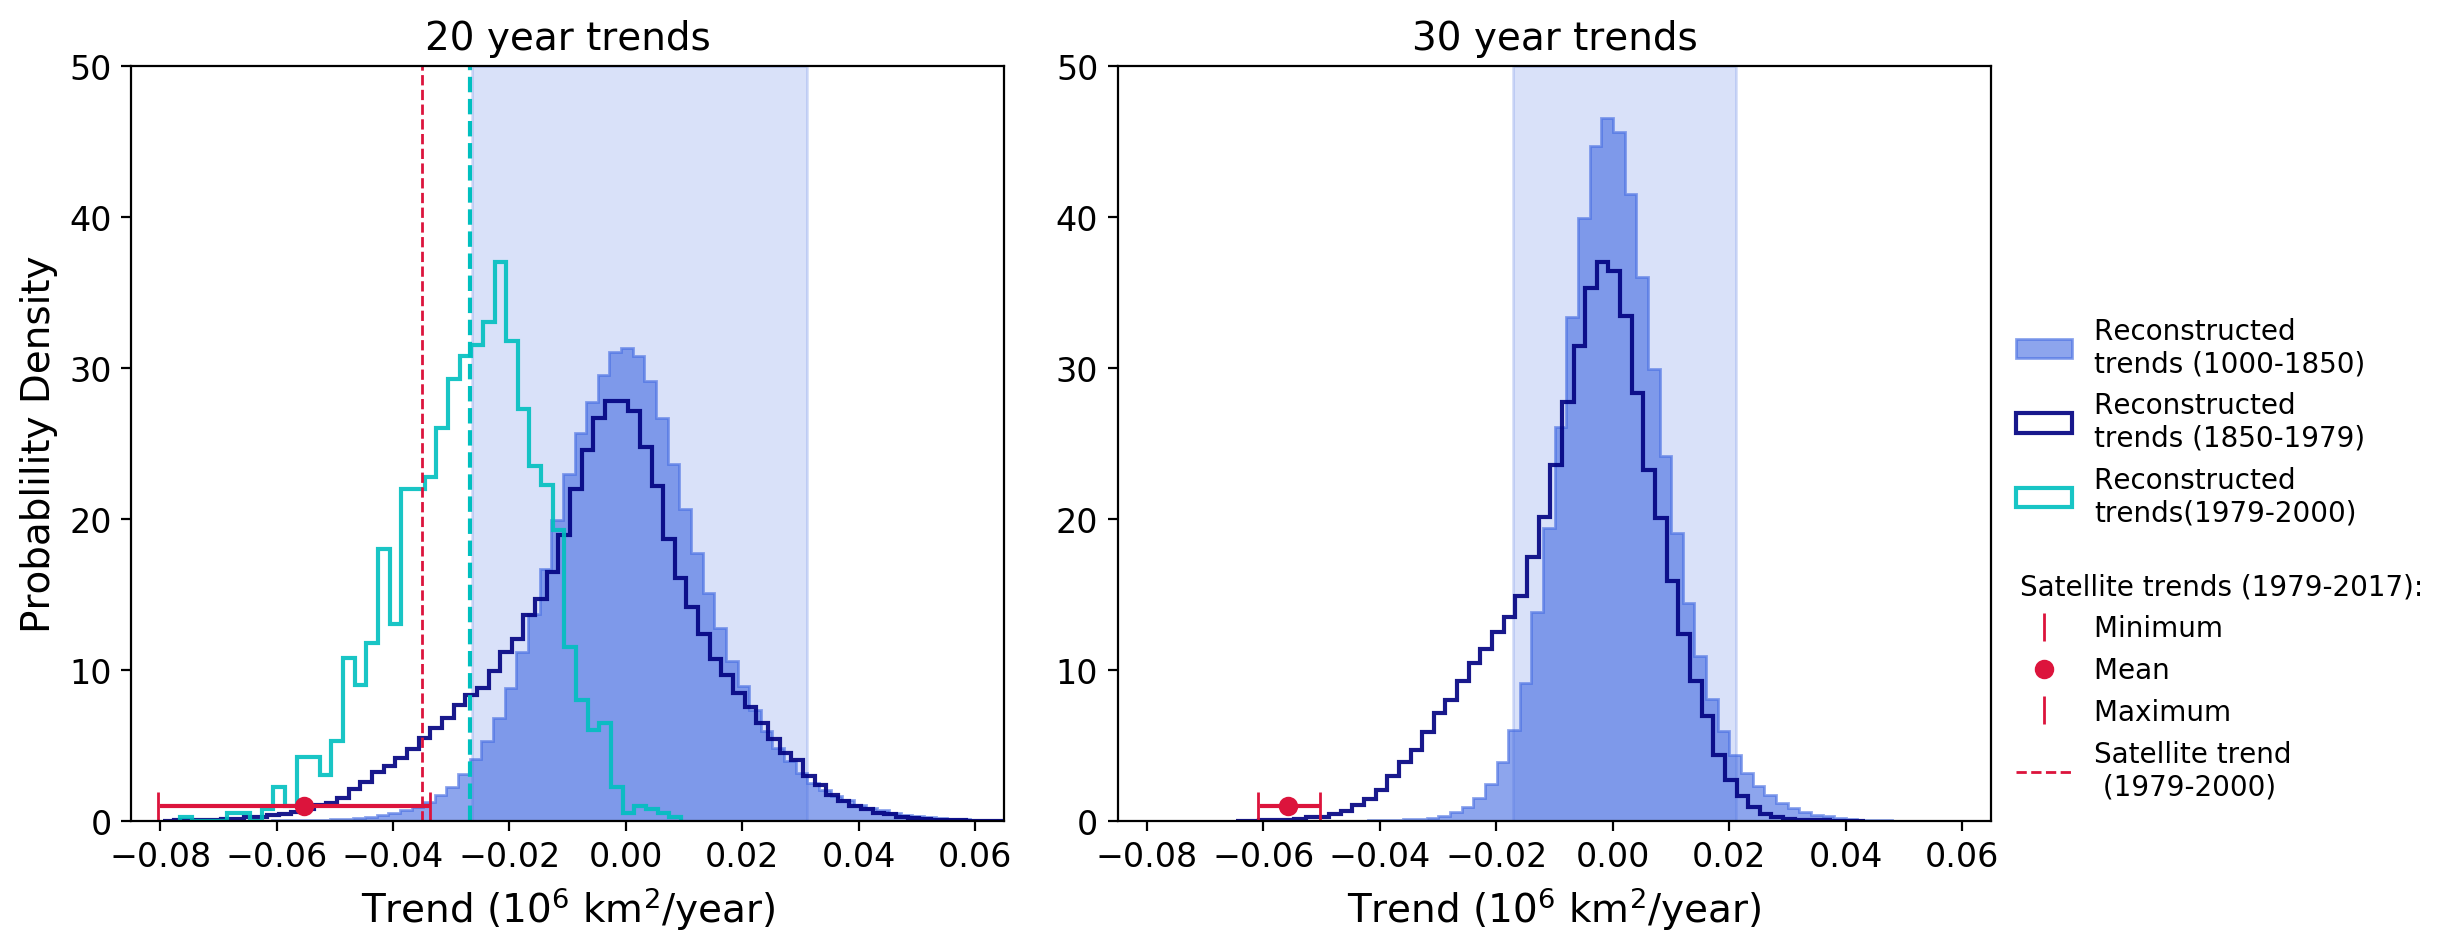

In [27]:
title1 = '20 year trends'
title2 = '30 year trends'
binwidth=0.002

fig, (ax_hist) = plt.subplots(1,2,figsize=(12,5))
ax_hist = ax_hist.flatten()

plot_hist_pre_post_sat(pre20_slope_all_endpts_ccsm4, post20_slope_all_endpts_ccsm4, 
                       sat20_slope_recon_ccsm4,2.5, 97.5, 1000, binwidth, ax_hist[0],strends=True)
plot_hist_pre_post_sat(pre30_slope_all_endpts_ccsm4, post30_slope_all_endpts_ccsm4, 
                       np.zeros(30), 2.5, 97.5, 1000, binwidth, ax_hist[1],strends=False)

ax_hist[0].plot(sat20_slope_all_endpts.mean(),30,marker=',',color='white',
                linestyle='None',label='  \n  ')
ax_hist[0].axvline(sat20_slope_79_00,color='crimson',linewidth=1,
                label='Satellite trend \n (1979-2000)',linestyle='--')
ax_hist[0].plot(sat20_slope_all_endpts.mean(),1,marker='o',color='crimson',
                linestyle='None',label='Mean ')
ax_hist[0].axhline(y=1,xmin=0.035,xmax=0.34,color='crimson',linewidth=1.5)
ax_hist[0].plot(sat20_slope_all_endpts.min(),1,marker='|', color='crimson',
             markersize=10,linestyle='None',linewidth=2, 
             label='Minimum ')
ax_hist[0].plot(sat20_slope_all_endpts.max(),1,marker='|', color='crimson',
             markersize=10,linestyle='None',linewidth=2, 
             label='Maximum ')

ax_hist[1].plot(sat30_slope_all_endpts.mean(),1,marker='o',color='crimson',
                linestyle='None',label='Satellite trend \n (1979-2000)')
ax_hist[1].axhline(y=1,xmin=0.165,xmax=0.23,color='crimson',linewidth=1.5)
ax_hist[1].plot(sat30_slope_all_endpts.min(),1,marker='|', color='crimson',
             markersize=10,linestyle='None',linewidth=3, 
             label='Minimum trend \nin satellite record \n (1992-2012)')
ax_hist[1].plot(sat30_slope_all_endpts.max(),1,marker='|', color='crimson',
             markersize=10,linestyle='None',linewidth=3, 
             label='Max trend \nin satellite record \n (1992-2012)')

ax_hist[0].set_ylabel('Probablility Density',fontsize=14)
ax_hist[0].set_xlabel('Trend (10$^6$ km$^2$/year)', fontsize=14)
ax_hist[0].set_xlim(-0.085,0.065)
ax_hist[0].set_ylim(0,50)
ax_hist[0].set_title(title1, fontsize=14)

#ax_hist[1].set_ylabel('Probablility Density',fontsize=14)
ax_hist[1].set_xlabel('Trend (10$^6$ km$^2$/year)', fontsize=14)
ax_hist[1].set_xlim(-0.085,0.065)
ax_hist[1].set_ylim(0,50)
ax_hist[1].set_title(title2, fontsize=14)

ax_hist[0].tick_params(axis='both', which='major', labelsize=12)
ax_hist[1].tick_params(axis='both', which='major', labelsize=12)

handles,labels = ax_hist[0].get_legend_handles_labels()
labels = [labels[5], labels[6], labels[7], labels[0], labels[3], labels[2], labels[4], labels[1]]
handles = [handles[5], handles[6], handles[7], handles[0], handles[3], handles[2], handles[4], handles[1]]

plt.legend(handles,labels, bbox_to_anchor=(1.0, 0.7), frameon=False)

plt.text(0.07, 15,'Satellite trends (1979-2017):')

plt.subplots_adjust(wspace=0.13, hspace=0.0)

savedir = ('/home/disk/p/mkb22/Documents/si_analysis_kb/common_era_experiments/'+
           'analysis/figures/Brennan_Hakim_2020/')
savename = '20_30_year_trends_ccsm4.png'
#plt.savefig(savedir+savename, bbox_inches='tight')

In [123]:
sat20_slope_recon_ccsm4.mean(), np.percentile(pre20_slope_all_endpts_ccsm4,2.5)

(-0.026794122553270985, -0.026388889519487525)

In [ ]:
title1 = '20 year trends'
title1 = '30 year trends'
binwidth=0.002

fig, (ax_hist) = plt.subplots(2,1,figsize=(6,10))
ax_hist = ax_hist.flatten()

plot_hist_pre_post_sat(slope_all_endpts_full_ccsm4, slope_all_endpts_post_ccsm4, 
                       slope_sat_recon_ccsm4,2.5, 97.5, 1000, binwidth, ax_hist[0])
plot_hist_pre_post_sat(pre30_slope_all_endpts_ccsm4, post30_slope_all_endpts_ccsm4, 
                       np.zeros(30), 2.5, 97.5, 1000, binwidth, ax_hist[1])

ax_hist[0].axvline(sat_slope_79_00,color='crimson',linewidth=2, 
                label='Satellite trend \n (1979-2000)')
ax_hist[0].plot(sat_slope_all_endpts.min(),1,marker='X', color='crimson',
             markersize=10,linestyle='None', 
             label='Minimum trend \nin satellite record \n (1992-2012)')

ax_hist[0].set_ylabel('Probablility Density',fontsize=14)
ax_hist[0].set_xlabel('Trend (10$^6$ km$^2$/year)', fontsize=14)
ax_hist[0].set_xlim(-0.085,0.08)
ax_hist[0].set_ylim(0,40)
ax_hist[0].set_title(title1, fontsize=14)

ax_hist[1].set_ylabel('Probablility Density',fontsize=14)
ax_hist[1].set_xlabel('Trend (10$^6$ km$^2$/year)', fontsize=14)
ax_hist[1].set_xlim(-0.085,0.08)
ax_hist[1].set_ylim(0,40)
ax_hist[1].set_title(title2, fontsize=14)

ax_hist[0].tick_params(axis='both', which='major', labelsize=12)
ax_hist[1].tick_params(axis='both', which='major', labelsize=12)

handles,labels = ax_hist.get_legend_handles_labels()
labels = [labels[2], labels[3], labels[4], labels[0], labels[1]]
handles = [handles[2], handles[3], handles[4], handles[0], handles[1]]

plt.legend(handles,labels, bbox_to_anchor=(1.0, 0.57), frameon=False)

plt.subplots_adjust(wspace=0, hspace=0.015)

savedir = ('/home/disk/p/mkb22/Documents/si_analysis_kb/common_era_experiments/'+
           'analysis/figures/Brennan_Hakim_2020/')
savename = '20_30_year_trends_ccsm4.png'
#plt.savefig(savedir+savename, bbox_inches='tight')

## At what chunk length do distributions deviate?

In [28]:
window_pre = np.arange(10,40,1)

pre_slope_mean = np.zeros(window_pre.shape[0])
pre_slope_max = np.zeros(window_pre.shape[0])
pre_slope_min = np.zeros(window_pre.shape[0])
pre_slope_p95 = np.zeros(window_pre.shape[0])
pre_slope_p5 = np.zeros(window_pre.shape[0])
pre_slope_p97_5 = np.zeros(window_pre.shape[0])
pre_slope_p2_5 = np.zeros(window_pre.shape[0])

for w,win in enumerate(window_pre): 
    print(str(w)+', '+str(win))
    # Pre-industrial 
    pre_slope_all_endpts_ccsm4 = calc_all_trends(win,1000,1850,sie_ens_allit_ccsm4_2d,
                                                 np.array(recon_years_ccsm4))

    pre_slope_mean[w] = np.nanmean(pre_slope_all_endpts_ccsm4)
    pre_slope_max[w] = pre_slope_all_endpts_ccsm4.max()
    pre_slope_min[w] = pre_slope_all_endpts_ccsm4.min()
    pre_slope_p95[w] = np.percentile(pre_slope_all_endpts_ccsm4,95)
    pre_slope_p97_5[w] = np.percentile(pre_slope_all_endpts_ccsm4,97.5)
    pre_slope_p2_5[w] = np.percentile(pre_slope_all_endpts_ccsm4,2.5)
    pre_slope_p5[w] = np.percentile(pre_slope_all_endpts_ccsm4,5)

0, 10
0 of 2000
100 of 2000
200 of 2000
300 of 2000
400 of 2000
500 of 2000
600 of 2000
700 of 2000
800 of 2000
900 of 2000
1000 of 2000
1100 of 2000
1200 of 2000
1300 of 2000
1400 of 2000
1500 of 2000
1600 of 2000
1700 of 2000
1800 of 2000
1900 of 2000
1, 11
0 of 2000
100 of 2000
200 of 2000
300 of 2000
400 of 2000
500 of 2000
600 of 2000
700 of 2000
800 of 2000
900 of 2000
1000 of 2000
1100 of 2000
1200 of 2000
1300 of 2000
1400 of 2000
1500 of 2000
1600 of 2000
1700 of 2000
1800 of 2000
1900 of 2000
2, 12
0 of 2000
100 of 2000
200 of 2000
300 of 2000
400 of 2000
500 of 2000
600 of 2000
700 of 2000
800 of 2000
900 of 2000
1000 of 2000
1100 of 2000
1200 of 2000
1300 of 2000
1400 of 2000
1500 of 2000
1600 of 2000
1700 of 2000
1800 of 2000
1900 of 2000
3, 13
0 of 2000
100 of 2000
200 of 2000
300 of 2000
400 of 2000
500 of 2000
600 of 2000
700 of 2000
800 of 2000
900 of 2000
1000 of 2000
1100 of 2000
1200 of 2000
1300 of 2000
1400 of 2000
1500 of 2000
1600 of 2000
1700 of 2000
1800 of 20

In [29]:
window_post = np.arange(10,40,1)

post_slope_mean = np.zeros(window_post.shape[0])
post_slope_max = np.zeros(window_post.shape[0])
post_slope_min = np.zeros(window_post.shape[0])
post_slope_p95 = np.zeros(window_post.shape[0])
post_slope_p5 = np.zeros(window_post.shape[0])
post_slope_p97_5 = np.zeros(window_post.shape[0])
post_slope_p2_5 = np.zeros(window_post.shape[0])

for w,win in enumerate(window_post):    
    print(str(w)+', '+str(win))
    # Post-industrial range: 
    post_slope_all_endpts_ccsm4 = calc_all_trends(win,1850,1979,sie_ens_allit_ccsm4_2d,
                                                  np.array(recon_years_ccsm4))

    post_slope_mean[w] = np.nanmean(post_slope_all_endpts_ccsm4)
    post_slope_max[w] = post_slope_all_endpts_ccsm4.max()
    post_slope_min[w] = post_slope_all_endpts_ccsm4.min()
    post_slope_p95[w] = np.percentile(post_slope_all_endpts_ccsm4,95)
    post_slope_p97_5[w] = np.percentile(post_slope_all_endpts_ccsm4,97.5)
    post_slope_p2_5[w] = np.percentile(post_slope_all_endpts_ccsm4,2.5)
    post_slope_p5[w] = np.percentile(post_slope_all_endpts_ccsm4,5)

0, 10
0 of 2000
100 of 2000
200 of 2000
300 of 2000
400 of 2000
500 of 2000
600 of 2000
700 of 2000
800 of 2000
900 of 2000
1000 of 2000
1100 of 2000
1200 of 2000
1300 of 2000
1400 of 2000
1500 of 2000
1600 of 2000
1700 of 2000
1800 of 2000
1900 of 2000
1, 11
0 of 2000
100 of 2000
200 of 2000
300 of 2000
400 of 2000
500 of 2000
600 of 2000
700 of 2000
800 of 2000
900 of 2000
1000 of 2000
1100 of 2000
1200 of 2000
1300 of 2000
1400 of 2000
1500 of 2000
1600 of 2000
1700 of 2000
1800 of 2000
1900 of 2000
2, 12
0 of 2000
100 of 2000
200 of 2000
300 of 2000
400 of 2000
500 of 2000
600 of 2000
700 of 2000
800 of 2000
900 of 2000
1000 of 2000
1100 of 2000
1200 of 2000
1300 of 2000
1400 of 2000
1500 of 2000
1600 of 2000
1700 of 2000
1800 of 2000
1900 of 2000
3, 13
0 of 2000
100 of 2000
200 of 2000
300 of 2000
400 of 2000
500 of 2000
600 of 2000
700 of 2000
800 of 2000
900 of 2000
1000 of 2000
1100 of 2000
1200 of 2000
1300 of 2000
1400 of 2000
1500 of 2000
1600 of 2000
1700 of 2000
1800 of 20

In [30]:
window_sat_recon = np.arange(10,21,1)

sat_recon_slope_mean = np.zeros(window_sat_recon.shape[0])
sat_recon_slope_max = np.zeros(window_sat_recon.shape[0])
sat_recon_slope_min = np.zeros(window_sat_recon.shape[0])
sat_recon_slope_p95 = np.zeros(window_sat_recon.shape[0])
sat_recon_slope_p5 = np.zeros(window_sat_recon.shape[0])
sat_recon_slope_p97_5 = np.zeros(window_sat_recon.shape[0])
sat_recon_slope_p2_5 = np.zeros(window_sat_recon.shape[0])

#slope_sat_recon_ccsm4 = np.zeros((window_sat_recon.shape[0],2000))

for w,win in enumerate(window_sat_recon):
    print(str(w)+', '+str(win))
    slope_sat_recon_ccsm4 = calc_all_trends(win,1979,2000,sie_ens_allit_ccsm4_2d,
                                                 np.array(recon_years_ccsm4))

    sat_recon_slope_mean[w] = np.nanmean(slope_sat_recon_ccsm4)
    sat_recon_slope_max[w] = slope_sat_recon_ccsm4.max()
    sat_recon_slope_min[w] = slope_sat_recon_ccsm4.min()
    sat_recon_slope_p95[w] = np.percentile(slope_sat_recon_ccsm4,95)
    sat_recon_slope_p5[w] = np.percentile(slope_sat_recon_ccsm4,5)
    sat_recon_slope_p97_5[w] = np.percentile(slope_sat_recon_ccsm4,97.5)
    sat_recon_slope_p2_5[w] = np.percentile(slope_sat_recon_ccsm4,2.5)

0, 10
0 of 2000
100 of 2000
200 of 2000
300 of 2000
400 of 2000
500 of 2000
600 of 2000
700 of 2000
800 of 2000
900 of 2000
1000 of 2000
1100 of 2000
1200 of 2000
1300 of 2000
1400 of 2000
1500 of 2000
1600 of 2000
1700 of 2000
1800 of 2000
1900 of 2000
1, 11
0 of 2000
100 of 2000
200 of 2000
300 of 2000
400 of 2000
500 of 2000
600 of 2000
700 of 2000
800 of 2000
900 of 2000
1000 of 2000
1100 of 2000
1200 of 2000
1300 of 2000
1400 of 2000
1500 of 2000
1600 of 2000
1700 of 2000
1800 of 2000
1900 of 2000
2, 12
0 of 2000
100 of 2000
200 of 2000
300 of 2000
400 of 2000
500 of 2000
600 of 2000
700 of 2000
800 of 2000
900 of 2000
1000 of 2000
1100 of 2000
1200 of 2000
1300 of 2000
1400 of 2000
1500 of 2000
1600 of 2000
1700 of 2000
1800 of 2000
1900 of 2000
3, 13
0 of 2000
100 of 2000
200 of 2000
300 of 2000
400 of 2000
500 of 2000
600 of 2000
700 of 2000
800 of 2000
900 of 2000
1000 of 2000
1100 of 2000
1200 of 2000
1300 of 2000
1400 of 2000
1500 of 2000
1600 of 2000
1700 of 2000
1800 of 20

In [31]:
window = np.arange(10,38,1)

sat_slope_mean = np.zeros(window.shape[0])
sat_slope_max = np.zeros(window.shape[0])
sat_slope_min = np.zeros(window.shape[0])
sat_slope_p95 = np.zeros(window.shape[0])
sat_slope_p5 = np.zeros(window.shape[0])
sat_slope_p97_5 = np.zeros(window.shape[0])
sat_slope_p2_5 = np.zeros(window.shape[0])

for w,win in enumerate(window): 
    print(str(w)+', '+str(win))
    # Satellite range: 
    sat_range_start = np.arange(1979,2017-win,1)
    sat_range_end = np.arange(1979+win,2017,1)

    # Calc possible trends satellite era: -----------------------------
    sat_slope_all_endpts = np.zeros(len(sat_range_start))

    for t,time in enumerate(sat_range_start):
        sat_slope_all_endpts[t] = rrutils.find_trend(fet_sie_anom,fet_time,
                                                     sat_range_start[t],sat_range_end[t])

    sat_slope_mean[w] = np.nanmean(sat_slope_all_endpts)
    sat_slope_max[w] = sat_slope_all_endpts.max()
    sat_slope_min[w] = sat_slope_all_endpts.min()
    sat_slope_p95[w] = np.percentile(sat_slope_all_endpts,95)
    sat_slope_p5[w] = np.percentile(sat_slope_all_endpts,5)
    sat_slope_p97_5[w] = np.percentile(sat_slope_all_endpts,97.5)
    sat_slope_p2_5[w] = np.percentile(sat_slope_all_endpts,2.5)

0, 10
1, 11
2, 12
3, 13
4, 14
5, 15
6, 16
7, 17
8, 18
9, 19
10, 20
11, 21
12, 22
13, 23
14, 24
15, 25
16, 26
17, 27
18, 28
19, 29
20, 30
21, 31
22, 32
23, 33
24, 34
25, 35
26, 36
27, 37


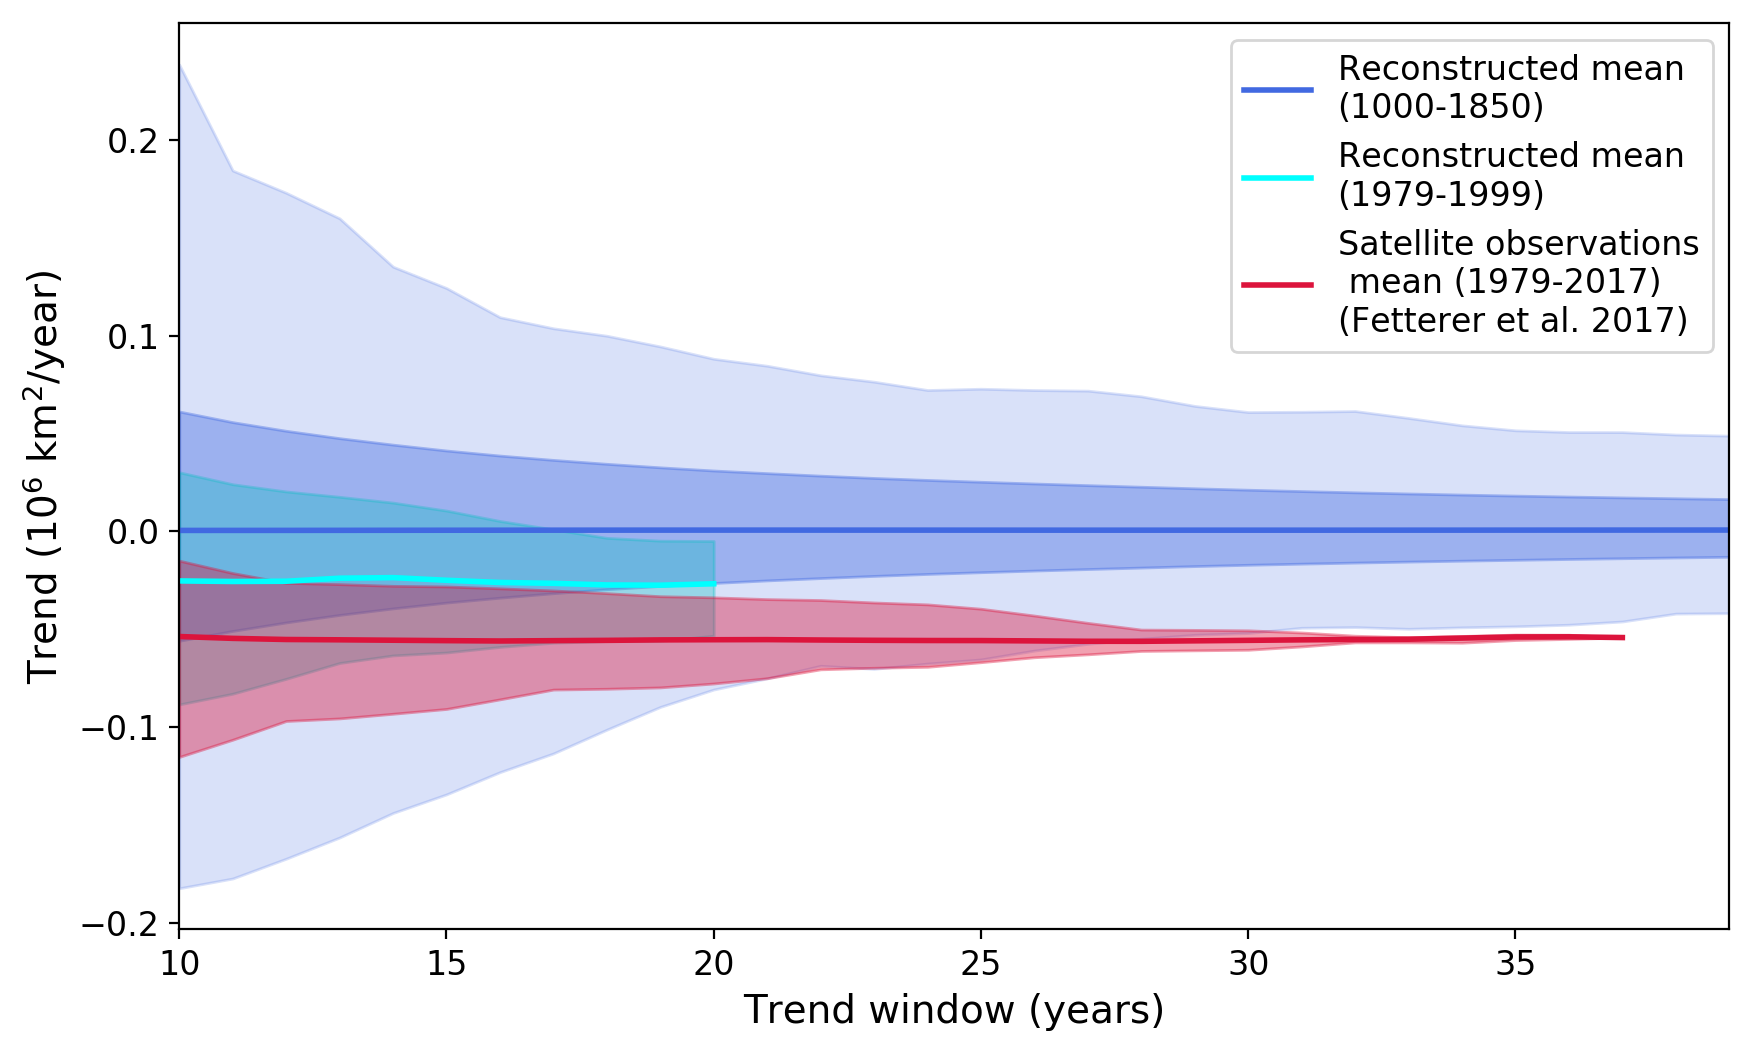

In [38]:
plt.figure(figsize=(10,6))

plt.plot(window_pre, pre_slope_mean,linewidth=2, color='royalblue', 
         label='Reconstructed mean \n(1000-1850)')
# plt.plot(window_post,post_slope_mean,linewidth=2, color='navy', 
#          label='Reconstructed mean \n(1850-1979)')
plt.plot(window_sat_recon, sat_recon_slope_mean,linewidth=2, color='cyan', 
         label='Reconstructed mean \n(1979-1999)')
plt.plot(window, sat_slope_mean,linewidth=2, color='crimson', 
         label='Satellite observations\n mean (1979-2017) \n(Fetterer et al. 2017)')

plt.fill_between(window_pre,pre_slope_min, pre_slope_max, color='royalblue', alpha=0.2)
#plt.fill_between(window_sat_recon,sat_recon_slope_min, sat_recon_slope_max, color='m', alpha=0.2)
#plt.fill_between(window,sat_slope_min, sat_slope_max, color='crimson', alpha=0.2)

plt.fill_between(window_pre,pre_slope_p2_5, pre_slope_p97_5, color='royalblue', 
                 alpha=0.4)#, label='2.5th and 97.5th \npercentiles')
# plt.fill_between(window_post,post_slope_p2_5, post_slope_p97_5, color='navy', 
#                  alpha=0.4)#,label='2.5th and 97.5th \npercentiles')
plt.fill_between(window_sat_recon,sat_recon_slope_p2_5, sat_recon_slope_p97_5,
                 color='c', alpha=0.3)#, label='2.5th and 97.5th \npercentiles')
plt.fill_between(window,sat_slope_p2_5, sat_slope_p97_5, color='crimson', 
                 alpha=0.4)#,label='2.5th and 97.5th \npercentiles')

# plt.plot(window_pre,pre_slope_p5,color='royalblue', linestyle='--', linewidth=1.5)
# plt.plot(window_pre,pre_slope_p95,color='royalblue', linestyle='--', linewidth=1.5)
# plt.plot(window_sat_recon,sat_recon_slope_p5,color='salmon', linestyle='--', linewidth=1.5)
# plt.plot(window_sat_recon,sat_recon_slope_p95,color='salmon', linestyle='--', linewidth=1.5)
# plt.plot(window,sat_slope_p5,color='crimson', linestyle='--', linewidth=1.5)
# plt.plot(window,sat_slope_p95,color='crimson', linestyle='--', linewidth=1.5)

plt.xlabel('Trend window (years)', fontsize=14)
plt.ylabel('Trend (10$^6$ km$^2$/year)', fontsize=14)

plt.legend(fontsize=12)
plt.xticks(np.arange(10,40,5))
plt.tick_params(axis='both', which='major', labelsize=12)
plt.xlim(10, 39)
#plt.ylim(-0.15,0.15)

savedir = ('/home/disk/p/mkb22/Documents/si_analysis_kb/common_era_experiments/'+
           'analysis/figures/Brennan_Hakim_2020/')
savename = 'Window_trends_15_38_pre_sat_ccsm4.png'
#plt.savefig(savedir+savename, bbox_inches='tight')

## Estimating internal variability: 
### Detrended standard deviation: 

In [77]:
pre_ind = (np.array(recon_years_ccsm4)>=1000)&((np.array(recon_years_ccsm4)<1850))
post_ind = (np.array(recon_years_ccsm4)>=1850)&((np.array(recon_years_ccsm4)<2000))
sat_ind = (np.array(recon_years_ccsm4)>=1979)&((np.array(recon_years_ccsm4)<2000))

pre_ind_f1000 = (np.array(recon_years_f1000)>=1000)&((np.array(recon_years_f1000)<1850))
post_ind_f1000 = (np.array(recon_years_f1000)>=1850)&((np.array(recon_years_f1000)<2000))
sat_ind_f1000 = (np.array(recon_years_f1000)>=1979)&((np.array(recon_years_f1000)<2000))

pre_ind_f400 = (np.array(recon_years_f400)>=1600)&((np.array(recon_years_f400)<1850))
post_ind_f400 = (np.array(recon_years_f400)>=1850)&((np.array(recon_years_f400)<2000))
sat_ind_f400 = (np.array(recon_years_f400)>=1979)&((np.array(recon_years_f400)<2000))

pre_sie_allits_ccsm4_2d = sie_ens_allit_ccsm4_2d[pre_ind,:]
post_sie_allits_ccsm4_2d = sie_ens_allit_ccsm4_2d[post_ind,:]
sat_sie_allits_ccsm4_2d = sie_ens_allit_ccsm4_2d[sat_ind,:]

pre_sie_allits_f400_2d = sie_ens_allit_2d_f400[pre_ind_f400,:]
post_sie_allits_f400_2d = sie_ens_allit_2d_f400[post_ind_f400,:]
sat_sie_allits_f400_2d = sie_ens_allit_2d_f400[sat_ind_f400,:]

In [78]:
sat_sie_allits_ccsm4_2d_dt = signal.detrend(sat_sie_allits_ccsm4_2d,axis=0)
pre_sie_allits_ccsm4_2d_dt = signal.detrend(pre_sie_allits_ccsm4_2d,axis=0)
post_sie_allits_ccsm4_2d_dt = signal.detrend(post_sie_allits_ccsm4_2d,axis=0)

sat_sie_allits_f400_2d_dt = signal.detrend(sat_sie_allits_f400_2d,axis=0)
pre_sie_allits_f400_2d_dt = signal.detrend(pre_sie_allits_f400_2d,axis=0)
post_sie_allits_f400_2d_dt = signal.detrend(post_sie_allits_f400_2d,axis=0)

sat_sie_dt = signal.detrend(fet_sie_anom,axis=0)

In [79]:
sat_recon_std_dt = np.mean(np.std(sat_sie_allits_ccsm4_2d_dt,axis=0))
pre_recon_std_dt = np.mean(np.std(pre_sie_allits_ccsm4_2d_dt,axis=0))
post_recon_std_dt = np.mean(np.std(post_sie_allits_ccsm4_2d_dt,axis=0))

sat_recon_f400_std_dt = np.mean(np.std(sat_sie_allits_f400_2d_dt,axis=0))
pre_recon_f400_std_dt = np.mean(np.std(pre_sie_allits_f400_2d_dt,axis=0))
post_recon_f400_std_dt = np.mean(np.std(post_sie_allits_f400_2d_dt,axis=0))

sat_std_dt = np.std(sat_sie_dt,axis=0)

In [80]:
print('Standard deviation:')
print('Full recons: ')
print('pre-industrial recon  = '+str(pre_recon_std_dt))
print('post-industrial recon = '+str(post_recon_std_dt))
print('satellite recon       = '+str(sat_recon_std_dt))
print('satellite record      = '+str(sat_std_dt))

print('f400 recons: ')
print('pre-industrial recon  = '+str(pre_recon_f400_std_dt))
print('post-industrial recon = '+str(post_recon_f400_std_dt))
print('satellite recon       = '+str(sat_recon_f400_std_dt))
print('satellite record      = '+str(sat_std_dt))

Standard deviation:
Full recons: 
pre-industrial recon  = 0.24749609927332425
post-industrial recon = 0.28309738485888086
satellite recon       = 0.20792143551073672
satellite record      = 0.21439089024871738
f400 recons: 
pre-industrial recon  = 0.19353368110410707
post-industrial recon = 0.20012514534795184
satellite recon       = 0.1674609542045905
satellite record      = 0.21439089024871738


Text(0.5,1,'Full recon')

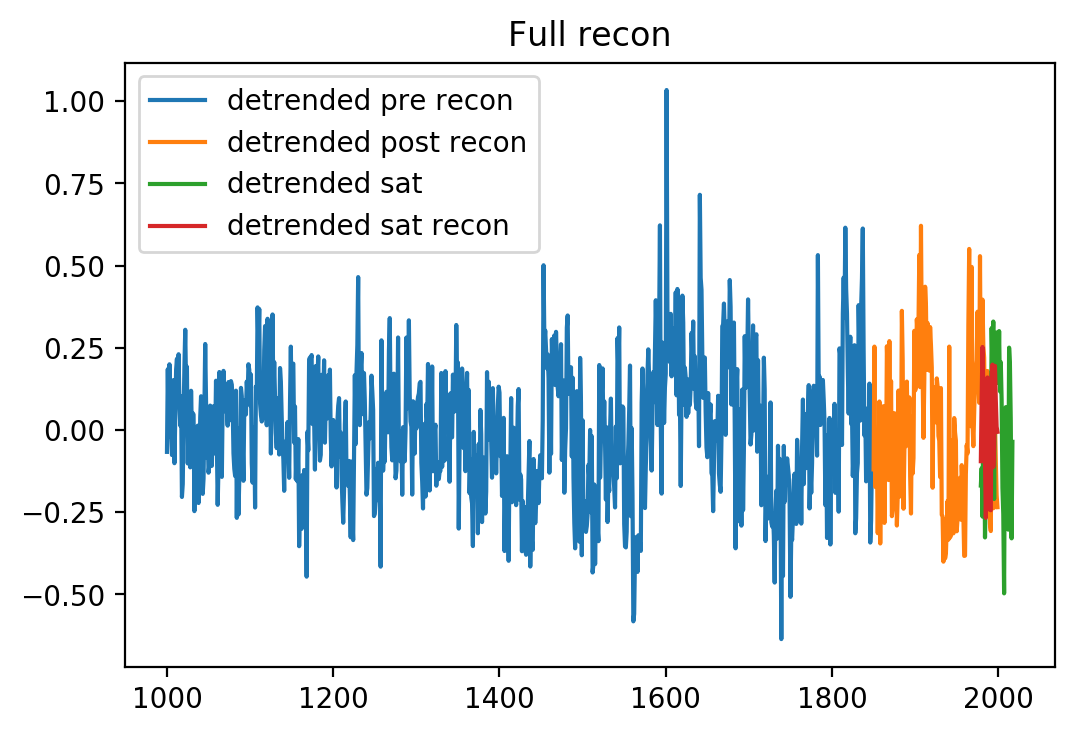

In [86]:
plt.plot(np.array(recon_years_ccsm4)[pre_ind],np.mean(pre_sie_allits_ccsm4_2d_dt,axis=1),
         label='detrended pre recon')
plt.plot(np.array(recon_years_ccsm4)[post_ind],np.mean(post_sie_allits_ccsm4_2d_dt,axis=1),
         label='detrended post recon')
plt.plot(fet_time,sat_sie_dt, label='detrended sat')
plt.plot(np.array(recon_years_ccsm4)[sat_ind],np.mean(sat_sie_allits_ccsm4_2d_dt,axis=1),
         label='detrended sat recon')
plt.legend()
plt.title('Full recon')

Text(0.5,1,'f400')

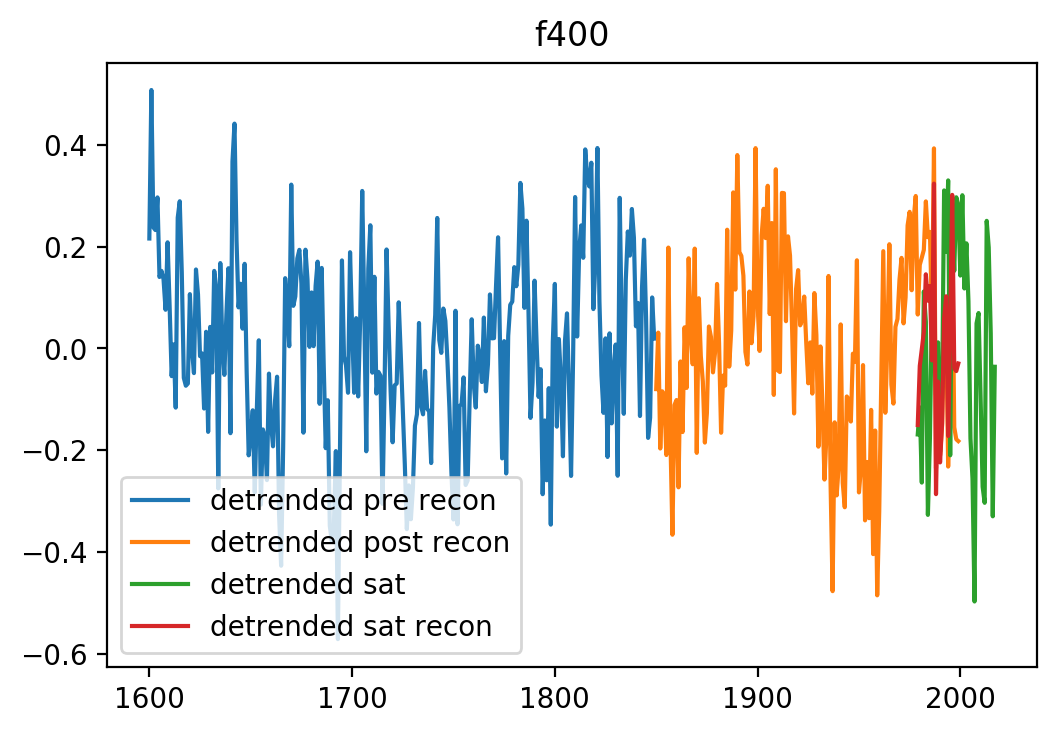

In [87]:
plt.plot(np.array(recon_years_f400)[pre_ind_f400],np.mean(pre_sie_allits_f400_2d_dt,axis=1),
         label='detrended pre recon')
plt.plot(np.array(recon_years_f400)[post_ind_f400],np.mean(post_sie_allits_f400_2d_dt,axis=1),
         label='detrended post recon')
plt.plot(fet_time,sat_sie_dt, label='detrended sat')
plt.plot(np.array(recon_years_f400)[sat_ind_f400],np.mean(sat_sie_allits_f400_2d_dt,axis=1), 
         label='detrended sat recon')
plt.legend(loc='lower left')
plt.title('f400')

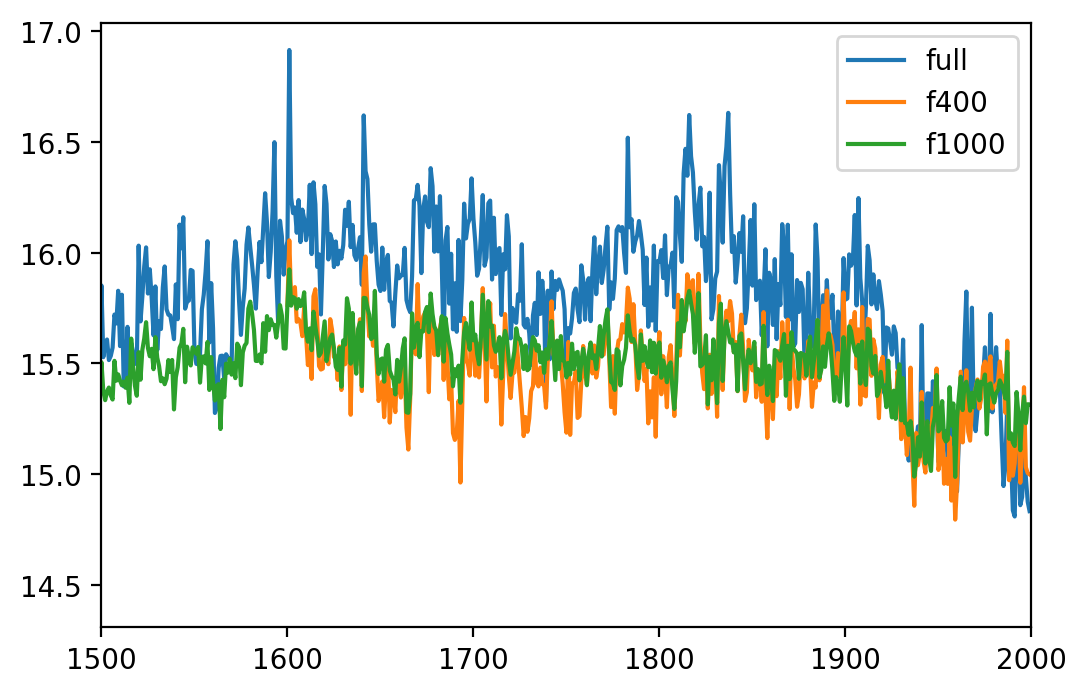

In [76]:
plt.plot(np.array(recon_years_ccsm4),np.mean(sie_ens_allit_ccsm4_2d,axis=1),label='full')
plt.plot(np.array(recon_years_f400),np.mean(sie_ens_allit_2d_f400,axis=1),label='f400')
plt.plot(np.array(recon_years_f1000),np.mean(sie_ens_allit_2d_f1000,axis=1),label='f1000')
plt.xlim(1500, 2000)
plt.legend()

### Randomly sample 20 year periods from each period to detrend: 

This may be artificially inflating the variance of earlier time periods simply because we're sampling a longer time period and detrending it. Its harder to pull out trends of a longer timeseries compared to a short one. 

In [88]:
import random as rd

In [95]:
def rand_samp_std(nsamp,timeseries):
    std = np.zeros(nsamp)
    
    for i in range(nsamp):
        iens = rd.randint(0,timeseries.shape[1]-20)
        it = rd.randint(0,timeseries.shape[0]-20)
        std[i] = np.std(signal.detrend(timeseries[it:it+20,iens],axis=0))
        
    return std

In [96]:
pre_recon_std_f400_dt_rand = rand_samp_std(2000,pre_sie_allits_f400_2d)
post_recon_std_f400_dt_rand = rand_samp_std(2000,post_sie_allits_f400_2d)

pre_recon_std_full_dt_rand = rand_samp_std(2000,pre_sie_allits_ccsm4_2d)
post_recon_std_full_dt_rand = rand_samp_std(2000,post_sie_allits_ccsm4_2d)

In [68]:
pre_sie_allits_ccsm4_2d = sie_ens_allit_ccsm4_2d[pre_ind,:]
post_sie_allits_ccsm4_2d = sie_ens_allit_ccsm4_2d[post_ind,:]
sat_sie_allits_ccsm4_2d = sie_ens_allit_ccsm4_2d[sat_ind,:]

pre_sie_allits_f400_2d = sie_ens_allit_2d_f400[pre_ind_f400,:]
post_sie_allits_f400_2d = sie_ens_allit_2d_f400[post_ind_f400,:]
sat_sie_allits_f400_2d = sie_ens_allit_2d_f400[sat_ind_f400,:]

array([[25., 25., 25., ..., 25., 25., 25.],
       [25., 25., 25., ..., 25., 25., 25.],
       [25., 25., 25., ..., 25., 25., 25.],
       ...,
       [25., 25., 25., ..., 25., 25., 25.],
       [25., 25., 25., ..., 25., 25., 25.],
       [25., 25., 25., ..., 25., 25., 25.]])

In [91]:
pre_sie_allits_f400_2d.shape

(250, 200)

In [125]:
i = 21
pre_slope_min[i], sat_slope_max[i],sat_slope_p97_5[i],sat_slope_p2_5[i]

(-0.04927564697097714,
 -0.051276229116680005,
 -0.05168621770305697,
 -0.05881094763618589)

In [72]:
pre30_slope_all_endpts_ccsm4.min(), pre_slope_min[20]

(-0.051946983019451574, -0.051946983019451574)

In [97]:
window = np.arange(10,38,1)
window[21]

31

## 20-year trends: 

In [34]:
length = 20

sat_range_start = np.arange(1979,2017-length,1)
sat_range_end = np.arange(1979+length,2017,1)

In [35]:
# Pre-industrial 
start_full_range = np.arange(1000,1850-length,1)
end_full_range = np.arange(1000+length,1850,1)

start_f800_range = np.arange(1200,1850-length,1)
end_f800_range = np.arange(1200+length,1850,1)

start_f400_range = np.arange(1600,1850-length,1)
end_f400_range = np.arange(1600+length,1850,1)

start_f200_range = np.arange(1800,1850-length,1)
end_f200_range = np.arange(1800+length,1850,1)

In [36]:
# Post-industrial 
start_post_range = np.arange(1850,1979-length,1)
end_post_range = np.arange(1850+length,1979,1)

#### Calculate all possible 20 year trends in satellite data: 

In [37]:
sat_slope_all_endpts = np.zeros(len(sat_range_start))

for t,time in enumerate(sat_range_start):
    sat_slope_all_endpts[t] = rrutils.find_trend(fet_sie_anom,fet_time,
                                                 sat_range_start[t],sat_range_end[t])
    
sat_slope_79_00 = rrutils.find_trend(fet_sie_anom,fet_time,1979,2000)

In [38]:
sat_slope_79_00

-0.035002737710247644

#### Calculate all possible 20 year trends in between 1000-2000 in reconstructions (all ensemble members + iterations): 

In [41]:
slope_all_recon = []
slope_f1000_recon = []

for it in range(sie_ens_allit_ccsm4_2d.shape[1]):
    hold = np.zeros((len(start_full_range)))
    hold_f1000 = np.zeros((len(start_full_range)))
    if np.remainder(it,100) == 0:  
        print(str(it)+' of '+str(sie_ens_allit_f400_2d.shape[1]))
    for t in range(len(start_full_range)):
        hold[t] = rrutils.find_trend(sie_ens_allit_ccsm4_2d[:,it],np.array(recon_years_ccsm4),
                                     start_full_range[t],end_full_range[t])
        hold_f1000[t] = rrutils.find_trend(sie_ens_allit_f1000_2d[:,it],np.array(recon_years_f1000),
                                           start_full_range[t],end_full_range[t])
    slope_all_recon.append(hold)
    slope_f1000_recon.append(hold_f1000)
slope_all_endpts_full_ccsm4 = np.array(slope_all_recon).flatten()   
slope_all_endpts_f1000_ccsm4 = np.array(slope_f1000_recon).flatten() 

0 of 200
100 of 200
200 of 200
300 of 200
400 of 200
500 of 200
600 of 200
700 of 200
800 of 200
900 of 200
1000 of 200
1100 of 200
1200 of 200
1300 of 200
1400 of 200
1500 of 200
1600 of 200
1700 of 200
1800 of 200
1900 of 200


In [42]:
slope_f800_recon = []

for it in range(sie_ens_allit_f800_2d.shape[1]):
    hold = np.zeros((len(start_f800_range)))
    if np.remainder(it,100) == 0:  
        print(str(it)+' of '+str(sie_ens_allit_f400_2d.shape[1]))
    for t in range(len(start_f800_range)):
        hold[t] = rrutils.find_trend(sie_ens_allit_f800_2d[:,it],np.array(recon_years_f800),
                                     start_f800_range[t],end_f800_range[t])
    slope_f800_recon.append(hold)
slope_all_endpts_f800_ccsm4 = np.array(slope_f800_recon).flatten() 

0 of 200
100 of 200
200 of 200
300 of 200
400 of 200
500 of 200
600 of 200
700 of 200
800 of 200
900 of 200
1000 of 200
1100 of 200
1200 of 200
1300 of 200
1400 of 200
1500 of 200
1600 of 200
1700 of 200
1800 of 200
1900 of 200


In [43]:
slope_f400_recon = []

for it in range(sie_ens_allit_f400_2d.shape[1]):
    hold = np.zeros((len(start_f400_range)))
    if np.remainder(it,100) == 0:  
        print(str(it)+' of '+str(sie_ens_allit_f400_2d.shape[1]))
    for t in range(len(start_f400_range)):
        hold[t] = rrutils.find_trend(sie_ens_allit_f400_2d[:,it],np.array(recon_years_f400),
                                     start_f400_range[t],end_f400_range[t])
    slope_f400_recon.append(hold)
slope_all_endpts_f400_ccsm4 = np.array(slope_f400_recon).flatten() 

0 of 200
100 of 200


In [44]:
slope_f200_recon = []

for it in range(sie_ens_allit_f200_2d.shape[1]):
    hold = np.zeros((len(start_f200_range)))
    if np.remainder(it,100) == 0:  
        print(str(it)+' of '+str(sie_ens_allit_f400_2d.shape[1]))
    for t in range(len(start_f200_range)):
        hold[t] = rrutils.find_trend(sie_ens_allit_f200_2d[:,it],np.array(recon_years_f200),
                                     start_f200_range[t],end_f200_range[t])
    slope_f200_recon.append(hold)
slope_all_endpts_f200_ccsm4 = np.array(slope_f200_recon).flatten() 

0 of 200
100 of 200
200 of 200
300 of 200
400 of 200
500 of 200
600 of 200
700 of 200
800 of 200
900 of 200
1000 of 200
1100 of 200
1200 of 200
1300 of 200
1400 of 200
1500 of 200
1600 of 200
1700 of 200
1800 of 200
1900 of 200


#### Calculate post-industrial trends (1850-2000) across all ensemble members and iterations

In [45]:
slope_post_recon = []
slope_post_f1000_recon = []
slope_post_f800_recon = []
slope_post_f400_recon = []
slope_post_f200_recon = []

for it in range(sie_ens_allit_ccsm4_2d.shape[1]):
    hold = np.zeros((len(start_post_range)))
    hold_f1000 = np.zeros((len(start_post_range)))
    hold_f800 = np.zeros((len(start_post_range)))
 #   hold_f400 = np.zeros((len(start_post_range)))
    hold_f200 = np.zeros((len(start_post_range)))
    if np.remainder(it,100) == 0:  
        print(str(it)+' of '+str(sie_ens_allit_f400_2d.shape[1]))
    for t in range(len(start_post_range)):
        hold[t] = rrutils.find_trend(sie_ens_allit_ccsm4_2d[:,it],np.array(recon_years_ccsm4),
                                     start_post_range[t],end_post_range[t])
        hold_f1000[t] = rrutils.find_trend(sie_ens_allit_f1000_2d[:,it],np.array(recon_years_f1000),
                                           start_post_range[t],end_post_range[t])
        hold_f800[t] = rrutils.find_trend(sie_ens_allit_f800_2d[:,it],np.array(recon_years_f800),
                                           start_post_range[t],end_post_range[t])
#         hold_f400[t] = rrutils.find_trend(sie_ens_allit_f400_2d[:,it],np.array(recon_years_f400),
#                                            start_post_range[t],end_post_range[t])
        hold_f200[t] = rrutils.find_trend(sie_ens_allit_f200_2d[:,it],np.array(recon_years_f200),
                                           start_post_range[t],end_post_range[t])
    slope_all_recon.append(hold)
    slope_f1000_recon.append(hold_f1000)
    slope_post_recon.append(hold)
    slope_post_f1000_recon.append(hold_f1000)
    slope_post_f800_recon.append(hold_f800)
#     slope_post_f400_recon.append(hold_f400)
    slope_post_f200_recon.append(hold_f200)
slope_all_endpts_post_ccsm4 = np.array(slope_post_recon).flatten()   
slope_all_endpts_post_f1000_ccsm4 = np.array(slope_post_f1000_recon).flatten() 
slope_all_endpts_post_f800_ccsm4 = np.array(slope_post_f800_recon).flatten() 
# slope_all_endpts_post_f400_ccsm4 = np.array(slope_post_f400_recon).flatten() 
slope_all_endpts_post_f200_ccsm4 = np.array(slope_post_f200_recon).flatten() 

0 of 200
100 of 200
200 of 200
300 of 200
400 of 200
500 of 200
600 of 200
700 of 200
800 of 200
900 of 200
1000 of 200
1100 of 200
1200 of 200
1300 of 200
1400 of 200
1500 of 200
1600 of 200
1700 of 200
1800 of 200
1900 of 200


#### Calculate satellite trend (1979-2000) in reconstructions across all ensemble members and iterations: 

In [46]:
sie_ens_allit_f400_2d.shape

(400, 200)

In [47]:
slope_sat_recon_ccsm4 = np.zeros((sie_ens_allit_ccsm4_2d.shape[1]))

for it in range(2000):
    slope_sat_recon_ccsm4[it] = rrutils.find_trend(sie_ens_allit_ccsm4_2d[:,it],
                                                   np.array(recon_years_ccsm4),1979,2000)

In [48]:
slope_sat_recon_f1000 = np.zeros((sie_ens_allit_f1000_2d.shape[1]))

for it in range(2000):
    slope_sat_recon_f1000[it] = rrutils.find_trend(sie_ens_allit_f1000_2d[:,it],
                                                   np.array(recon_years_f1000),1979,2000)

In [49]:
slope_sat_recon_f800 = np.zeros((sie_ens_allit_f800_2d.shape[1]))

for it in range(2000):
    slope_sat_recon_f800[it] = rrutils.find_trend(sie_ens_allit_f800_2d[:,it],
                                                  np.array(recon_years_f800),1979,2000)

In [50]:
slope_sat_recon_f400 = np.zeros((sie_ens_allit_f400_2d.shape[1]))

for it in range(200):
    slope_sat_recon_f400[it] = rrutils.find_trend(sie_ens_allit_f400_2d[:,it],
                                                  np.array(recon_years_f400),1979,2000)

In [51]:
slope_sat_recon_f200 = np.zeros((sie_ens_allit_f200_2d.shape[1]))

for it in range(2000):
    slope_sat_recon_f200[it] = rrutils.find_trend(sie_ens_allit_f200_2d[:,it],
                                                  np.array(recon_years_f200),1979,2000)

In [52]:
recon_slope_2_5 = np.percentile(slope_all_endpts_full_ccsm4,2.5)
recon_slope_97_5 = np.percentile(slope_all_endpts_full_ccsm4,97.5)

mean_recon_sat_slope = np.nanmean(slope_sat_recon_ccsm4)

In [56]:
def plot_hist_two_experiments(pre_industrial_trends, post_industrial_trends, 
                              sat_trends, title, start_year, percentile_low, percentile_high):
    fig, (ax_hist) = plt.subplots(1,figsize=(7,6))
    binwidth=0.002

    hist_kwargs = dict(histtype='step',linewidth=1.5)

    ax_hist.axvspan(np.percentile(pre_industrial_trends,percentile_low),
                    np.percentile(pre_industrial_trends,percentile_high),
                    color='royalblue',alpha=0.2,edgecolor=None,linewidth=0.0)
#     ax_hist.axvspan(np.percentile(post_industrial_trends,percentile_low),
#                     np.percentile(post_industrial_trends,percentile_high),
#                     color='navy',alpha=0.2,edgecolor=None)

    ax_hist.axvline(np.mean(sat_trends),linestyle='--',color='royalblue')
    ax_hist.axvline(np.nanmean(post_industrial_trends),linestyle='--',color='navy')
    ax_hist.axvline(sat_slope_79_00,linestyle='--',color='crimson', 
                    label='satellite trend 1979-2000')
    ax_hist.axvline(np.mean(sat_slope_all_endpts),linestyle='--',color='firebrick', 
                    label='mean satellite trend')

    ax_hist.hist(pre_industrial_trends,facecolor='royalblue',edgecolor='white',
                 fill=True,density=True,alpha=0.6,label='Trends ('+str(start_year)+'-1850)',
                 bins=np.arange(min(pre_industrial_trends),max(pre_industrial_trends) + binwidth, binwidth),
                 histtype='step',linewidth=1)

    ax_hist.hist(post_industrial_trends,edgecolor='navy',density=True,
                 alpha=0.9,label='Trends (1850-1979)',
                 bins=np.arange(min(post_industrial_trends),max(post_industrial_trends) + binwidth, binwidth),
                 **hist_kwargs)
    ax_hist.hist(sat_trends,edgecolor='royalblue',density=True,
                 facecolor='royalblue',alpha=0.9,label='Trends (1979-2000)',
                 bins=np.arange(min(sat_trends),max(sat_trends) + binwidth, binwidth),
                 **hist_kwargs)

    plt.yticks(fontsize=14)

    #ax_hist.set_xticks(np.arange(-0.10,0.01,0.01))
    ax_hist.set_ylabel('Probablility Density',fontsize=14)
    ax_hist.tick_params(axis='both', which='major', labelsize=14)
    ax_hist.set_xlim(-0.08,0.08)

    plt.legend()
    plt.ylim(0,90)

    plt.subplots_adjust(wspace=0, hspace=0.015)
    ax_hist.set_title(title, fontsize=16)

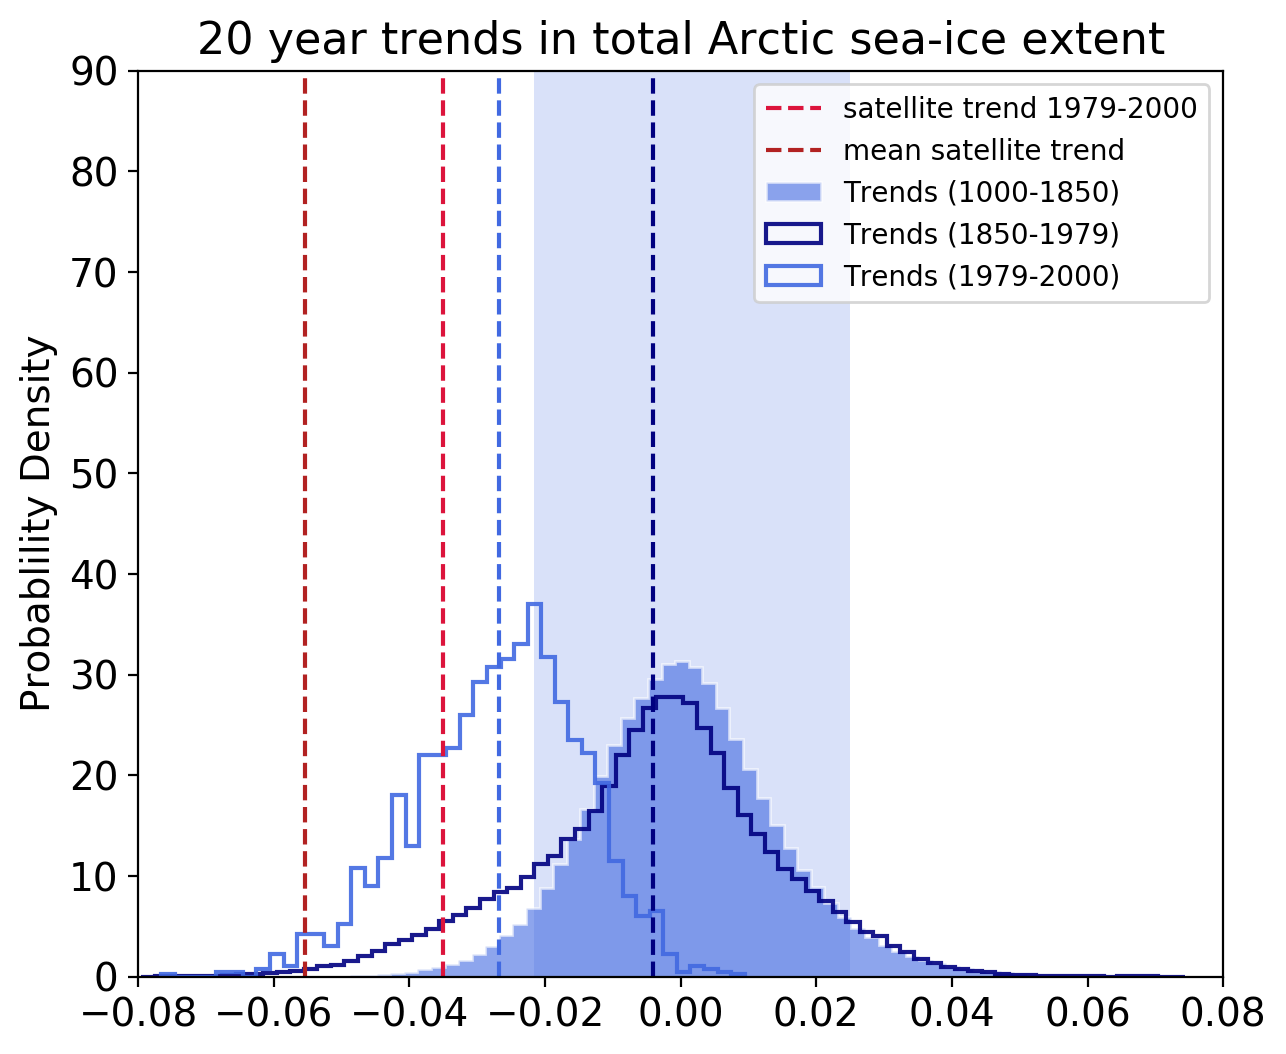

In [57]:
title = '20 year trends in total Arctic sea-ice extent'

plot_hist_two_experiments(slope_all_endpts_full_ccsm4, 
                          slope_all_endpts_post_ccsm4, 
                          slope_sat_recon_ccsm4, title, 
                          1000, 5, 95)

In [190]:
labels = [labels[2], labels[3], labels[4], labels[0], labels[1]]

['Satellite trend \n (1979-2000)',
 'Minimum trend \nin satellite record \n (1992-2012)',
 'Reconstructed \ntrends (1000-1850)',
 'Reconstructed \ntrends (1850-1979)',
 'Reconstructed \ntrends(1979-2000)']

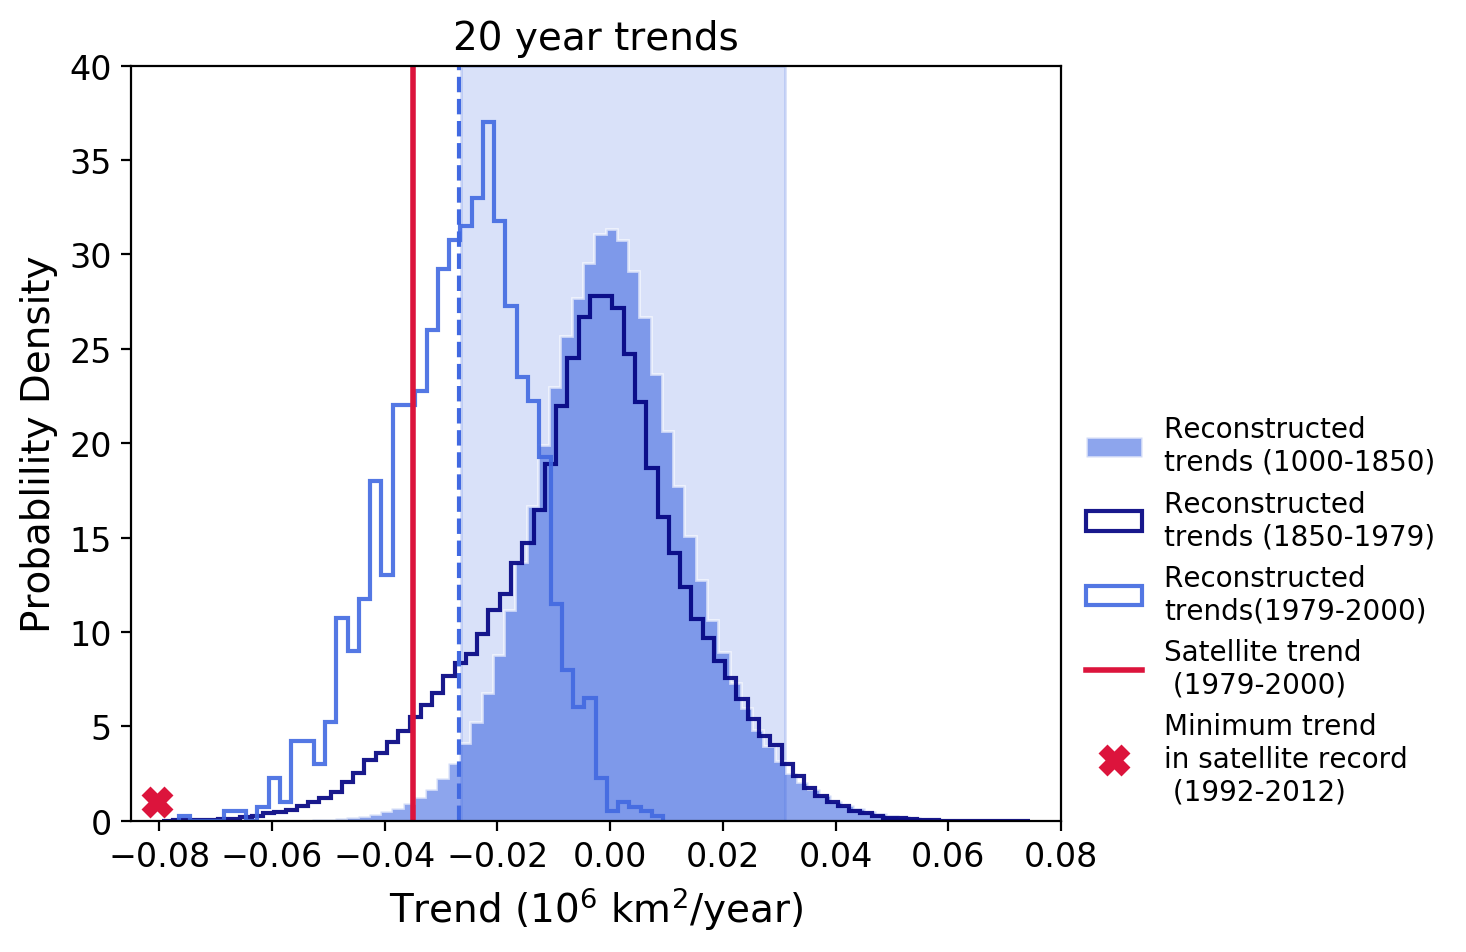

In [210]:
pre_industrial_trends = slope_all_endpts_full_ccsm4
post_industrial_trends = slope_all_endpts_post_ccsm4
sat_trends = slope_sat_recon_ccsm4
title = '20 year trends'
start_year = 1000
percentile_low = 2.5
percentile_high = 97.5

fig, (ax_hist) = plt.subplots(1,figsize=(6,5))
binwidth=0.002

hist_kwargs = dict(histtype='step',linewidth=1.5)

ax_hist.axvspan(np.percentile(pre_industrial_trends,percentile_low),
                np.percentile(pre_industrial_trends,percentile_high),
                color='royalblue',alpha=0.2,edgecolor=None)

# ax_hist.axvline(np.nanmean(post_industrial_trends),linestyle='--',color='navy')

ax_hist.hist(pre_industrial_trends,facecolor='royalblue',edgecolor='white',
             fill=True,density=True,alpha=0.6,label='Reconstructed \ntrends ('+str(start_year)+'-1850)',
             bins=np.arange(min(pre_industrial_trends),max(pre_industrial_trends) + binwidth, binwidth),
             histtype='step',linewidth=1)

ax_hist.hist(post_industrial_trends,edgecolor='navy',density=True,
             alpha=0.9,label='Reconstructed \ntrends (1850-1979)',
             bins=np.arange(min(post_industrial_trends),max(post_industrial_trends) + binwidth, binwidth),
             **hist_kwargs)
ax_hist.hist(sat_trends,edgecolor='c',density=True,
             facecolor='c',alpha=0.9,label='Reconstructed \ntrends(1979-2000)',
             bins=np.arange(min(sat_trends),max(sat_trends) + binwidth, binwidth),
             **hist_kwargs)
# ax_hist.hist(sat_slope_all_endpts,edgecolor='firebrick',density=True,
#              facecolor='firebrick',alpha=0.9,label='Trends (1979-2017)',
#              bins=np.arange(min(sat_slope_all_endpts),
#                             max(sat_slope_all_endpts) + binwidth, binwidth),
#              **hist_kwargs)

ax_hist.axvline(np.mean(sat_trends),linestyle='--',color='c')
ax_hist.axvline(sat_slope_79_00,color='crimson',linewidth=2, 
                label='Satellite trend \n (1979-2000)')
ax_hist.plot(sat_slope_all_endpts.min(),1,marker='X', color='crimson',
             markersize=10,linestyle='None', 
             label='Minimum trend \nin satellite record \n (1992-2012)')
# ax_hist.axvline(np.mean(sat_slope_all_endpts),color='firebrick', 
#                 linewidth=1.5,label='Satellite trend mean (1979-2017)')

plt.yticks(fontsize=14)

#ax_hist.set_xticks(np.arange(-0.10,0.01,0.01))
ax_hist.set_ylabel('Probablility Density',fontsize=14)
ax_hist.set_xlabel('Trend (10$^6$ km$^2$/year)', fontsize=14)
ax_hist.tick_params(axis='both', which='major', labelsize=12)
ax_hist.set_xlim(-0.085,0.08)

handles,labels = ax_hist.get_legend_handles_labels()
labels = [labels[2], labels[3], labels[4], labels[0], labels[1]]
handles = [handles[2], handles[3], handles[4], handles[0], handles[1]]

plt.legend(handles,labels, bbox_to_anchor=(1.0, 0.57), frameon=False)
plt.ylim(0,40)

plt.subplots_adjust(wspace=0, hspace=0.015)
ax_hist.set_title(title, fontsize=14)

savedir = ('/home/disk/p/mkb22/Documents/si_analysis_kb/common_era_experiments/'+
           'analysis/figures/Brennan_Hakim_2020/')
savename = '20_year_trends_ccsm4.png'
#plt.savefig(savedir+savename, bbox_inches='tight')

In [136]:
title = '20 year trends in total Arctic sea-ice extent \n 25 fixed proxies'

plot_hist_two_experiments(slope_all_endpts_f1000_ccsm4, 
                          slope_all_endpts_post_f1000_ccsm4, 
                          slope_sat_recon_f1000, title, 
                          1000, 5.0, 95.0)

NameError: name 'plot_hist_two_experiments' is not defined

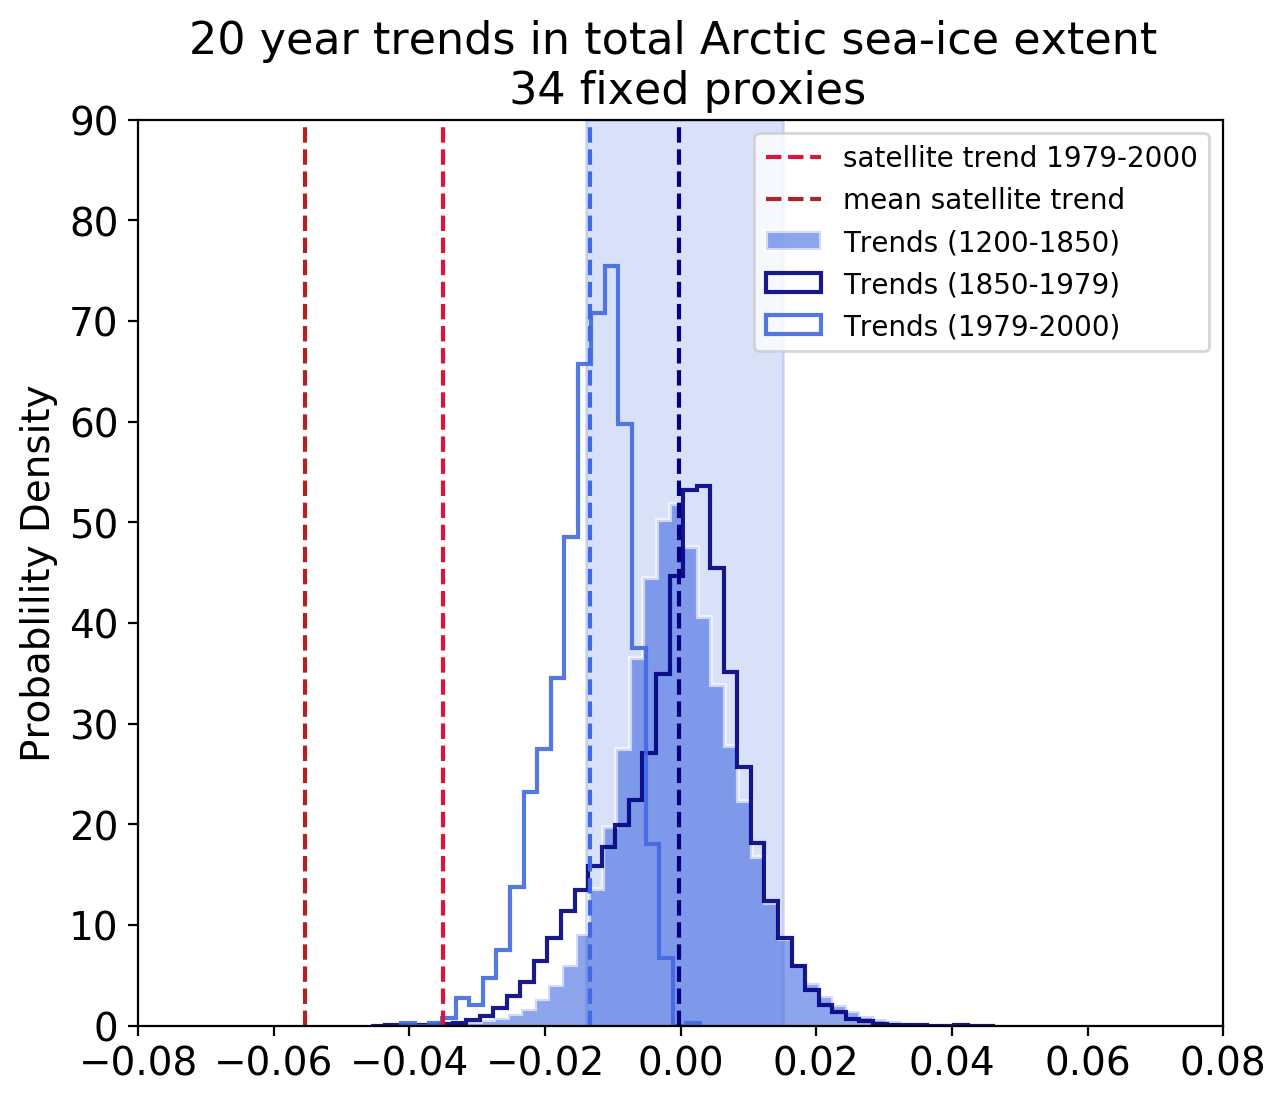

In [71]:
title = '20 year trends in total Arctic sea-ice extent \n 34 fixed proxies'

plot_hist_two_experiments(slope_all_endpts_f800_ccsm4, 
                          slope_all_endpts_post_f800_ccsm4, 
                          slope_sat_recon_f800, title, 
                          1200, 5.0, 95.0)

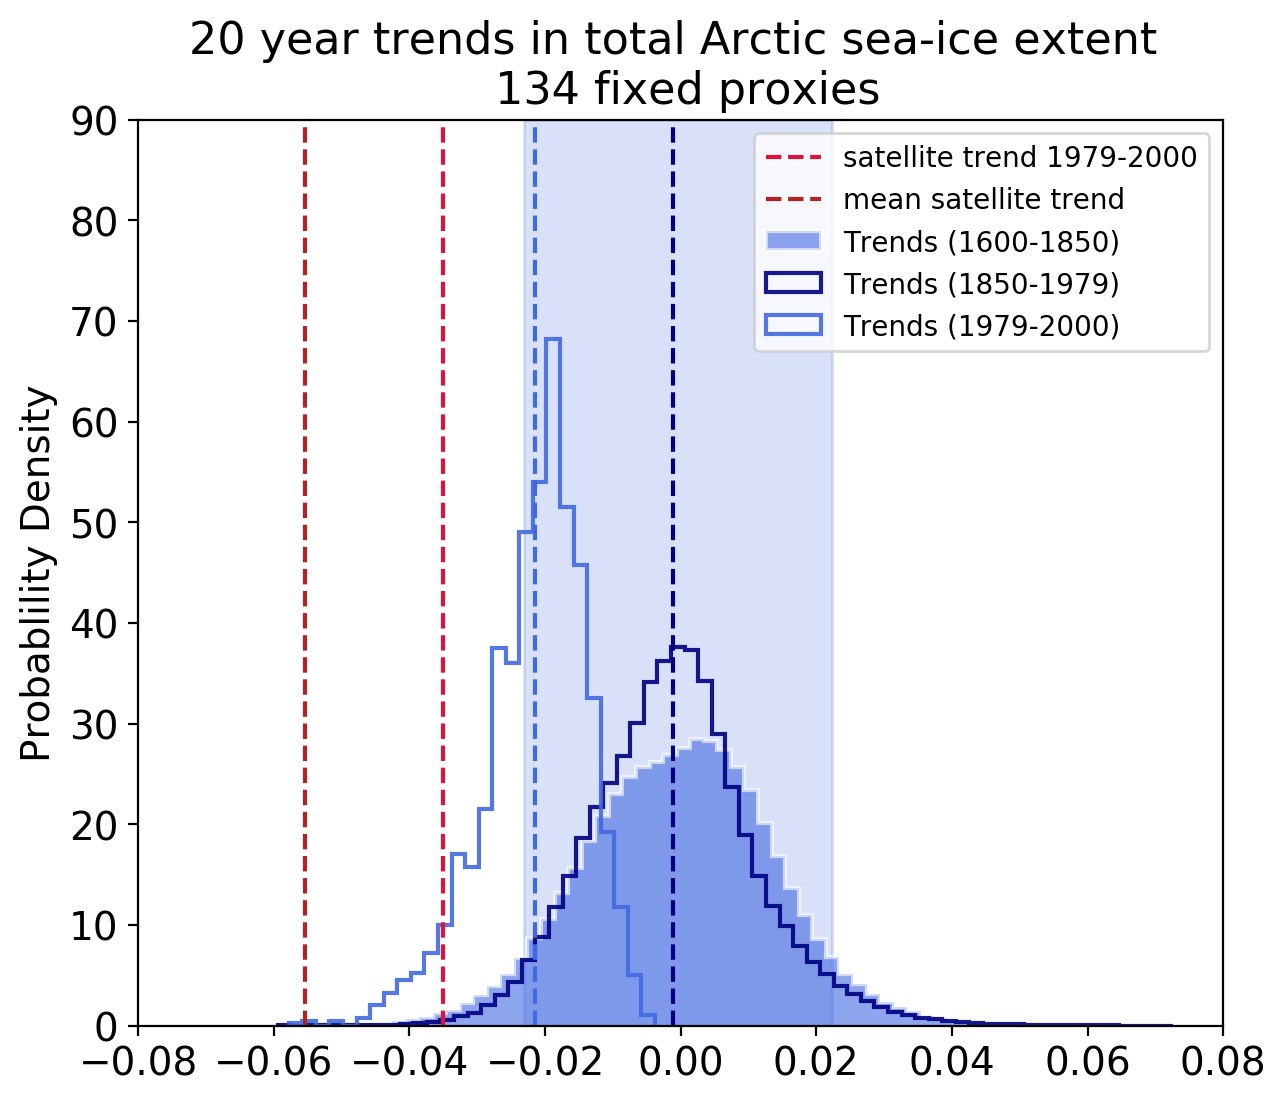

In [72]:
title = '20 year trends in total Arctic sea-ice extent \n 134 fixed proxies'

plot_hist_two_experiments(slope_all_endpts_f400_ccsm4, 
                          slope_all_endpts_post_f400_ccsm4, 
                          slope_sat_recon_f400, title, 
                          1600,5.0, 95.0)

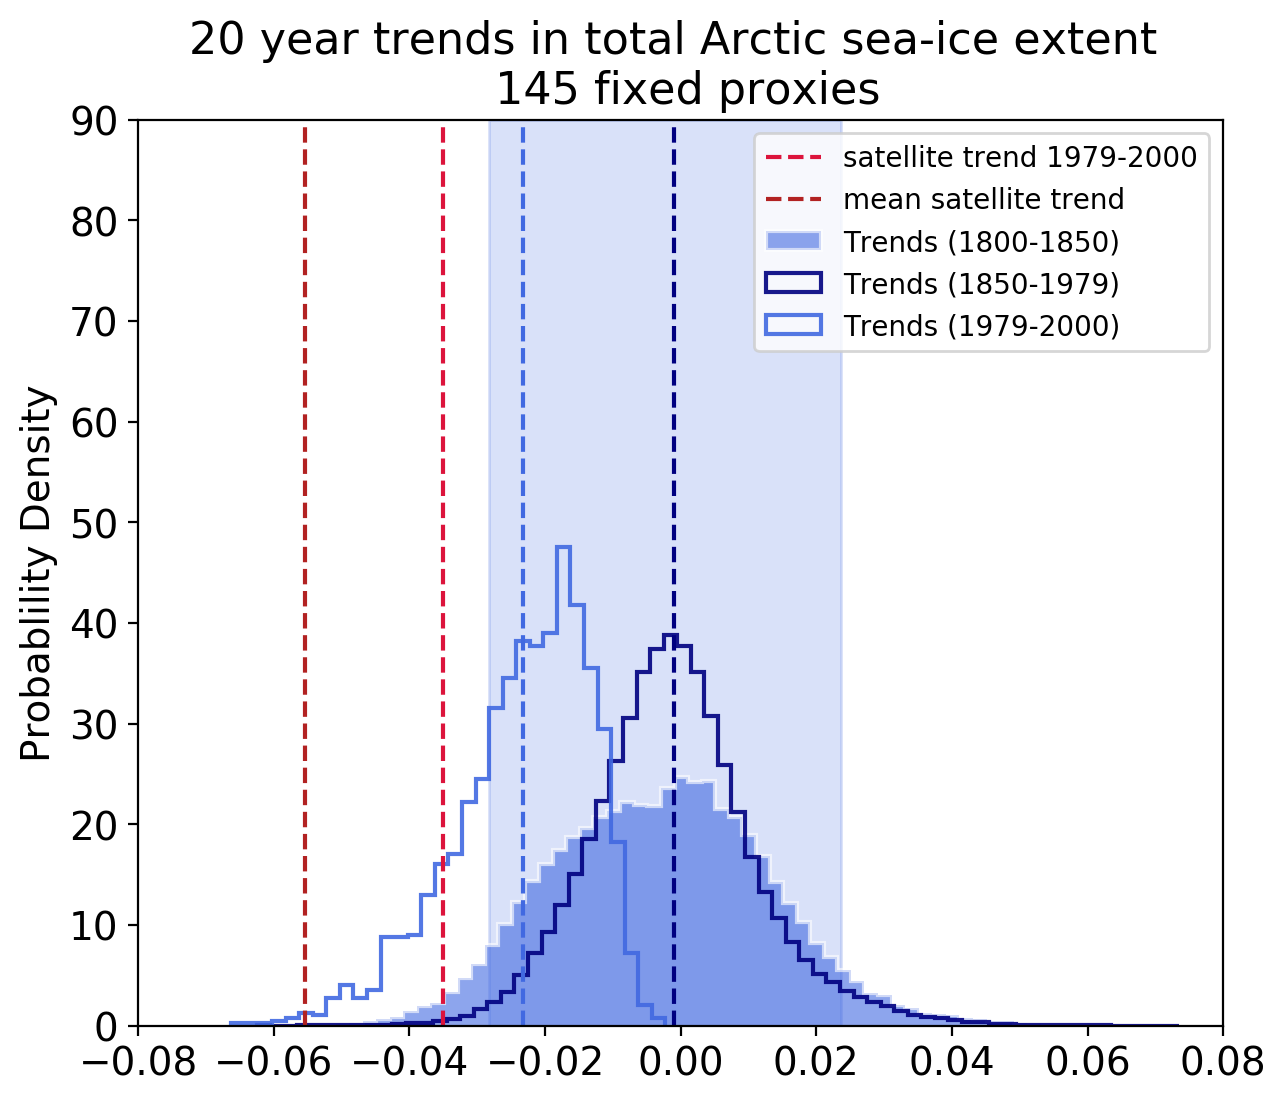

In [74]:
title = '20 year trends in total Arctic sea-ice extent \n 145 fixed proxies'

plot_hist_two_experiments(slope_all_endpts_f200_ccsm4, 
                          slope_all_endpts_post_f200_ccsm4, 
                          slope_sat_recon_f200, title, 
                          1800, 5, 95)

In [ ]:
plot_hist_two_experiments(slope_all_endpts_full_ccsm4, 
                          slope_all_endpts_post_ccsm4, 
                          slope_sat_recon_ccsm4, title, 
                          1000, 5, 95)

In [71]:
sat_slope_all_endpts.min()

-0.0804058441558441

In [72]:
import scipy.stats as stats

[mean, binedge, binnum] = stats.binned_statistic(slope_all_endpts_full_ccsm4, 
                                                 np.arange(slope_all_endpts_full_ccsm4.shape[0]), 
                                                 bins=100, range=(-0.081,0.08))
[mean_post, binedge_post,
 binnum_post] = stats.binned_statistic(slope_all_endpts_post_ccsm4, 
                                       np.arange(slope_all_endpts_post_ccsm4.shape[0]), 
                                       bins=100, range=(-0.081,0.08))
[mean_sat, binedge_sat,
 binnum_sat] = stats.binned_statistic(slope_sat_recon_ccsm4, 
                                       np.arange(slope_sat_recon_ccsm4.shape[0]), 
                                       bins=100, range=(-0.081,0.08))

[Sat_mean, Sat_binedge,
 Sat_binnum] = stats.binned_statistic(sat_slope_all_endpts, 
                                      np.arange(sat_slope_all_endpts.shape[0]), 
                                      bins=100, range=(-0.081,0.08))

/home/disk/chaos/mkb22/anaconda2/envs/lmr_py3_xarray_test/lib/python3.6/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


In [73]:
bin_count = np.zeros((binedge.shape[0],4))
bin_int = np.arange(binnum.min(),binnum.max()+1,1)

for bin in bin_int:
    bin_count[bin-1,0] = list(binnum).count(bin)/slope_all_endpts_full_ccsm4.shape[0]
    bin_count[bin-1,1] = list(binnum_post).count(bin)/slope_all_endpts_post_ccsm4.shape[0]
    bin_count[bin-1,2] = list(binnum_sat).count(bin)/slope_sat_recon_ccsm4.shape[0]
    bin_count[bin-1,3] = list(Sat_binnum).count(bin)/sat_slope_all_endpts.shape[0]

In [137]:
bin_count[:,0]*slope_all_endpts_full_ccsm4.shape[0]

array([1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       6.0000e+00, 4.0000e+00, 3.0000e+00, 1.0000e+01, 1.0000e+01,
       1.9000e+01, 2.5000e+01, 3.3000e+01, 5.6000e+01, 5.7000e+01,
       9.9000e+01, 1.0300e+02, 1.3200e+02, 2.2200e+02, 2.8400e+02,
       3.6800e+02, 4.6700e+02, 6.2800e+02, 8.2100e+02, 1.0010e+03,
       1.3280e+03, 1.6610e+03, 2.1820e+03, 2.8020e+03, 3.5500e+03,
       4.4990e+03, 5.5650e+03, 7.1730e+03, 9.2040e+03, 1.1353e+04,
       1.3992e+04, 1.7058e+04, 2.1166e+04, 2.5820e+04, 3.1320e+04,
       3.6686e+04, 4.3054e+04, 4.9926e+04, 5.6770e+04, 6.3443e+04,
       6.8649e+04, 7.3259e+04, 7.7723e+04, 8.0620e+04, 8.3631e+04,
       8.3724e+04, 8.2601e+04, 7.9773e+04, 7.4991e+04, 6.9123e+04,
       6.2586e+04, 5.5994e+04, 4.9849e+04, 4.3664e+04, 3.8200e+04,
       3.3564e+04, 2.8911e+04, 2.4985e+04, 2.1435e+04, 1.8331e+04,
       1.5456e+04, 1.3041e+04, 1.1133e+04, 9.4410e+03, 7.7290e+03,
       6.5320e+03, 5.4760e+03, 4.6380e+03, 4.0110e+03, 3.3210e

Text(0.5,1,'20 year trends')

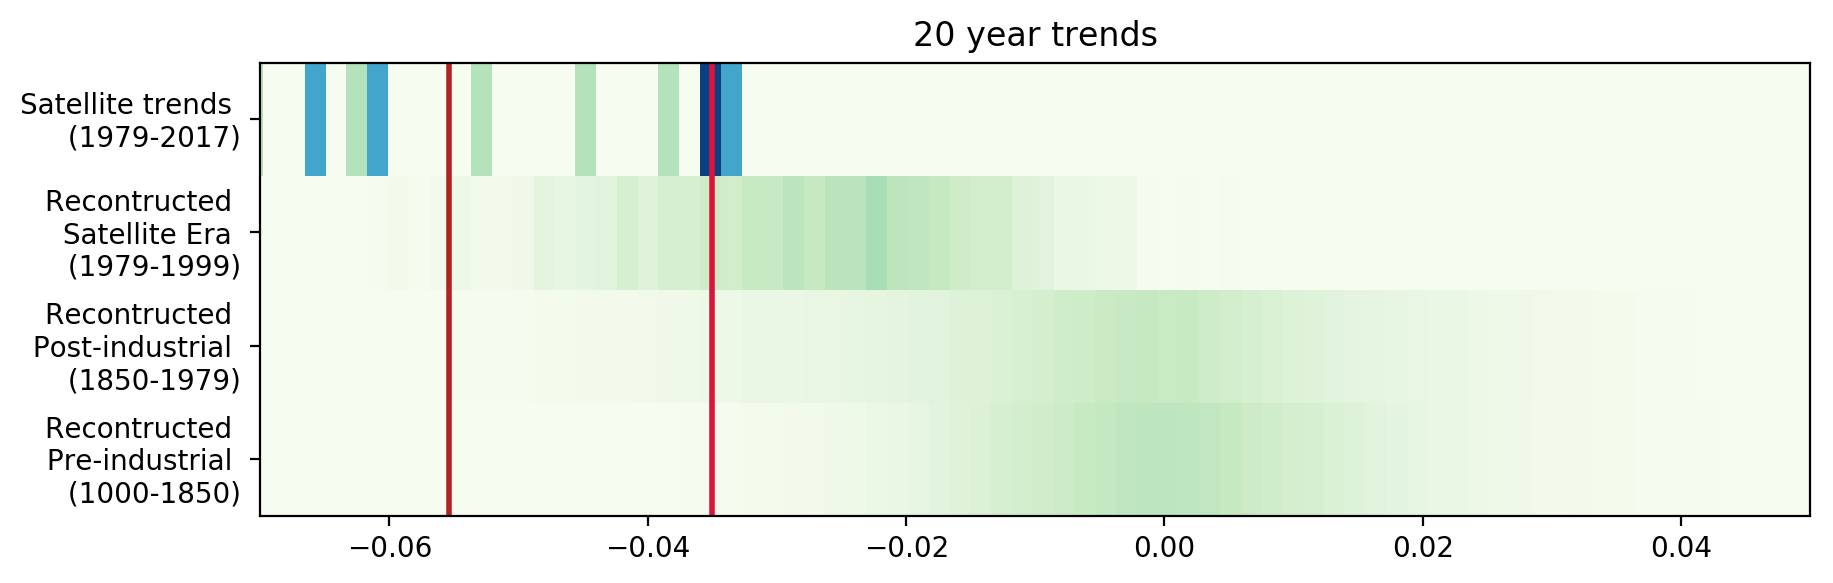

In [77]:
plt.figure(figsize=(10,3))
plt.pcolormesh(binedge,np.arange(0,5,1),bin_count.T, cmap='GnBu')
plt.xlim(-0.07,0.05)
plt.yticks([0.5,1.5,2.5,3.5],['Recontructed \n Pre-industrial \n (1000-1850)',
                          'Recontructed \n Post-industrial \n (1850-1979)',
                          'Recontructed \n Satellite Era \n (1979-1999)', 
                          'Satellite trends \n (1979-2017)'])
plt.axvline(sat_slope_79_00,color='crimson', linewidth=2,
                    label='satellite trend 1979-2000')
plt.axvline(np.mean(sat_slope_all_endpts),linewidth=2,color='firebrick', 
                label='mean satellite trend')

plt.title('20 year trends')

Text(0.5,1,'20 year trends')

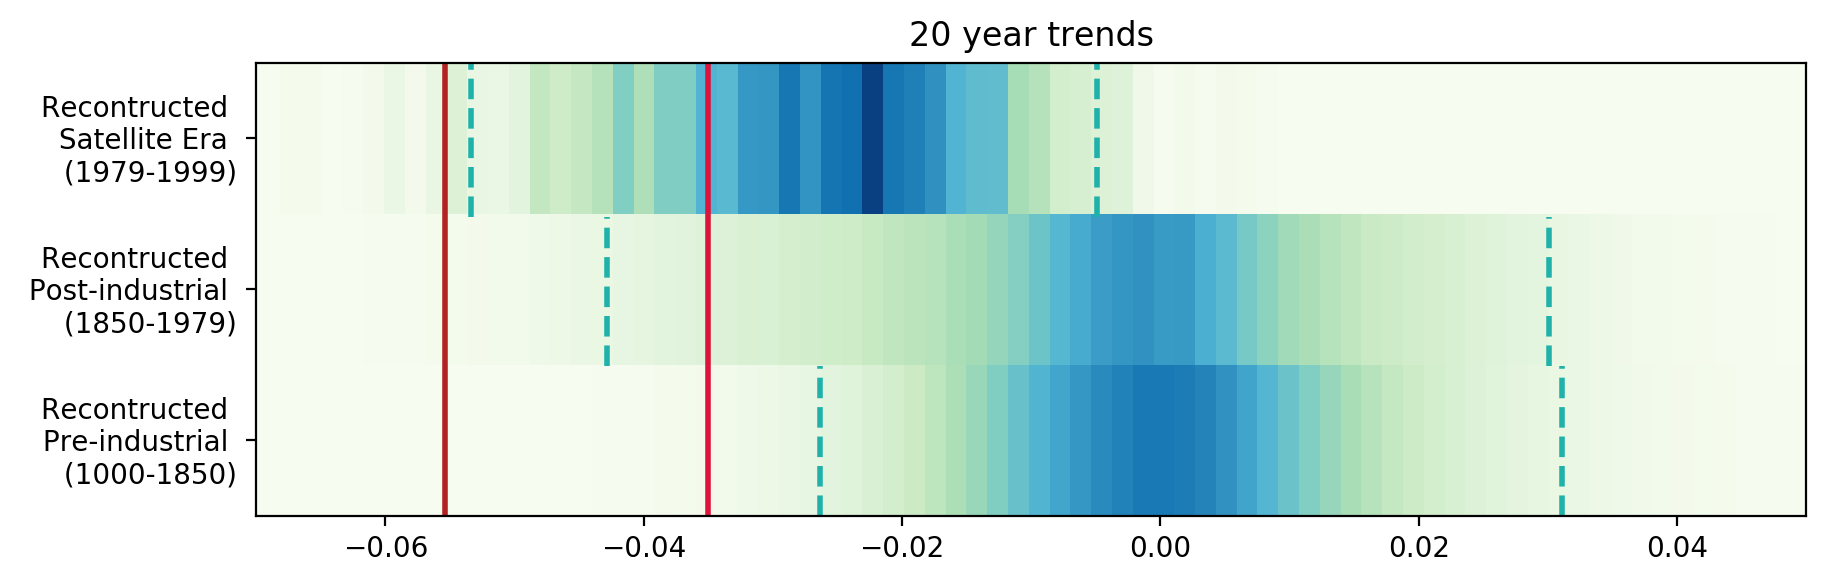

In [96]:
plt.figure(figsize=(10,3))
plt.pcolormesh(binedge,np.arange(0,4,1),bin_count.T, cmap='GnBu')
plt.xlim(-0.07,0.05)
plt.yticks([0.5,1.5,2.5],['Recontructed \n Pre-industrial \n (1000-1850)',
                          'Recontructed \n Post-industrial \n (1850-1979)',
                          'Recontructed \n Satellite Era \n (1979-1999)', 
                          'Satellite trends \n (1979-2017)'])
plt.axvline(sat_slope_79_00,color='crimson', linewidth=2,
                    label='satellite trend 1979-2000')
plt.axvline(np.mean(sat_slope_all_endpts),linewidth=2,color='firebrick', 
                label='mean satellite trend')

plt.axvline(np.percentile(slope_all_endpts_full_ccsm4,97.5),ymin=0,ymax=0.33,linewidth=2,color='lightseagreen', 
                linestyle = '--')
plt.axvline(np.percentile(slope_all_endpts_full_ccsm4,2.5),ymin=0,ymax=0.33,linewidth=2,color='lightseagreen', 
            linestyle = '--')

plt.axvline(np.percentile(slope_all_endpts_post_ccsm4,97.5),ymin=0.33,ymax=0.66,linewidth=2,color='lightseagreen', 
            linestyle = '--')
plt.axvline(np.percentile(slope_all_endpts_post_ccsm4,2.5),ymin=0.33,ymax=0.66,linewidth=2,color='lightseagreen', 
            linestyle = '--')

plt.axvline(np.percentile(slope_sat_recon_ccsm4,97.5),ymin=0.66,ymax=1,linewidth=2,color='lightseagreen', 
            linestyle = '--')
plt.axvline(np.percentile(slope_sat_recon_ccsm4,2.5),ymin=0.66,ymax=1,linewidth=2,color='lightseagreen', 
            linestyle = '--')

plt.title('20 year trends')

Text(0.5,1,'20 year trends')

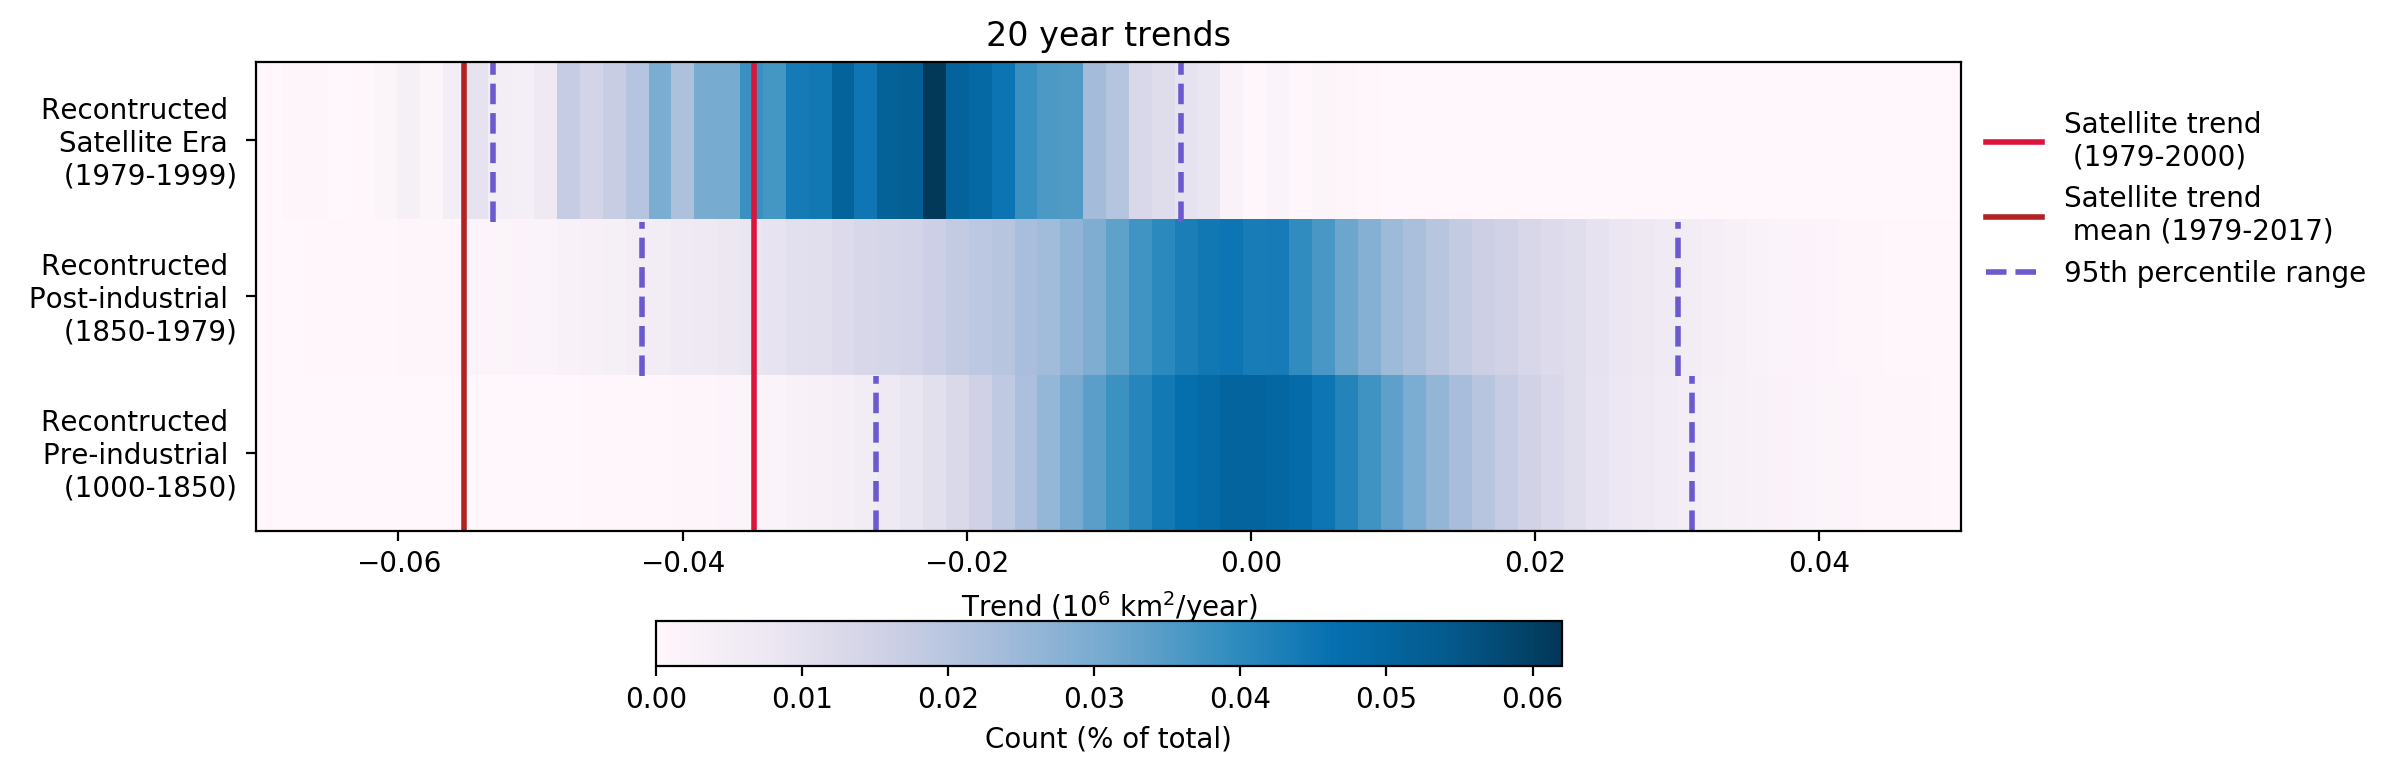

In [138]:
plt.figure(figsize=(11,4))
plt.pcolormesh(binedge,np.arange(0,4,1),bin_count.T, cmap='PuBu')
plt.xlim(-0.07,0.05)
plt.yticks([0.5,1.5,2.5],['Recontructed \n Pre-industrial \n (1000-1850)',
                          'Recontructed \n Post-industrial \n (1850-1979)',
                          'Recontructed \n Satellite Era \n (1979-1999)', 
                          'Satellite trends \n (1979-2017)'])
plt.axvline(sat_slope_79_00,color='crimson', linewidth=2,
                    label='Satellite trend \n (1979-2000)')
plt.axvline(np.mean(sat_slope_all_endpts),linewidth=2,color='firebrick', 
                label='Satellite trend \n mean (1979-2017)')

plt.axvline(np.percentile(slope_all_endpts_full_ccsm4,97.5),ymin=0,ymax=0.33,linewidth=2,
            color='slateblue', linestyle = '--', label='95th percentile range')
plt.axvline(np.percentile(slope_all_endpts_full_ccsm4,2.5),ymin=0,ymax=0.33,\
            linewidth=2,color='slateblue', linestyle = '--')

plt.axvline(np.percentile(slope_all_endpts_post_ccsm4,97.5),ymin=0.33,ymax=0.66,
            linewidth=2,color='slateblue', linestyle = '--')
plt.axvline(np.percentile(slope_all_endpts_post_ccsm4,2.5),ymin=0.33,ymax=0.66,
            linewidth=2,color='slateblue', linestyle = '--')

plt.axvline(np.percentile(slope_sat_recon_ccsm4,97.5),ymin=0.66,ymax=1,
            linewidth=2,color='slateblue', linestyle = '--')
plt.axvline(np.percentile(slope_sat_recon_ccsm4,2.5),ymin=0.66,ymax=1,
            linewidth=2,color='slateblue', linestyle = '--')

plt.xlabel('Trend (10$^6$ km$^2$/year)')

plt.colorbar(label='Count (% of total)',orientation='horizontal', 
            fraction=0.075)
plt.legend(bbox_to_anchor=(1.0, 0.95), frameon=False)

plt.title('20 year trends')

In [128]:
bin_count.min(), bin_count.max()

(0.0, 0.16666666666666666)

## Trend analysis x-length: 

In [94]:
length = 35

sat_range_start = np.arange(1979,2017-length,1)
sat_range_end = np.arange(1979+length,2017,1)

start_full_range = np.arange(1000,1979-length,1)
end_full_range = np.arange(1000+length,1979,1)

start_f800_range = np.arange(1200,1979-length,1)
end_f800_range = np.arange(1200+length,1979,1)

start_f400_range = np.arange(1600,1979-length,1)
end_f400_range = np.arange(1600+length,1979,1)

start_f200_range = np.arange(1800,1979-length,1)
end_f200_range = np.arange(1800+length,1979,1)

#### Possible x-length trends in satellite data: 

In [95]:
sat_slope_all_endpts = np.zeros(len(sat_range_start))

for t,time in enumerate(sat_range_start):
    sat_slope_all_endpts[t] = rrutils.find_trend(fet_sie_anom,fet_time,
                                                 sat_range_start[t],sat_range_end[t])
    
sat_slope_79_00 = rrutils.find_trend(fet_sie_anom,fet_time,1979,2000)

#### Possible x-length trends in reconstructions: 

In [230]:
slope_all_recon = []
slope_f1000_recon = []

for it in range(sie_ens_allit_ccsm4_2d.shape[1]):
    hold = np.zeros((len(start_full_range)))
    hold_f1000 = np.zeros((len(start_full_range)))
    if np.remainder(it,100) == 0:  
        print(str(it)+' of '+str(sie_ens_allit_f400_2d.shape[1]))
    for t in range(len(start_full_range)):
        hold[t] = rrutils.find_trend(sie_ens_allit_ccsm4_2d[:,it],np.array(recon_years),
                                     start_full_range[t],end_full_range[t])
        hold_f1000[t] = rrutils.find_trend(sie_ens_allit_f1000_2d[:,it],np.array(recon_years_f1000),
                                           start_full_range[t],end_full_range[t])
    slope_all_recon.append(hold)
    slope_f1000_recon.append(hold_f1000)
slope_all_endpts_full_ccsm4 = np.array(slope_all_recon).flatten()   
slope_all_endpts_f1000_ccsm4 = np.array(slope_f1000_recon).flatten() 

0 of 2000
100 of 2000
200 of 2000
300 of 2000
400 of 2000
500 of 2000
600 of 2000
700 of 2000
800 of 2000
900 of 2000
1000 of 2000
1100 of 2000
1200 of 2000
1300 of 2000
1400 of 2000
1500 of 2000
1600 of 2000
1700 of 2000
1800 of 2000
1900 of 2000


In [231]:
slope_f800_recon = []

for it in range(sie_ens_allit_f800_2d.shape[1]):
    hold = np.zeros((len(start_f800_range)))
    if np.remainder(it,100) == 0:  
        print(str(it)+' of '+str(sie_ens_allit_f400_2d.shape[1]))
    for t in range(len(start_f800_range)):
        hold[t] = rrutils.find_trend(sie_ens_allit_f800_2d[:,it],np.array(recon_years_f800),
                                     start_f800_range[t],end_f800_range[t])
    slope_f800_recon.append(hold)
slope_all_endpts_f800_ccsm4 = np.array(slope_f800_recon).flatten() 

0 of 2000
100 of 2000
200 of 2000
300 of 2000
400 of 2000
500 of 2000
600 of 2000
700 of 2000
800 of 2000
900 of 2000
1000 of 2000
1100 of 2000
1200 of 2000
1300 of 2000
1400 of 2000
1500 of 2000
1600 of 2000
1700 of 2000
1800 of 2000
1900 of 2000


In [232]:
slope_f400_recon = []

for it in range(sie_ens_allit_f400_2d.shape[1]):
    hold = np.zeros((len(start_f400_range)))
    if np.remainder(it,100) == 0:  
        print(str(it)+' of '+str(sie_ens_allit_f400_2d.shape[1]))
    for t in range(len(start_f400_range)):
        hold[t] = rrutils.find_trend(sie_ens_allit_f400_2d[:,it],np.array(recon_years_f400),
                                     start_f400_range[t],end_f400_range[t])
    slope_f400_recon.append(hold)
slope_all_endpts_f400_ccsm4 = np.array(slope_f400_recon).flatten() 

0 of 2000
100 of 2000
200 of 2000
300 of 2000
400 of 2000
500 of 2000
600 of 2000
700 of 2000
800 of 2000
900 of 2000
1000 of 2000
1100 of 2000
1200 of 2000
1300 of 2000
1400 of 2000
1500 of 2000
1600 of 2000
1700 of 2000
1800 of 2000
1900 of 2000


In [233]:
slope_f200_recon = []

for it in range(sie_ens_allit_f200_2d.shape[1]):
    hold = np.zeros((len(start_f200_range)))
    if np.remainder(it,100) == 0:  
        print(str(it)+' of '+str(sie_ens_allit_f400_2d.shape[1]))
    for t in range(len(start_f200_range)):
        hold[t] = rrutils.find_trend(sie_ens_allit_f200_2d[:,it],np.array(recon_years_f200),
                                     start_f200_range[t],end_f200_range[t])
    slope_f200_recon.append(hold)
slope_all_endpts_f200_ccsm4 = np.array(slope_f200_recon).flatten() 

0 of 2000
100 of 2000
200 of 2000
300 of 2000
400 of 2000
500 of 2000
600 of 2000
700 of 2000
800 of 2000
900 of 2000
1000 of 2000
1100 of 2000
1200 of 2000
1300 of 2000
1400 of 2000
1500 of 2000
1600 of 2000
1700 of 2000
1800 of 2000
1900 of 2000


/home/disk/chaos/mkb22/anaconda2/envs/lmr_py3_xarray_test/lib/python3.6/site-packages/matplotlib/patches.py:83: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"
/home/disk/chaos/mkb22/anaconda2/envs/lmr_py3_xarray_test/lib/python3.6/site-packages/matplotlib/patches.py:83: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"
/home/disk/chaos/mkb22/anaconda2/envs/lmr_py3_xarray_test/lib/python3.6/site-packages/matplotlib/patches.py:83: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"
/home/disk/chaos/mkb22/anaconda2/envs/lmr_py3_xarray_test/lib/python3.6/site-packages/matplotlib/patches.py:83: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor pr

Text(0.5,1,'20 year trends in total Arctic sea-ice extent')

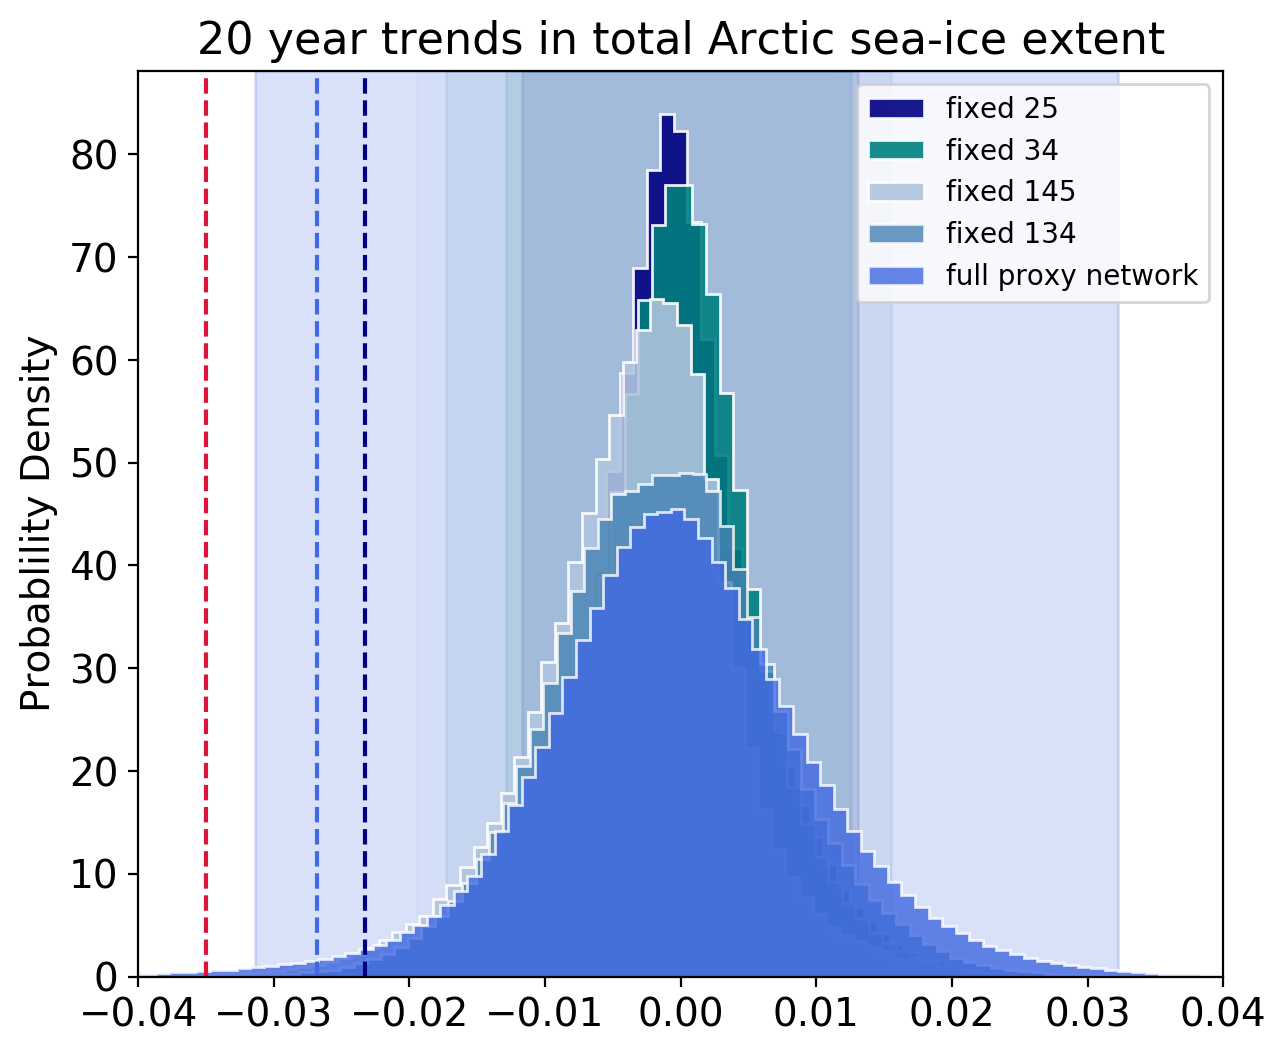

In [252]:
fig, (ax_hist) = plt.subplots(1,figsize=(7,6))
binwidth=0.001

hist_kwargs = dict(histtype='step',linewidth=1)

ax_hist.axvspan(recon_slope_2_5,recon_slope_97_5,color='royalblue',alpha=0.2,edgecolor='white')
ax_hist.axvspan(np.percentile(slope_all_endpts_f1000_ccsm4,2.5),
                np.percentile(slope_all_endpts_f1000_ccsm4,97.5),
                color='navy',alpha=0.1,edgecolor='navy')
ax_hist.axvspan(np.percentile(slope_all_endpts_f800_ccsm4,2.5),
                np.percentile(slope_all_endpts_f800_ccsm4,97.5),
                color='teal',alpha=0.1,edgecolor='teal')
ax_hist.axvspan(np.percentile(slope_all_endpts_f200_ccsm4,2.5),
                np.percentile(slope_all_endpts_f200_ccsm4,97.5),
                color='lightsteelblue',alpha=0.1,edgecolor='lightsteelblue')
ax_hist.axvspan(np.percentile(slope_all_endpts_f400_ccsm4,2.5),
                np.percentile(slope_all_endpts_f400_ccsm4,97.5),
                color='steelblue',alpha=0.1,edgecolor='steelblue')

ax_hist.axvline(mean_recon_sat_slope,linestyle='--',color='royalblue')
ax_hist.axvline(np.nanmean(slope_sat_recon_f200),linestyle='--',color='navy')
ax_hist.axvline(sat_slope_79_00,linestyle='--',color='crimson')

ax_hist.hist(slope_all_endpts_f1000_ccsm4,facecolor='navy',edgecolor='white',
             fill=True,density=True, label='fixed 25',alpha=0.9,
             bins=np.arange(min(slope_all_endpts_f1000_ccsm4),max(slope_all_endpts_f1000_ccsm4) + binwidth, binwidth),
             **hist_kwargs)
ax_hist.hist(slope_all_endpts_f800_ccsm4,facecolor='teal',edgecolor='white',
             fill=True,density=True,label='fixed 34',alpha=0.9,
             bins=np.arange(min(slope_all_endpts_f800_ccsm4),max(slope_all_endpts_f800_ccsm4) + binwidth, binwidth),
             **hist_kwargs)
ax_hist.hist(slope_all_endpts_f200_ccsm4,facecolor='lightsteelblue',edgecolor='white',
             fill=True,density=True,label='fixed 145',alpha=0.9,
             bins=np.arange(min(slope_all_endpts_f200_ccsm4),max(slope_all_endpts_f200_ccsm4) + binwidth, binwidth),
             **hist_kwargs)
ax_hist.hist(slope_all_endpts_f400_ccsm4,facecolor='steelblue',edgecolor='white',
             fill=True,density=True,label='fixed 134',alpha=0.8,
             bins=np.arange(min(slope_all_endpts_f400_ccsm4),max(slope_all_endpts_f400_ccsm4) + binwidth, binwidth),
             **hist_kwargs)
ax_hist.hist(slope_all_endpts_full_ccsm4,facecolor='royalblue',edgecolor='white',
             fill=True,density=True,label='full proxy network',alpha=0.8,
             bins=np.arange(min(slope_all_endpts_full_ccsm4),max(slope_all_endpts_full_ccsm4) + binwidth, binwidth),
             **hist_kwargs)
# ax_hist.hist(slope_all_endpts_f400_ccsm4,facecolor='royalblue',edgecolor='white',
#              fill=True,density=True,alpha=0.4,
#              bins=np.arange(min(slope_all_endpts_f400_ccsm4),max(slope_all_endpts_f400_ccsm4) + binwidth, binwidth),
#              **hist_kwargs)
# ax_hist.hist(slope_all_endpts_f800_ccsm4,facecolor='navy',edgecolor='white',
#              fill=True,density=True,alpha=0.6,
#              bins=np.arange(min(slope_all_endpts_f800_ccsm4),max(slope_all_endpts_f800_ccsm4) + binwidth, binwidth),
#              **hist_kwargs)
# ax_hist.hist(slope_all_endpts_f1000_ccsm4,facecolor='royalblue',edgecolor='white',
#              fill=True,density=True,alpha=0.8,
#              bins=np.arange(min(slope_all_endpts_f1000_ccsm4),max(slope_all_endpts_f1000_ccsm4) + binwidth, binwidth),
#              **hist_kwargs)
# ax_hist.hist(slope_all_endpts_full_ccsm4,facecolor='royalblue',edgecolor='white',
#              fill=True,density=True,alpha=0.9,
#              bins=np.arange(min(slope_all_endpts_full_ccsm4),max(slope_all_endpts_full_ccsm4) + binwidth, binwidth),
#              **hist_kwargs)


# ax_hist.hist(slope_sat_recon_ccsm4,edgecolor='royalblue',density=True,
#              facecolor='royalblue',alpha=0.9,
#              bins=np.arange(min(slope_sat_recon_ccsm4),max(slope_sat_recon_ccsm4) + binwidth, binwidth),
#              **hist_kwargs)

# ax_hist.hist(slope_all_enpts_ccsm4_sat,color='sienna',density=True,
#              bins=np.arange(min(slope_all_enpts_ccsm4_sat),max(slope_all_enpts_ccsm4_sat) + binwidth, binwidth),
#              **hist_kwargs)
# ax_hist.hist(slope_all_enpts_mpi_sat,color='royalblue',density=True,
#              bins=np.arange(min(slope_all_enpts_mpi_sat),max(slope_all_enpts_mpi_sat) + binwidth, binwidth),
#              **hist_kwargs)
plt.yticks(fontsize=14)

#ax_hist.set_xticks(np.arange(-0.10,0.01,0.01))
ax_hist.set_ylabel('Probablility Density',fontsize=14)
ax_hist.tick_params(axis='both', which='major', labelsize=14)
ax_hist.set_xlim(-0.04,0.04)

plt.legend()

plt.subplots_adjust(wspace=0, hspace=0.015)
ax_hist.set_title('20 year trends in total Arctic sea-ice extent', fontsize=16)

## What is CE?

In [415]:
from numpy import random

a = random.randint(10,size=100)
a = a-np.mean(a)
b = 2*a
c = 2*a+3
time = np.arange(0,100,1)

[ce,corr,
 var_b,var_a] = rrutils.find_ce_corr(a, b, time,time, 50,100)

[ce_ac,corr_ac,
 var_c,var_a] = rrutils.find_ce_corr(a, c, time,time, 50,100)

[ce_acrev,corr_acrev,
 var_c,var_a] = rrutils.find_ce_corr(c,a, time,time, 50,100)

[ce_rev,corr_rev,
 var_a_rev,var_b_rev] = rrutils.find_ce_corr(b,a, time,time, 50,100)

print('CE (b = ref) = '+str(ce))
print('CE reverse   = '+str(ce_rev))
print('CE_c (c = ref) = '+str(ce_ac))
print('CE_c (a = ref) = '+str(ce_acrev))
print('Corr         = '+str(corr))
print('Corr reverse = '+str(corr_rev))
print('Corr (c)     = '+str(corr_rev))
print('Var(a) = '+str(var_a))
print('Var(b) = '+str(var_b))
print('Var(c) = '+str(var_c))

CE (b = ref) = 0.7482464311366492
CE reverse   = -0.0070142754534028295
CE_c (c = ref) = 0.45364686209373317
CE_c (a = ref) = -1.1854125516250673
Corr         = 0.9999999999999999
Corr reverse = 0.9999999999999999
Corr (c)     = 0.9999999999999999
Var(a) = 35.641600000000004
Var(b) = 35.641600000000004
Var(c) = 8.910400000000001


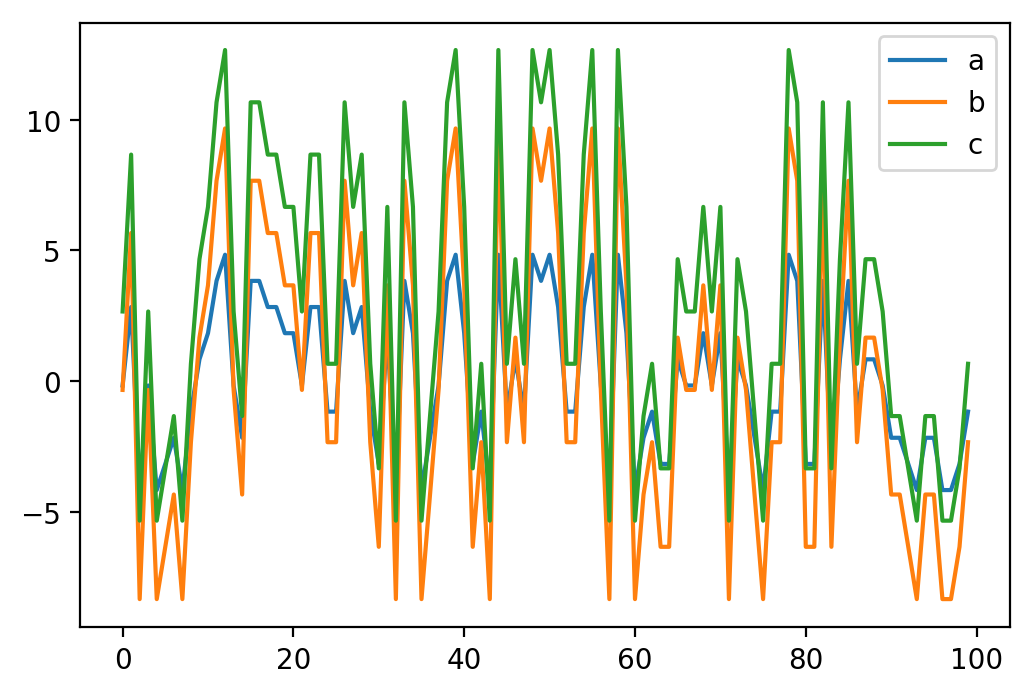

In [414]:
plt.plot(time,a, label='a')
plt.plot(time,b, label='b')
plt.plot(time,c, label='c')
plt.legend()

In [417]:
trend_start_yr = 0
trend_end_yr = 20

a_trend_1 = rrutils.find_trend(a,time,trend_start_yr,trend_end_yr)
b_trend_1 = rrutils.find_trend(b,time,trend_start_yr,trend_end_yr)
c_trend_1 = rrutils.find_trend(c,time,trend_start_yr,trend_end_yr)

a_trend_2 = rrutils.find_trend(a,time,80,100)
b_trend_2 = rrutils.find_trend(b,time,80,100)
c_trend_2 = rrutils.find_trend(c,time,80,100)

print('trend(a1) = '+str(a_trend_1))
print('trend(b1) = '+str(b_trend_1))
print('trend(c1) = '+str(c_trend_1))

print('trend(a2) = '+str(a_trend_2))
print('trend(b2) = '+str(b_trend_2))
print('trend(c2) = '+str(c_trend_2))

trend(a1) = 0.07272727272727275
trend(b1) = 0.1454545454545455
trend(c1) = 0.14545454545454545
trend(a2) = -0.0037593984962406004
trend(b2) = -0.007518796992481201
trend(c2) = -0.007518796992481198


In [419]:
b_trend_1/b_trend_2,a_trend_1/a_trend_2

(-19.345454545454558, -19.345454545454558)